In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('loan2017.csv')

C:\Users\Arun\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (113) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data['loan_status']=data['loan_status'].replace({'Current':2,'Fully Paid': 0, 'Charged Off':1, 'Late (31-120 days)':0,'In Grace Period':0, 'Late (16-30 days)':0, 'Default':1}).astype(int)

In [ ]:
null=pd.DataFrame({'col':data.columns,'value':(data.isnull().sum()/len(data) * 100)[:][0:]})
null.reset_index(drop=True,inplace=True)

In [5]:
columns_null=[]
columns=[]
for i,j in null.values:
    if j>20:
        columns_null.append(i)
    else:
        columns.append(i)

In [17]:
data_need=data[['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'purpose',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'application_type',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_inq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'pub_rec_bankruptcies',
 'tax_liens',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'total_bc_limit',
 'total_il_high_credit_limit',
 'hardship_flag',
 'disbursement_method',
 'debt_settlement_flag',
 'sec_app_earliest_cr_line',
 'sec_app_inq_last_6mths',
 'sec_app_mort_acc',
 'sec_app_open_acc',
 'sec_app_revol_util',
 'sec_app_open_act_il',
 'sec_app_num_rev_accts',
 'sec_app_chargeoff_within_12_mths',
 'sec_app_collections_12_mths_ex_med',
 'sec_app_mths_since_last_major_derog',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_revol_delinq',
 'revol_bal_joint']]

# Missing Value treatment 

In [8]:
nulll=data_need.isnull().sum()

In [9]:
nulll[nulll>0]

emp_length                              31871
dti                                       514
revol_util                                444
last_pymnt_d                              600
last_credit_pull_d                          7
mths_since_rcnt_il                      13126
il_util                                 61794
all_util                                   67
avg_cur_bal                                18
bc_open_to_buy                           5744
bc_util                                  5948
mo_sin_old_il_acct                      13126
mths_since_recent_bc                     5433
mths_since_recent_inq                   51953
num_tl_120dpd_2m                        22254
percent_bc_gt_75                         5759
sec_app_earliest_cr_line               404543
sec_app_inq_last_6mths                 404543
sec_app_mort_acc                       404543
sec_app_open_acc                       404543
sec_app_revol_util                     405183
sec_app_open_act_il               

In [10]:
data_need[['revol_util','revol_bal','total_rev_hi_lim','bc_util','total_bc_limit','max_bal_bc','il_util','total_bal_il','total_il_high_credit_limit']]

revol_util  revol_bal  total_rev_hi_lim  bc_util  total_bc_limit  \
0             25.8       8595           33300.0     58.1          8000.0   
1             39.4      17823           45200.0     67.3         24300.0   
2             50.5      30607           60600.0     38.7         42500.0   
3             65.5      13483           20600.0     66.7         20200.0   
4             46.2      25787           55800.0     48.3         52500.0   
...            ...        ...               ...      ...             ...   
443574        39.2       9592           24500.0     70.9          6200.0   
443575        20.2       3497           17300.0     19.6         11400.0   
443576        70.9       7094           10000.0     93.2          2000.0   
443577        34.9      12927           37000.0     14.6         22000.0   
443578        50.8      25760           50700.0     49.7         19500.0   

        max_bal_bc  il_util  total_bal_il  total_il_high_credit_limit  
0           4566.0     77.0       35668.0                     46451.0  
1          10023.0     78.0       43814.0                     56205.0  
2          10625.0      NaN           0.0                         0.0  
3           6765.0     84.0       19268.0                     23043.0  
4           8549.0      NaN           0.0                         0.0  
...            ...      ...           ...                         ...  
443574      4052.0     36.0       35620.0                     49448.0  
443575      2238.0     78.0        9431.0                     12125.0  
443576      1864.0    100.0       29354.0                     29317.0  
443577      2406.0     64.0       52311.0                     81975.0  
443578      6158.0      NaN           0.0                         0.0  

[443579 rows x 9 columns]

In [11]:
10023/24300

0.41246913580246913

In [12]:
data_need[data_need['revol_util'].isnull()][['revol_util','revol_bal','total_rev_hi_lim']]

revol_util  revol_bal  total_rev_hi_lim
2739           NaN          0               0.0
3193           NaN          0               0.0
6809           NaN          0               0.0
9847           NaN          0               0.0
10404          NaN          0               0.0
...            ...        ...               ...
442644         NaN          0               0.0
442781         NaN          0               0.0
442933         NaN          0               0.0
443301         NaN          0               0.0
443425         NaN          0               0.0

[444 rows x 3 columns]

In [8]:
data_need['revol_util']=data_need['revol_util'].fillna((round((data_need['revol_bal']/data_need['total_rev_hi_lim'])*100)))
data_need['revol_util'].fillna(0,inplace=True)
data_need['il_util']=data_need['il_util'].fillna((round((data_need['total_bal_il']/data_need['total_il_high_credit_limit'])*100)))
data_need['il_util'].fillna(0,inplace=True)
data_need['last_credit_pull_d']=data_need['last_credit_pull_d'].fillna(data_need['issue_d'])
all_util1=[]
for i in range(0,len(data_need)):
    if np.isnan(data_need['all_util'][i]):
        if data_need['tot_cur_bal'][i]==data_need['total_bal_ex_mort'][i]:
            all_util1.append(round(((data_need['tot_cur_bal'][i])/(data_need['total_il_high_credit_limit'][i]))*100))
        else:
            all_util1.append(round((((data_need['tot_cur_bal'][i])-(data_need['total_bal_ex_mort'][i]))/(data_need['total_il_high_credit_limit'][i]))*100))
    else:
        all_util1.append(data_need['all_util'][i])
data_need['all_util']=pd.Series(all_util1)
data_need['all_util']=data_need['all_util'].replace({np.nan:0,np.inf:0,-np.inf:0})
data_need['all_util'].fillna(0,inplace=True)
data_need['avg_cur_bal']=data_need['avg_cur_bal'].fillna(data_need['avg_cur_bal'].mean())
data_need['bc_open_to_buy'].fillna(0,inplace=True)

C:\Users\Arun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Arun\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\Arun\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://p

In [14]:
data_need[data_need['il_util'].isnull()][['il_util','total_bal_il','total_il_high_credit_limit']]

il_util  total_bal_il  total_il_high_credit_limit
2           NaN           0.0                         0.0
4           NaN           0.0                         0.0
31          NaN           0.0                         0.0
63          NaN       19824.0                     45561.0
66          NaN           0.0                         0.0
...         ...           ...                         ...
443524      NaN           0.0                         0.0
443542      NaN       35126.0                     40210.0
443560      NaN       69776.0                     96215.0
443571      NaN           0.0                         0.0
443578      NaN           0.0                         0.0

[61794 rows x 3 columns]

In [16]:
data_need[data_need['last_credit_pull_d'].isnull()][['issue_d','term','total_pymnt','loan_status']]

issue_d        term   total_pymnt  loan_status
23806   Mar-2017   36 months   8868.840674            0
154274  Aug-2017   36 months   1801.490000            2
327024  Dec-2017   36 months   4543.295244            0
370990  Nov-2017   36 months   1989.940000            2
373887  Nov-2017   36 months   8794.790000            2
392761  Nov-2017   36 months  16677.960000            2
403952  Nov-2017   36 months   3290.480000            0

In [19]:
data_need[data_need.avg_cur_bal.isna()][['avg_cur_bal','acc_open_past_24mths']]

avg_cur_bal  acc_open_past_24mths
116200          NaN                   0.0
142304          NaN                   0.0
183568          NaN                   0.0
191718          NaN                   0.0
204029          NaN                   0.0
234280          NaN                   3.0
243298          NaN                   1.0
326339          NaN                   3.0
334195          NaN                   0.0
354068          NaN                   0.0
356837          NaN                   0.0
361865          NaN                   1.0
367128          NaN                   0.0
375984          NaN                   0.0
388263          NaN                   2.0
396899          NaN                   1.0
411096          NaN                   0.0
434692          NaN                   0.0

In [21]:
data_need[data_need['bc_open_to_buy'].isna()][['bc_open_to_buy','total_bc_limit','num_bc_sats','num_bc_tl','bc_util']]

bc_open_to_buy  total_bc_limit  num_bc_sats  num_bc_tl  bc_util
136                NaN             0.0          0.0        0.0      NaN
190                NaN             0.0          0.0        1.0      NaN
274                NaN             0.0          0.0        2.0      NaN
304                NaN             0.0          0.0        1.0      NaN
513                NaN             0.0          0.0        5.0      NaN
...                ...             ...          ...        ...      ...
443301             NaN             0.0          0.0        1.0      NaN
443333             NaN             0.0          0.0        1.0      NaN
443425             NaN             0.0          0.0        1.0      NaN
443459             NaN             0.0          0.0        0.0      NaN
443510             NaN             0.0          0.0        1.0      NaN

[5744 rows x 5 columns]

In [22]:
data_need[data_need['total_bc_limit']==0][['bc_open_to_buy','num_bc_sats']]

bc_open_to_buy  num_bc_sats
136                NaN          0.0
190                NaN          0.0
274                NaN          0.0
304                NaN          0.0
513                NaN          0.0
...                ...          ...
443301             NaN          0.0
443333             NaN          0.0
443425             NaN          0.0
443459             NaN          0.0
443510             NaN          0.0

[5759 rows x 2 columns]

In [23]:
data_need[( data_need['bc_open_to_buy']).isna()]['total_bc_limit'].value_counts()

0.0    5744
Name: total_bc_limit, dtype: int64

In [25]:
data_need[data_need['mths_since_recent_bc'].isna()]['num_bc_sats'].value_counts()

0.0    5432
1.0       1
Name: num_bc_sats, dtype: int64

In [26]:
data_need[data_need['mths_since_recent_inq'].isna()]['inq_last_12m'].value_counts()

0.0    51953
Name: inq_last_12m, dtype: int64

In [27]:
data_need[data_need.num_tl_120dpd_2m.isna()]['acc_now_delinq'].value_counts()

0.0    22104
1.0      145
2.0        5
Name: acc_now_delinq, dtype: int64

In [28]:
data_need[data_need.percent_bc_gt_75.isna()]['bc_util'].value_counts()

0.0    15
Name: bc_util, dtype: int64

In [9]:
data_need[['sec_app_earliest_cr_line',
 'sec_app_inq_last_6mths',
 'sec_app_mort_acc',
 'sec_app_open_acc',
 'sec_app_revol_util',
 'sec_app_open_act_il',
 'sec_app_num_rev_accts',
 'sec_app_chargeoff_within_12_mths',
 'sec_app_collections_12_mths_ex_med',
 'sec_app_mths_since_last_major_derog',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_revol_delinq',
 'revol_bal_joint','emp_length','dti','mths_since_rcnt_il','bc_util','mo_sin_old_il_acct',
 'mths_since_recent_bc','mths_since_recent_inq','num_tl_120dpd_2m',
 'percent_bc_gt_75']]=data_need[['sec_app_earliest_cr_line',
 'sec_app_inq_last_6mths',
 'sec_app_mort_acc',
 'sec_app_open_acc',
 'sec_app_revol_util',
 'sec_app_open_act_il',
 'sec_app_num_rev_accts',
 'sec_app_chargeoff_within_12_mths',
 'sec_app_collections_12_mths_ex_med',
 'sec_app_mths_since_last_major_derog',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_revol_delinq',
 'revol_bal_joint','emp_length','dti','mths_since_rcnt_il','bc_util','mo_sin_old_il_acct',
 'mths_since_recent_bc','mths_since_recent_inq','num_tl_120dpd_2m','percent_bc_gt_75']].fillna(0)

C:\Users\Arun\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [30]:
data_need.isnull().sum()

loan_amnt                         0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
                                 ..
dti_joint                         0
verification_status_joint         0
mths_since_recent_bc_dlq          0
mths_since_recent_revol_delinq    0
revol_bal_joint                   0
Length: 112, dtype: int64

In [31]:
col_num=[]
col_dis=[]
col_cat=[]
for i in data_need.columns:
    if ((data_need[i].dtype == object) & (data_need[i].nunique()<200)):
        col_cat.append(i)
    if data_need[i].nunique()>200:
        col_num.append(i)
    elif ((data_need[i].nunique()<200) & ((data_need[i].dtype == int) |(data_need[i].dtype == float))) :
        col_dis.append(i)

In [32]:
print('Num',col_num)
print()
print('Dis',col_dis)
print()
print('Cat',col_cat)

Num ['loan_amnt', 'funded_amnt_inv', 'installment', 'annual_inc', 'dti', 'earliest_cr_line', 'revol_bal', 'revol_util', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'last_pymnt_amnt', 'tot_coll_amt', 'tot_cur_bal', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'max_bal_bc', 'total_rev_hi_lim', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mths_since_recent_bc', 'pct_tl_nvr_dlq', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'sec_app_earliest_cr_line', 'sec_app_revol_util', 'annual_inc_joint', 'dti_joint', 'revol_bal_joint']

Dis ['int_rate', 'loan_status', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc', 'collections_12_mths_ex_med', 'acc_now_delinq', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'open_rv_12m', 'open_rv_24m', 'all_util', 'inq_fi', '

In [33]:
for i in data_need.columns:
    print()
    print('nunique',data_need[i].nunique())
    print()
    print(data_need[i].value_counts())


nunique 1559

10000    37872
20000    24556
12000    24291
15000    23323
5000     18161
         ...  
38350        1
37975        1
35925        1
36275        1
37775        1
Name: loan_amnt, Length: 1559, dtype: int64

nunique 1563

10000.0    36806
12000.0    23622
20000.0    23507
15000.0    22462
5000.0     17874
           ...  
39300.0        1
37775.0        1
38350.0        1
37050.0        1
36925.0        1
Name: funded_amnt_inv, Length: 1563, dtype: int64

nunique 2

 36 months    320419
 60 months    123160
Name: term, dtype: int64

nunique 67

16.02    20510
11.99    19745
12.62    19662
10.42    19235
9.44     18918
         ...  
29.49      506
29.99      431
30.49      338
30.74      293
6.00       140
Name: int_rate, Length: 67, dtype: int64

nunique 34530

320.05    1598
324.65    1593
326.97    1592
332.10    1546
335.12    1485
          ... 
731.19       1
780.52       1
192.87       1
658.37       1
512.00       1
Name: installment, Length: 34530, dtype: int6

324.65      1189
326.97      1145
320.05      1139
332.10      1130
335.12      1100
            ... 
10309.46       1
14.89          1
8055.05        1
18073.27       1
38263.95       1
Name: last_pymnt_amnt, Length: 149235, dtype: int64

nunique 29

Feb-2019    346212
Jan-2019     14603
Jul-2018      9660
Dec-2018      9579
Oct-2018      9231
Nov-2018      8965
Sep-2018      6748
Aug-2018      6406
May-2018      4440
Apr-2018      4050
Mar-2018      3742
Feb-2018      3056
Jan-2018      2850
Dec-2017      2227
Nov-2017      2147
Sep-2017      2135
Oct-2017      1922
Aug-2017      1375
Jun-2018       951
Jul-2017       939
Jun-2017       669
May-2017       577
Apr-2017       431
Mar-2017       379
Feb-2017       161
Jan-2017       105
Dec-2016        14
Mar-2019         4
Sep-2016         1
Name: last_credit_pull_d, dtype: int64

nunique 10

0.0     434371
1.0       8529
2.0        565
3.0         74
4.0         24
5.0          9
7.0          2
6.0          2
9.0          2
12.0      

nunique 59894

0.0        189
1569.0      70
2690.0      67
1990.0      65
1969.0      64
          ... 
80802.0      1
26909.0      1
59706.0      1
51494.0      1
57737.0      1
Name: avg_cur_bal, Length: 59894, dtype: int64

nunique 59966

0.0        10258
2000.0       404
500.0        399
5000.0       339
3000.0       336
           ...  
30810.0        1
43216.0        1
68932.0        1
52325.0        1
47879.0        1
Name: bc_open_to_buy, Length: 59966, dtype: int64

nunique 1249

0.0      12006
98.0      1307
99.0      1284
97.0      1241
96.0      1194
         ...  
112.7        1
119.7        1
123.6        1
123.4        1
115.5        1
Name: bc_util, Length: 1249, dtype: int64

nunique 10

0.0    440036
1.0      3287
2.0       191
3.0        41
4.0        16
5.0         3
8.0         2
7.0         1
6.0         1
9.0         1
Name: chargeoff_within_12_mths, dtype: int64

nunique 961

0.0        441956
25.0           55
65000.0        25
57.0           17
38.0          

nunique 27

1.0     114931
2.0      96459
0.0      88846
3.0      65169
4.0      37458
5.0      19440
6.0       9994
7.0       5464
8.0       2550
9.0       1420
10.0       818
11.0       402
12.0       260
13.0       145
14.0        75
15.0        44
16.0        37
17.0        28
18.0         9
19.0         9
20.0         8
22.0         3
23.0         3
28.0         2
25.0         2
21.0         2
26.0         1
Name: num_tl_op_past_12m, dtype: int64

nunique 595

100.0    221654
90.0       5889
90.9       5267
91.7       5109
92.3       5074
          ...  
50.9          1
17.5          1
99.4          1
45.7          1
31.7          1
Name: pct_tl_nvr_dlq, Length: 595, dtype: int64

nunique 190

0.0      144259
100.0     67459
50.0      44228
33.3      29631
66.7      23861
          ...  
2.3           1
28.0          1
30.4          1
30.6          1
24.0          1
Name: percent_bc_gt_75, Length: 190, dtype: int64

nunique 8

0.0    385767
1.0     55331
2.0      1950
3.0       37

nunique 29187

0.0        404581
9955.0          7
12000.0         6
17658.0         6
22908.0         6
            ...  
51269.0         1
8250.0          1
25635.0         1
6409.0          1
47396.0         1
Name: revol_bal_joint, Length: 29187, dtype: int64


In [18]:
num = data_need[['loan_amnt','loan_status' ,'funded_amnt_inv', 'installment', 'annual_inc', 'dti', 'revol_bal', 
     'revol_util', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 
     'total_rec_late_fee', 'last_pymnt_amnt', 'tot_coll_amt', 'tot_cur_bal', 'mths_since_rcnt_il', 'total_bal_il', 
     'il_util', 'max_bal_bc', 'total_rev_hi_lim', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'delinq_amnt', 
     'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mths_since_recent_bc', 'pct_tl_nvr_dlq', 
     'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 
     'sec_app_revol_util', 'annual_inc_joint', 'dti_joint', 'revol_bal_joint']]

dis = data_need[['loan_status','int_rate', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc', 
     'collections_12_mths_ex_med', 'acc_now_delinq', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 
     'open_rv_12m', 'open_rv_24m', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 
     'chargeoff_within_12_mths', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 
     'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 
     'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 
     'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 
     'sec_app_open_acc', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 
     'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 'mths_since_last_delinq', 
     'mths_since_last_record', 'mths_since_last_major_derog', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq']]

cat = data_need[['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'sec_app_earliest_cr_line','earliest_cr_line','issue_d', 'pymnt_plan', 'purpose', 
     'addr_state', 'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d', 'application_type', 'hardship_flag', 
     'disbursement_method', 'debt_settlement_flag', 'verification_status_joint']]

tar = data_need['loan_status']

In [29]:
data_need.to_csv('data_imputed1.csv')

In [30]:
data_need

loan_amnt  funded_amnt        term  int_rate  installment grade  \
0           16000        16000   60 months     12.74       361.93     C   
1           11875        11875   36 months     11.44       391.26     B   
2           26000        26000   60 months     15.99       632.14     C   
3           35000        35000   36 months     19.99      1300.55     D   
4           14000        14000   60 months     12.74       316.69     C   
...           ...          ...         ...       ...          ...   ...   
443574      12000        12000   60 months     14.08       279.72     C   
443575      12000        12000   60 months     25.82       358.01     E   
443576      10000        10000   36 months     11.99       332.10     B   
443577      12000        12000   60 months     21.45       327.69     D   
443578      16550        16550   60 months     21.45       451.94     D   

       emp_length home_ownership  annual_inc verification_status  ...  \
0       10+ years       MORTGAGE    130000.0        Not Verified  ...   
1       10+ years       MORTGAGE     55000.0        Not Verified  ...   
2       10+ years           RENT     52000.0     Source Verified  ...   
3       10+ years       MORTGAGE     80000.0     Source Verified  ...   
4         4 years            OWN     40000.0        Not Verified  ...   
...           ...            ...         ...                 ...  ...   
443574  10+ years       MORTGAGE     58000.0        Not Verified  ...   
443575   < 1 year       MORTGAGE     30000.0        Not Verified  ...   
443576  10+ years            OWN     64000.0     Source Verified  ...   
443577          0           RENT     60000.0        Not Verified  ...   
443578    3 years           RENT     60000.0        Not Verified  ...   

       sec_app_mths_since_last_major_derog  mths_since_last_delinq  \
0                                      0.0                    42.0   
1                                      0.0                    75.0   
2                                      0.0                     0.0   
3                                      0.0                     4.0   
4                                      0.0                     0.0   
...                                    ...                     ...   
443574                                 0.0                     0.0   
443575                                 7.0                    13.0   
443576                                 0.0                     0.0   
443577                                 0.0                     7.0   
443578                                 0.0                     0.0   

       mths_since_last_record mths_since_last_major_derog annual_inc_joint  \
0                        79.0                         0.0              0.0   
1                         0.0                         0.0              0.0   
2                         0.0                         0.0              0.0   
3                         0.0                        48.0              0.0   
4                         0.0                         0.0              0.0   
...                       ...                         ...              ...   
443574                    0.0                         0.0              0.0   
443575                    0.0                        46.0         135000.0   
443576                    0.0                         0.0              0.0   
443577                    0.0                         0.0              0.0   
443578                    0.0                         0.0              0.0   

        dti_joint  verification_status_joint mths_since_recent_bc_dlq  \
0            0.00                          0                      0.0   
1            0.00                          0                      0.0   
2            0.00                          0                      0.0   
3            0.00                          0                     48.0   
4            0.00                          0                      0.0   
...           

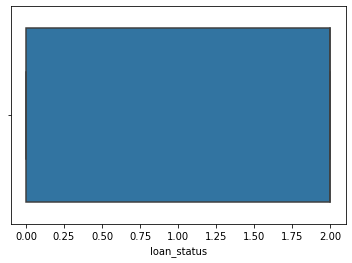

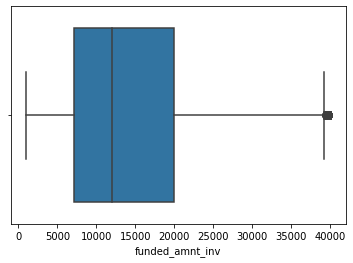

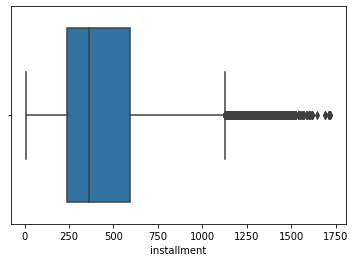

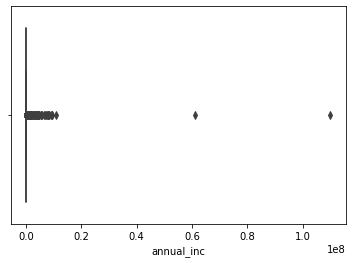

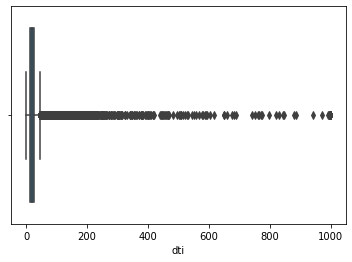

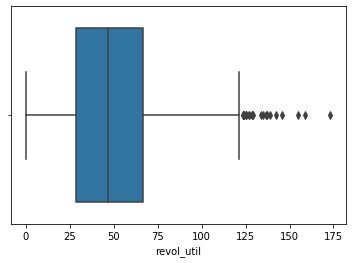

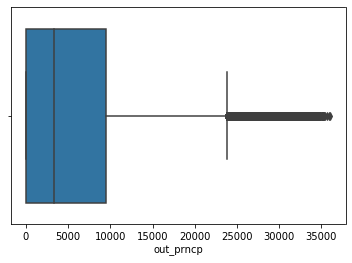

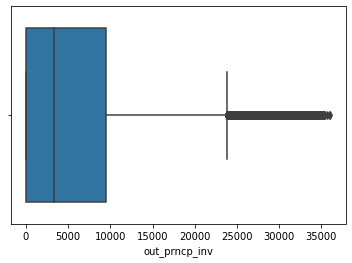

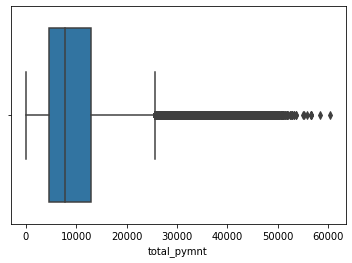

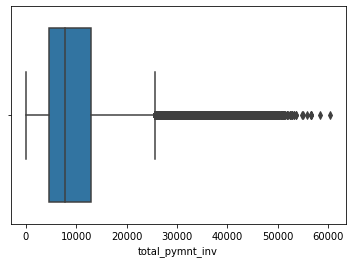

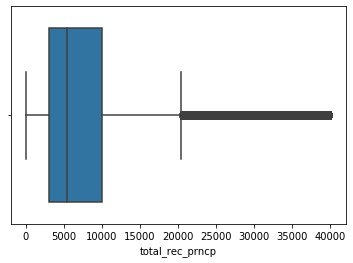

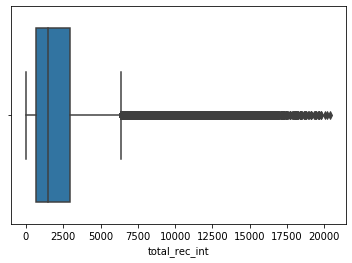

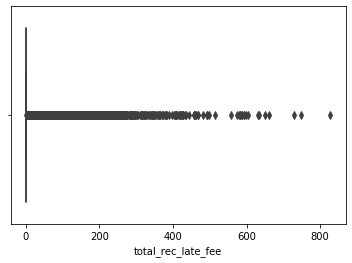

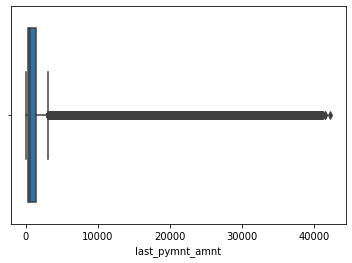

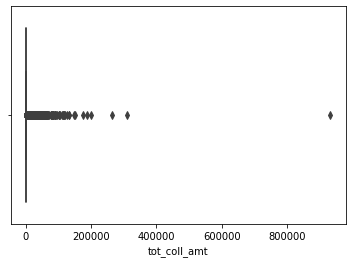

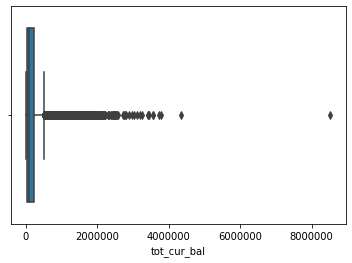

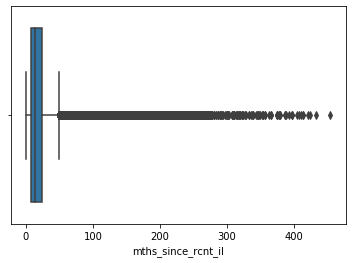

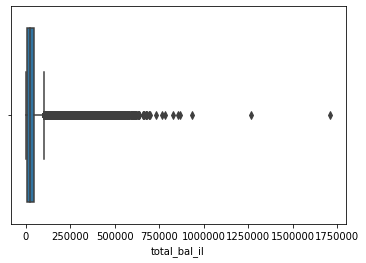

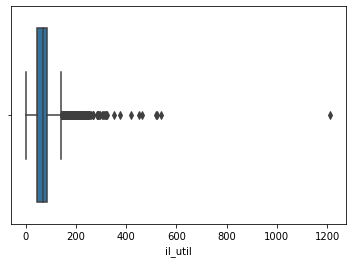

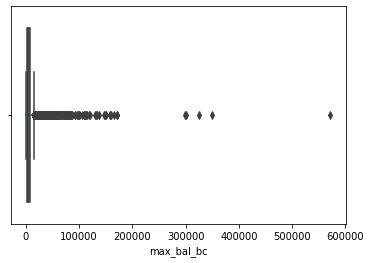

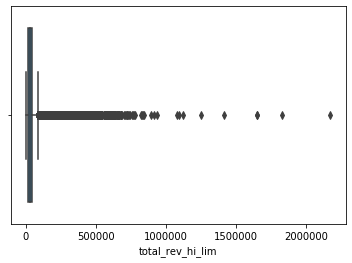

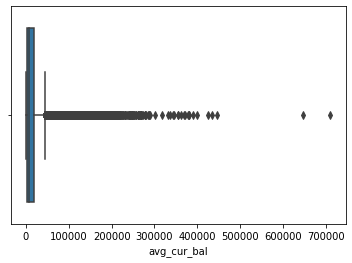

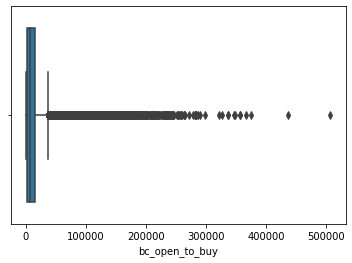

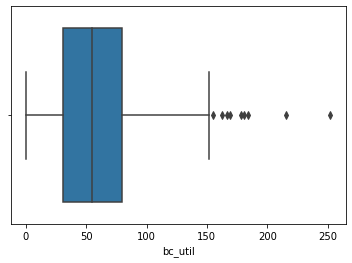

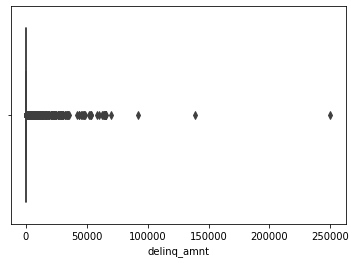

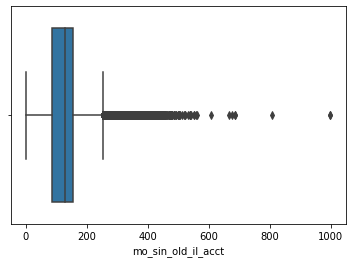

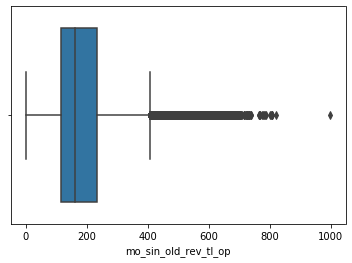

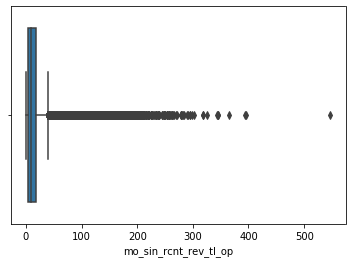

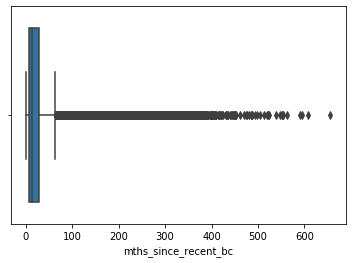

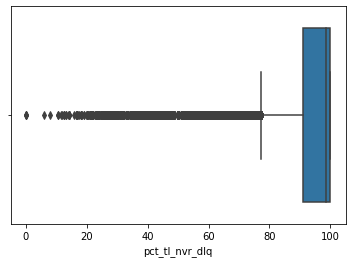

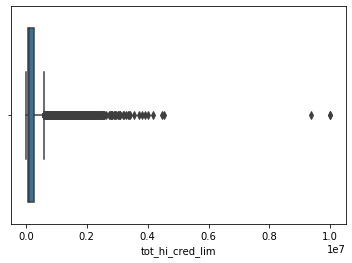

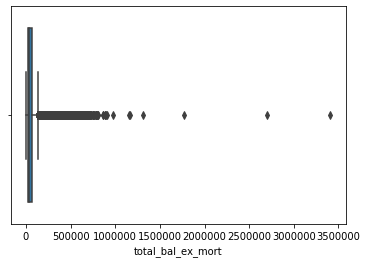

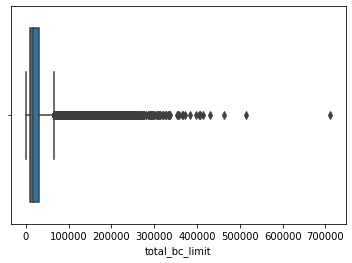

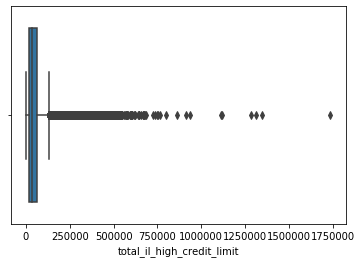

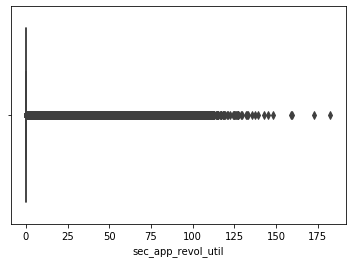

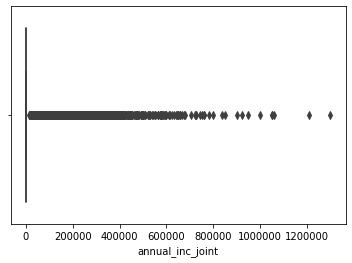

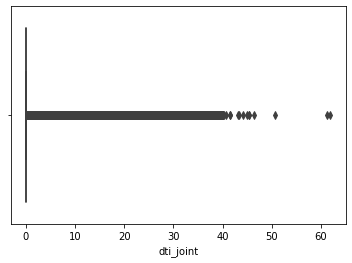

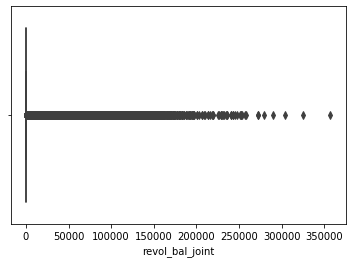

In [38]:
num=num.select_dtypes(include=(int,float))
for i in num.columns:
    sns.boxplot(num[i])
    plt.show()

In [81]:
num[num['dti']>700][['loan_amnt','total_rec_prncp','int_rate','total_rec_int','total_pymnt','out_prncp','annual_inc']]

loan_amnt  total_rec_prncp  int_rate  total_rec_int   total_pymnt  \
6213        34275         10515.42     13.49        7594.16  18109.580000   
17181       11200          2476.91     30.84        5952.39   8429.300000   
19128       28000         28000.00     11.39        4767.18  32767.178898   
33720        6000          2715.01     14.99        1366.91   4096.920000   
64949       28000         28000.00     11.49        2634.85  30634.846197   
...           ...              ...       ...            ...           ...   
431812      20000          4173.11     12.62        3017.89   7191.000000   
432428      20000          4090.43     13.59        3272.55   7362.980000   
433068      30000         12295.75      9.44        3090.26  15386.010000   
438476      18000          7377.45      9.44        1830.55   9208.000000   
440180      30000          6770.49     11.99        4434.82  11205.310000   

        out_prncp  annual_inc  
6213     23759.58      1500.0  
17181     8723.09      1800.0  
19128        0.00      1000.0  
33720        0.00      1000.0  
64949        0.00       400.0  
...           ...         ...  
431812   15826.89       500.0  
432428   15909.57        25.0  
433068   17704.25      1000.0  
438476   10622.55      1000.0  
440180   23229.51      1200.0  

[74 rows x 7 columns]

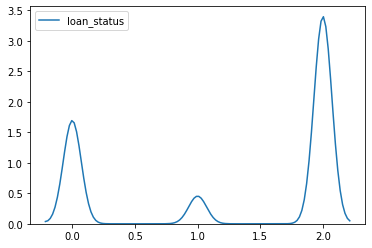

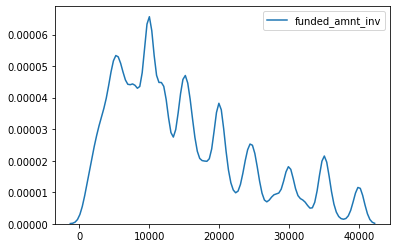

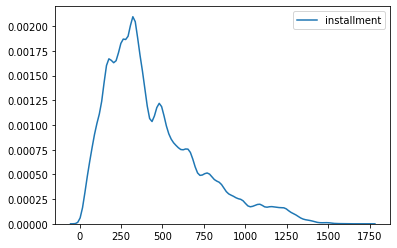

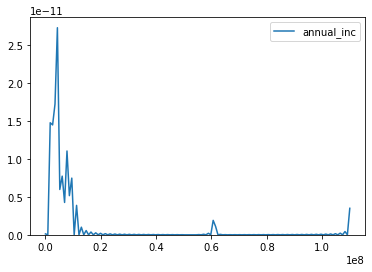

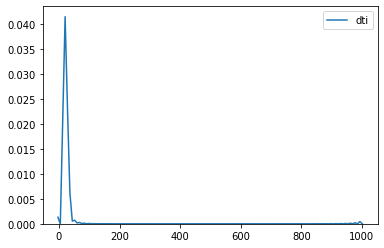

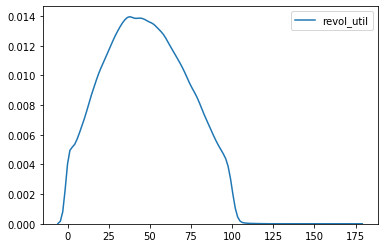

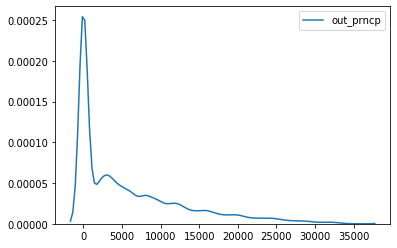

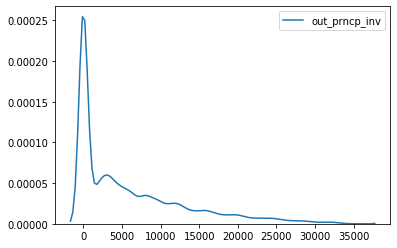

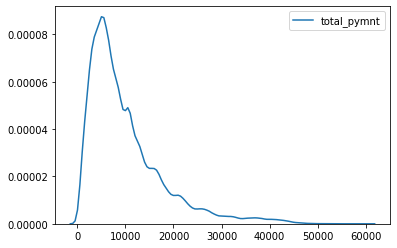

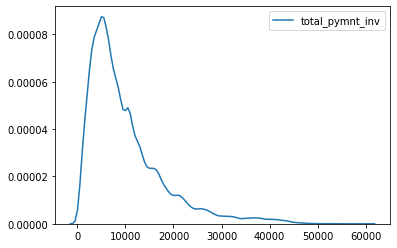

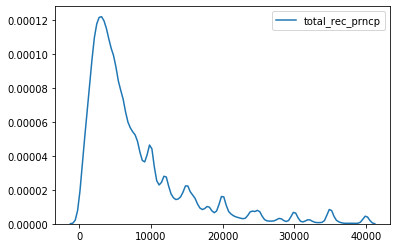

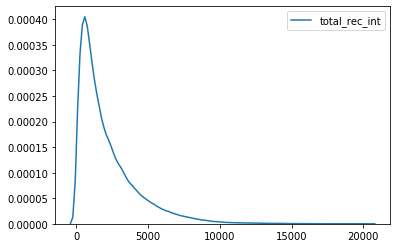

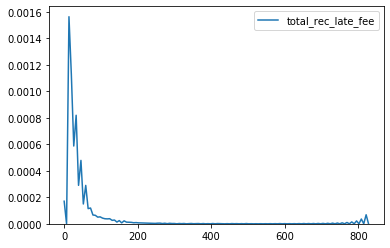

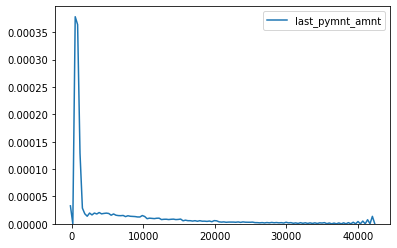

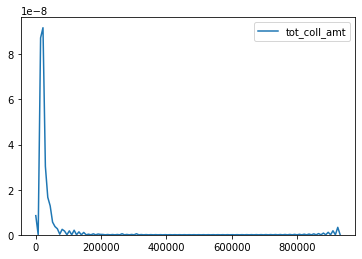

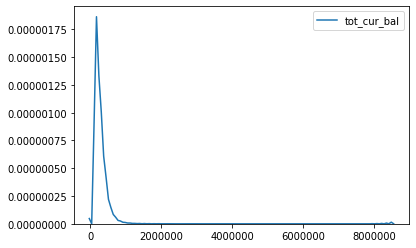

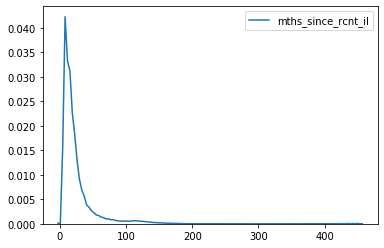

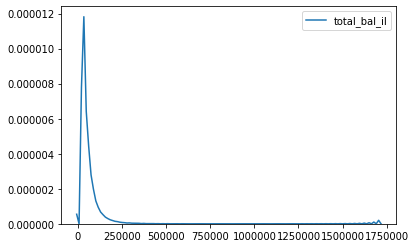

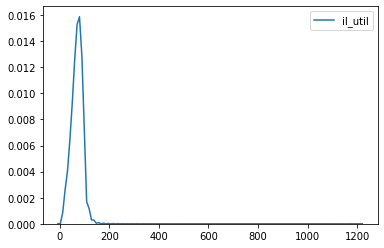

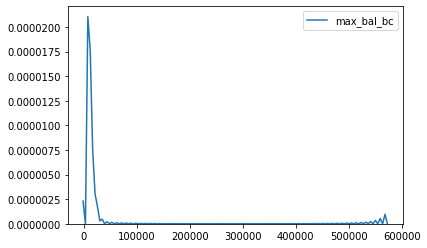

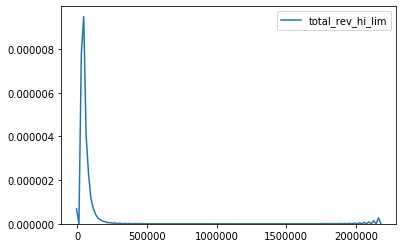

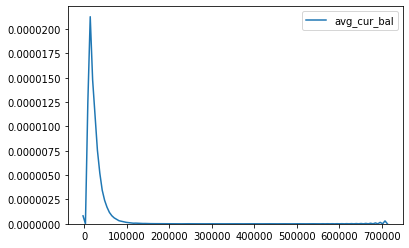

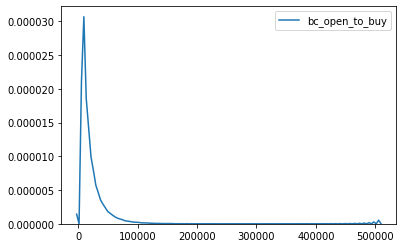

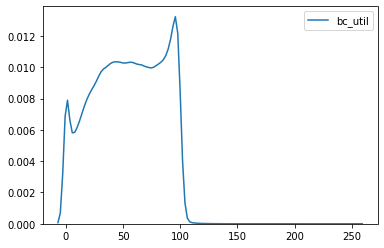

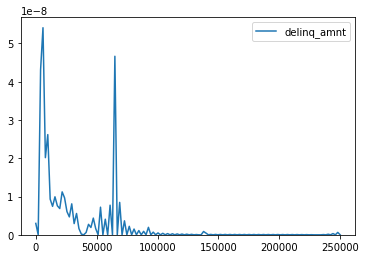

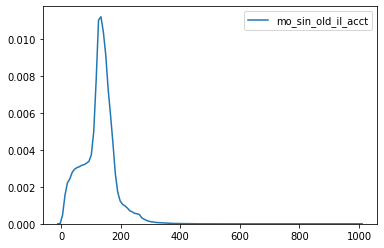

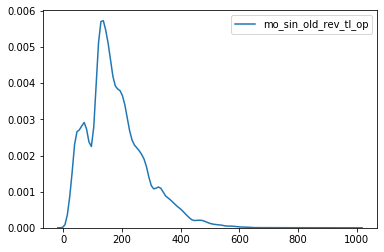

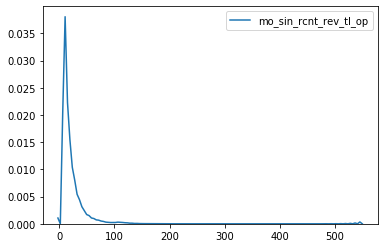

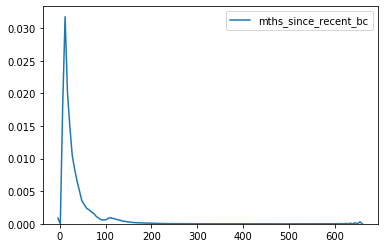

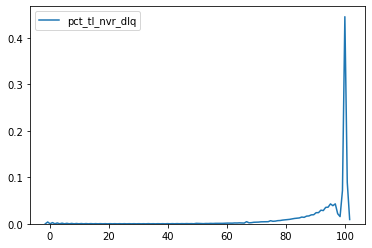

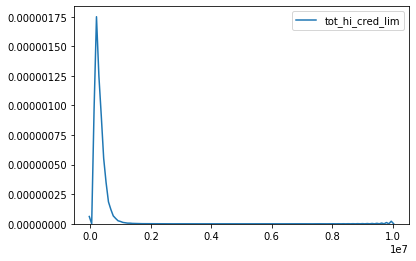

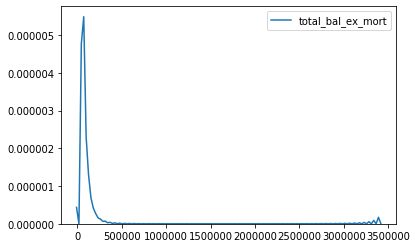

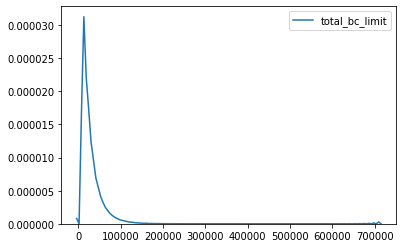

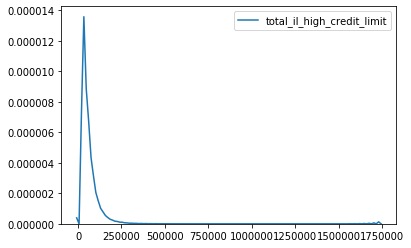

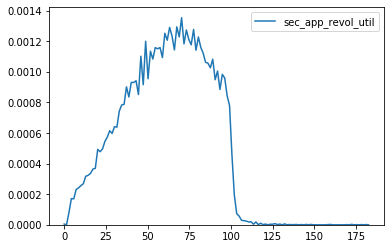

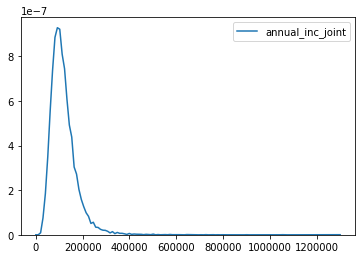

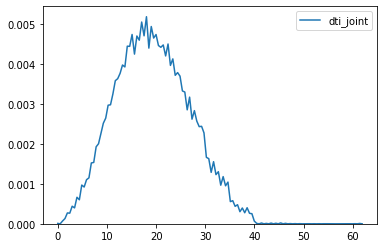

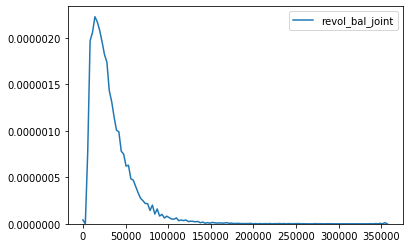

In [39]:
target0=dis[dis['loan_status']==2]
target1=dis[dis['loan_status']==0]
target2=dis[dis['loan_status']==1]
columns=dis.columns
for i in range(0,len(columns)):
    sns.distplot(target0[columns[i]],hist=False,color='b',label='Current')
    sns.distplot(target1[columns[i]],hist=False,color='g',label='Good')
    sns.distplot(target2[columns[i]],hist=False,color='r',label='Bad')
    plt.legend()
    plt.show()

C:\Users\Arun\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Arun\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


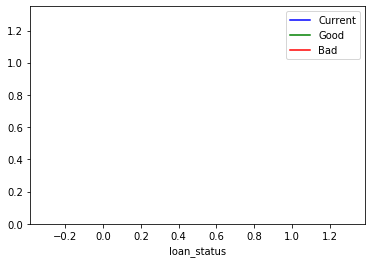

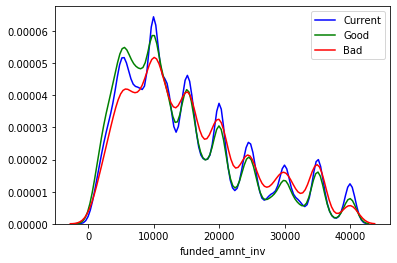

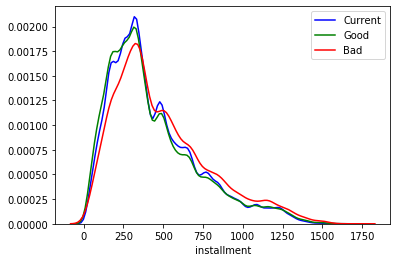

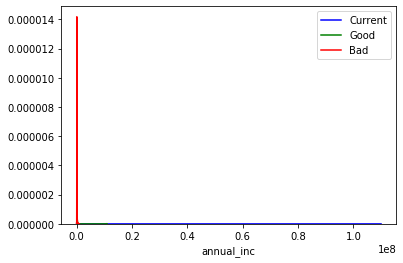

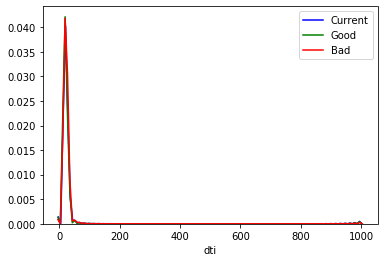

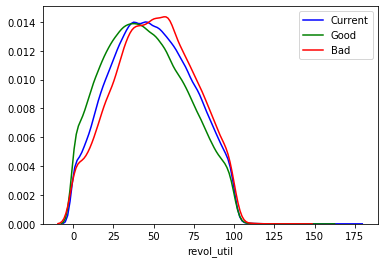

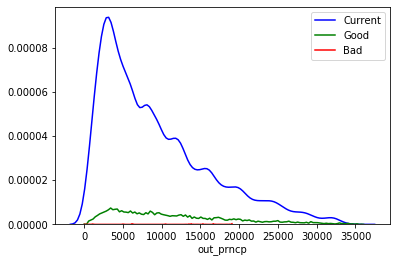

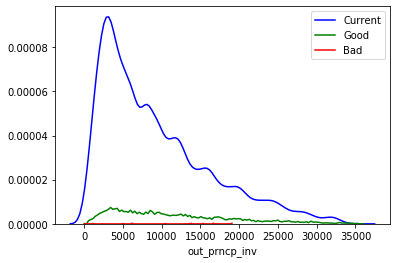

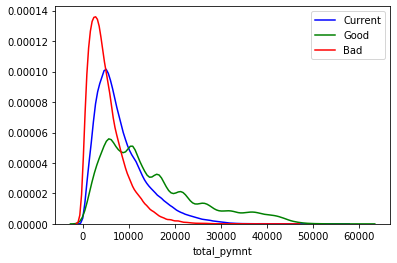

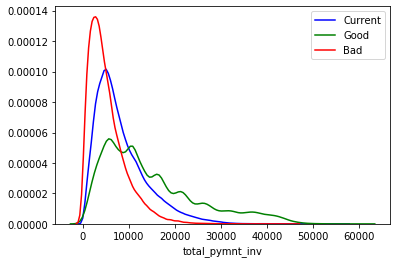

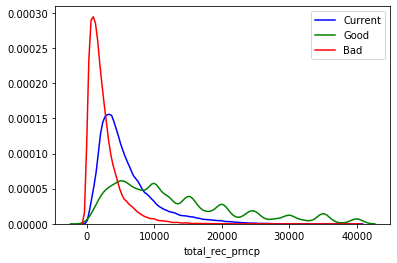

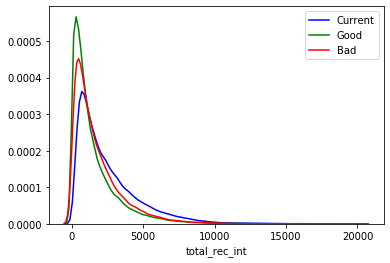

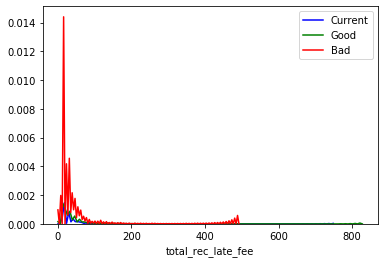

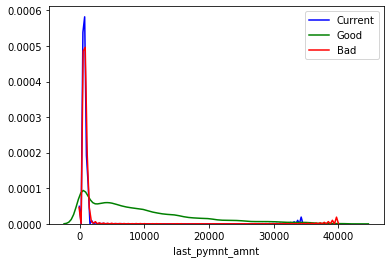

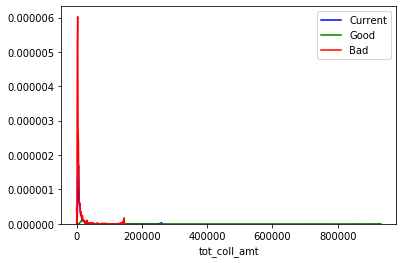

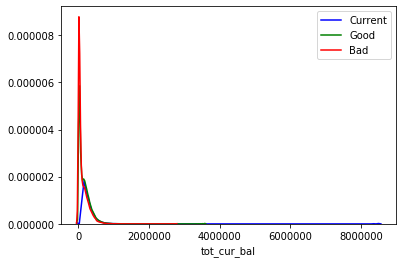

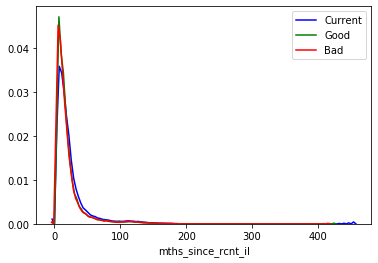

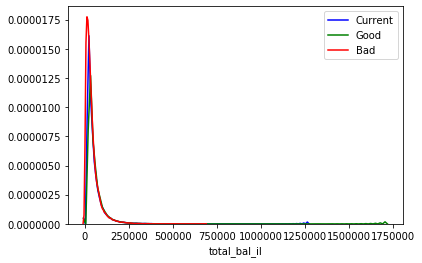

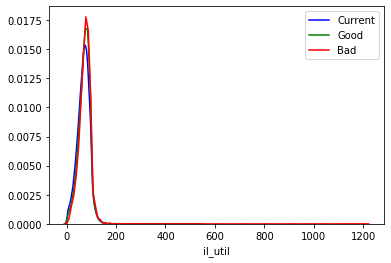

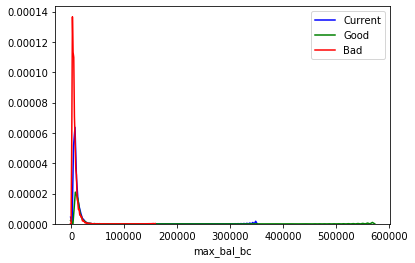

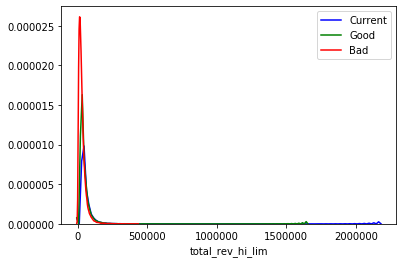

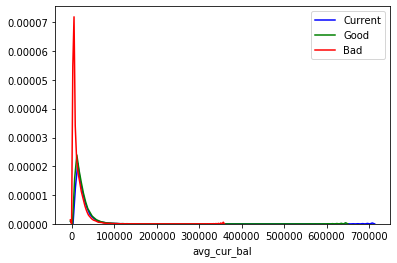

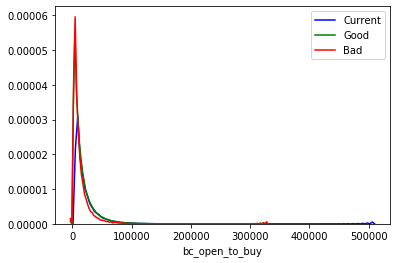

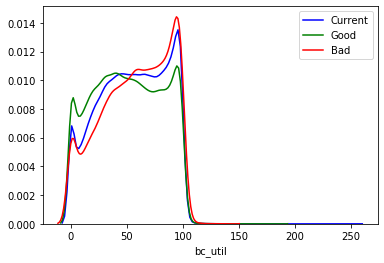

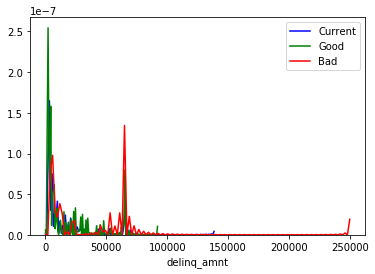

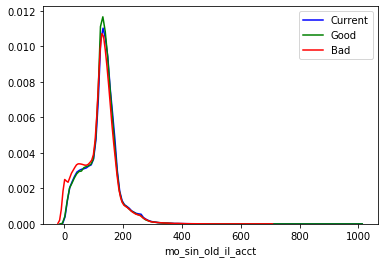

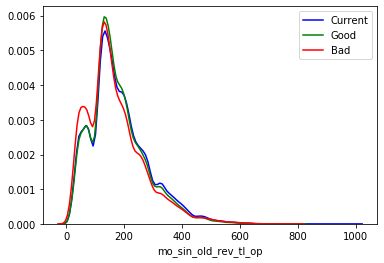

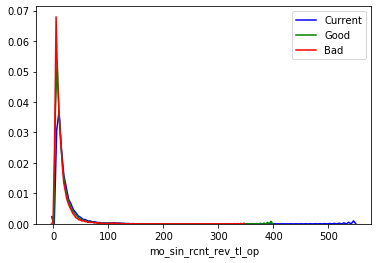

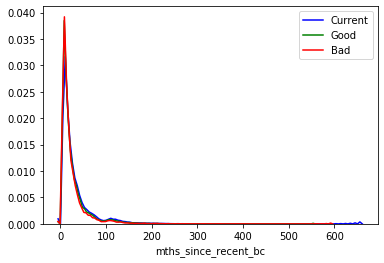

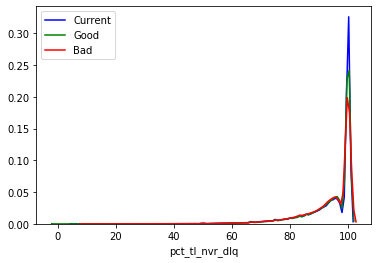

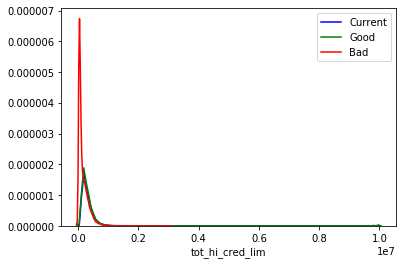

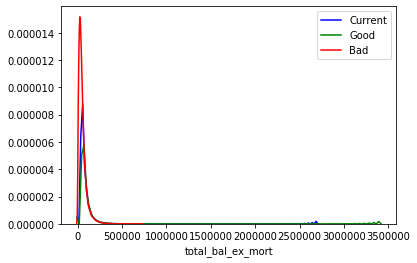

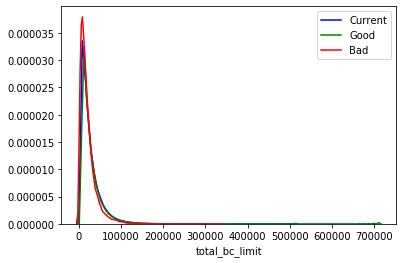

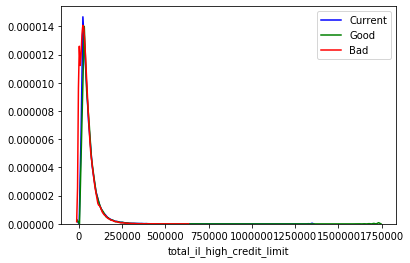

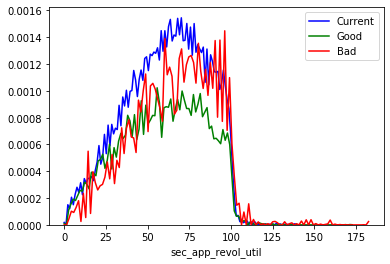

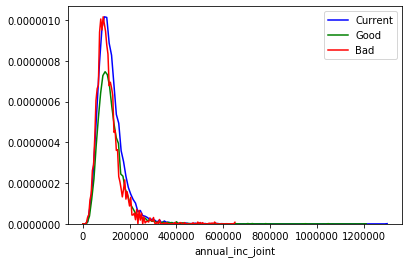

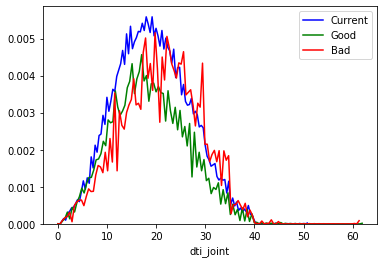

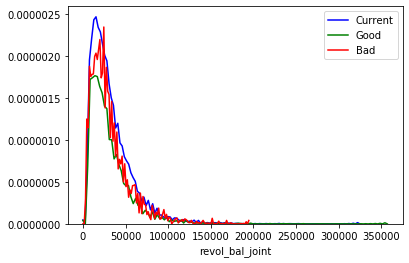

In [40]:
target0=num[num['loan_status']==2]
target1=num[num['loan_status']==0]
target2=num[num['loan_status']==1]
columns=num.columns
for i in range(0,len(columns)):
    sns.distplot(target0[columns[i]],hist=False,color='b',label='Current')
    sns.distplot(target1[columns[i]],hist=False,color='g',label='Good')
    sns.distplot(target2[columns[i]],hist=False,color='r',label='Bad')
    plt.legend()
    plt.show()

In [31]:
d=pd.read_csv('data_imputed1.csv')

C:\Users\Arun\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [32]:
def preprocess(d):
    d.drop('Unnamed: 0',axis=1,inplace=True)
    d['term']=d['term'].str[1:3].astype(int)
    d['emp_length']=d['emp_length'].replace({'10+ years':'10 years','< 1 year': '1 years','1 year': '1 years','0':'0 years',np.nan:'0 years'}).str[:-6].astype(int)
    d['purpose'].replace({'medical':'personal','car':'personal','house':'personal','moving':'personal','vacation':'personal','home_improvement':'personal',
                          'educational':'personal','wedding':'personal','renewable_energy':'other','other':'other'},inplace=True)
    d['pymnt_plan'].replace({'n':0,'y':1},inplace=True)
    d['initial_list_status']=d['initial_list_status'].map({'w':0,'f':1})
    d['application_type']=d['application_type'].map({'Individual':0,'Joint App':1})
    d['hardship_flag']=d['hardship_flag'].map({'N':0,'Y':1})
    d['disbursement_method']=d['disbursement_method'].map({'Cash':0,'DirectPay':1})
    d['debt_settlement_flag']=d['debt_settlement_flag'].map({'N':0,'Y':1})
    #d['loan_status']=d['loan_status'].replace({'Fully Paid': 0, 'Charged Off':1, 'Late (31-120 days)':2,'In Grace Period':2, 'Late (16-30 days)':2, 'Default':1})
    #d['hardship_type']=d['hardship_type'].replace({'INTEREST ONLY-3 MONTHS DEFERRAL':1})
    
    #d['hardship_reason']=d['hardship_reason'].replace({'INCOME_CURTAILMENT':'OTHER','FAMILY_DEATH':'MEDICAL','DISABILITY':'MEDICAL','REDUCED_HOURS':'OTHER','REDUCED_HOURS':'UNEMPLOYMENT','DIVORCE':'OTHER'})
    d['home_ownership']= d['home_ownership'].replace({'ANY':'OTHER','NONE':'OTHER'})
    #d['hardship_loan_status']=d['hardship_loan_status'].replace({'Issued': 'Good', 'Current':'Good',  'Late (31-120 days)':'late','In Grace Period':'late', 'Late (16-30 days)':'late'})
    
    d['verification_status']=d['verification_status'].replace({'Source Verified':0,'Verified':0,'Not Verified':1})
    d['verification_status_joint']=d['verification_status_joint'].replace({'Source Verified':0,'Verified':0,'Not Verified':1,0:0,'0':0})
    
    d['last_pymnt_d'].fillna(d['issue_d'],inplace=True)
    d['issue_d']=pd.to_datetime(d['issue_d'])
    d['last_pymnt_d']=pd.to_datetime(d['last_pymnt_d'])
    d['sec_app_earliest_cr_line']=pd.to_datetime(d['sec_app_earliest_cr_line'],errors='coerce')
    d['sec_app_earliest_cr_line'].fillna(d['issue_d'],inplace=True)
    d['earliest_cr_line']=pd.to_datetime(d['earliest_cr_line'])
    d['earliest_cr_line']=round(((d['issue_d']-d['earliest_cr_line']))/np.timedelta64(1,'M')).astype(int)
    d['sec_app_earliest_cr_line']=round(((d['issue_d']-d['sec_app_earliest_cr_line']))/np.timedelta64(1,'M')).astype(int)
    d['terms_compl']=round(((d['last_pymnt_d']-d['issue_d']))/np.timedelta64(1,'M'))
    d['last_credit_pull_d']=pd.to_datetime(d['last_credit_pull_d'])
    d['last_credit_pull_d']=round(((d['last_credit_pull_d']-d['issue_d']))/np.timedelta64(1,'M'))
    d['last_credit_pull_d']=d['last_credit_pull_d'].replace({-1:0,-2:0,-14:0})
    d=d.fillna(0)
    d['issue_d']=d['issue_d'].dt.month
    d.drop('last_pymnt_d',axis=1,inplace=True)
    
    return d

In [33]:
d=preprocess(d)

In [44]:
d.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443579 entries, 0 to 443578
Data columns (total 112 columns):
loan_amnt                              int64
funded_amnt_inv                        float64
term                                   int32
int_rate                               float64
installment                            float64
grade                                  object
emp_length                             int32
home_ownership                         object
annual_inc                             float64
verification_status                    int64
issue_d                                int64
loan_status                            int64
pymnt_plan                             int64
purpose                                object
addr_state                             object
dti                                    float64
delinq_2yrs                            float64
earliest_cr_line                       int32
inq_last_6mths                         float64
open_acc       

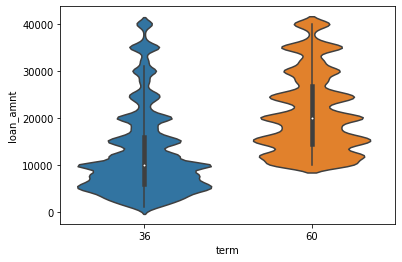

In [45]:
sns.violinplot(d['term'],d['loan_amnt'])

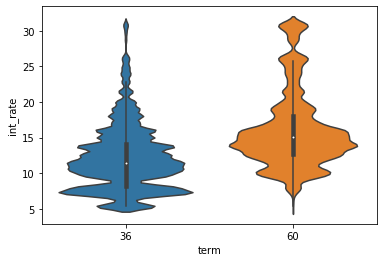

In [46]:
sns.violinplot(d['term'],d['int_rate'])

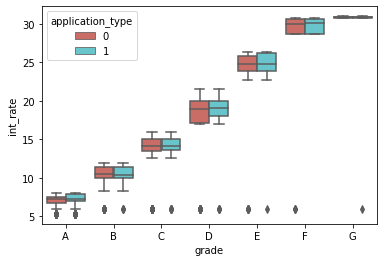

In [47]:
sns.boxplot(d['grade'],d['int_rate'],hue=d['application_type'],palette='hls',order=['A','B','C','D','E','F','G'])

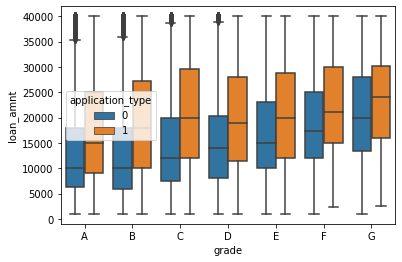

In [48]:
sns.boxplot(d['grade'],d['loan_amnt'],hue=d['application_type'],order=['A','B','C','D','E','F','G'])

In [4]:
num = d[['loan_amnt' ,'funded_amnt_inv', 'installment', 'annual_inc', 'dti', 'revol_bal', 
     'revol_util', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 
     'total_rec_late_fee', 'last_pymnt_amnt', 'tot_coll_amt', 'tot_cur_bal', 'mths_since_rcnt_il', 'total_bal_il', 
     'il_util', 'max_bal_bc', 'total_rev_hi_lim', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'delinq_amnt', 
     'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mths_since_recent_bc', 'pct_tl_nvr_dlq', 
     'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 
     'sec_app_revol_util', 'annual_inc_joint', 'dti_joint', 'revol_bal_joint']]

dis = d[['int_rate', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc', 
     'collections_12_mths_ex_med', 'acc_now_delinq', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 
     'open_rv_12m', 'open_rv_24m', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 
     'chargeoff_within_12_mths', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 
     'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 
     'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 
     'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 
     'sec_app_open_acc', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 
     'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 'mths_since_last_delinq', 
     'mths_since_last_record', 'mths_since_last_major_derog', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq',
     'last_credit_pull_d','sec_app_earliest_cr_line','issue_d','terms_compl','earliest_cr_line']]

cat = d[['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 
     'addr_state', 'initial_list_status', 'application_type', 'hardship_flag', 
     'disbursement_method', 'debt_settlement_flag', 'verification_status_joint']]

tar = d['loan_status']

NameError: name 'd' is not defined

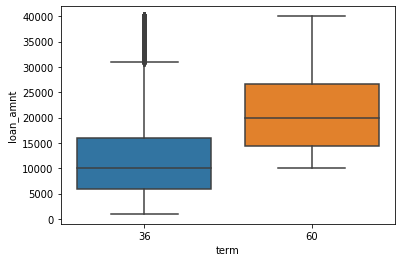

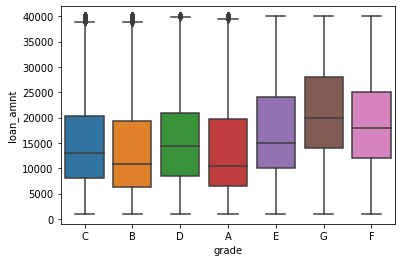

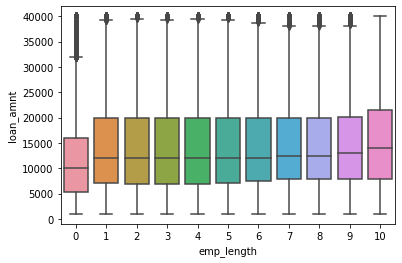

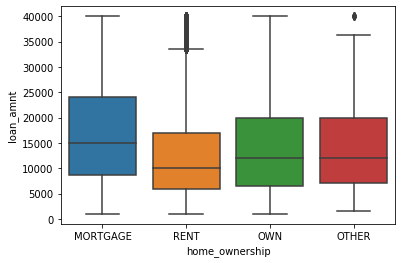

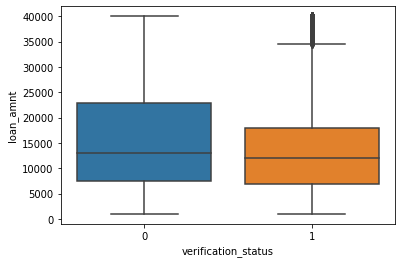

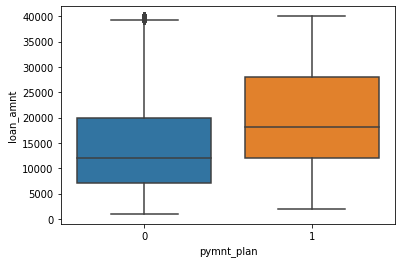

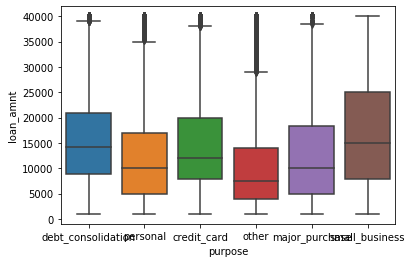

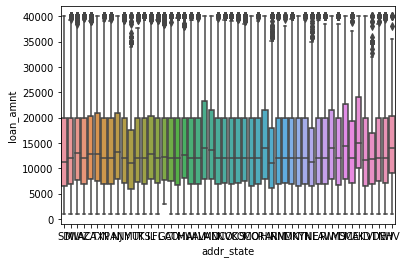

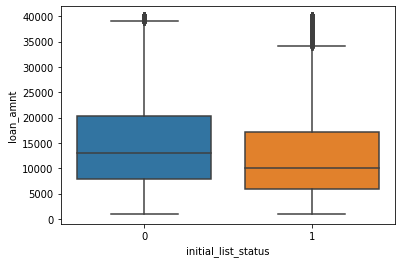

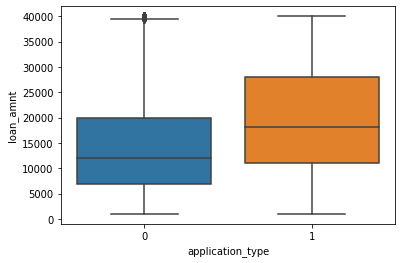

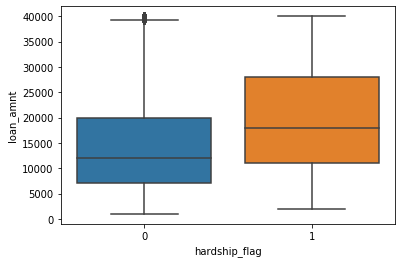

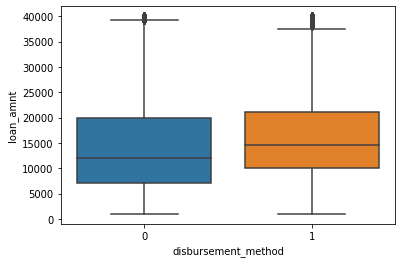

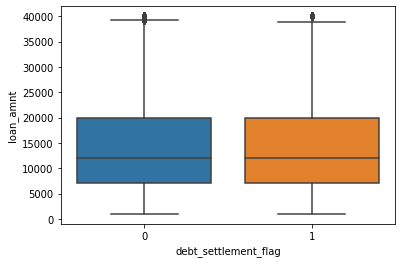

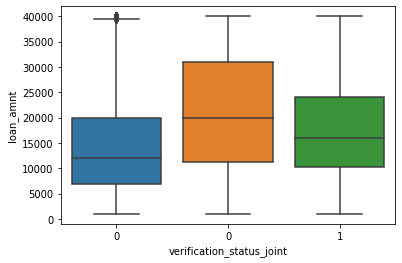

In [50]:
for i in cat.columns:
    sns.boxplot(cat[i],d['loan_amnt'])
    plt.show()

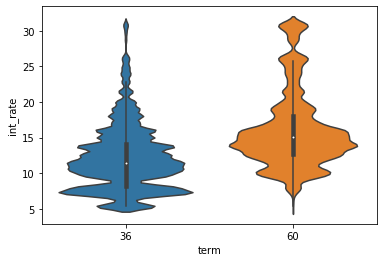

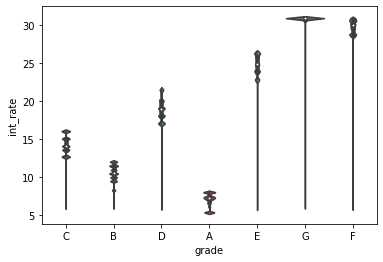

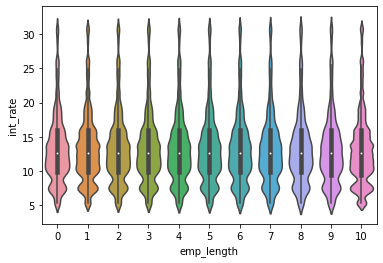

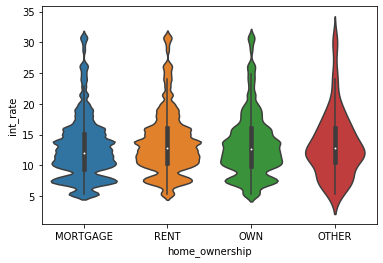

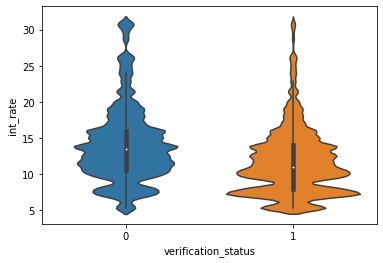

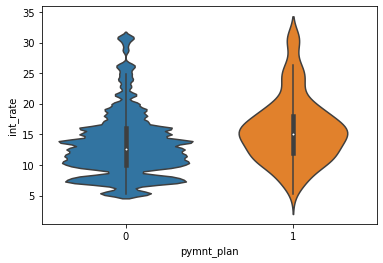

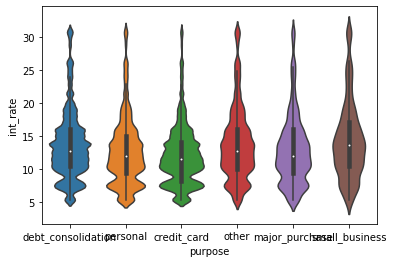

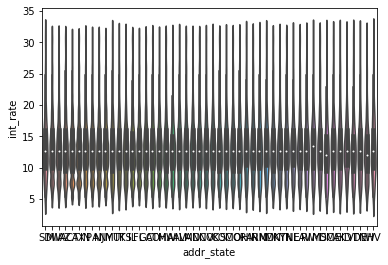

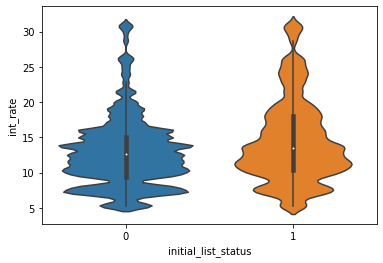

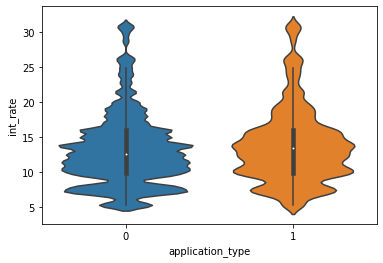

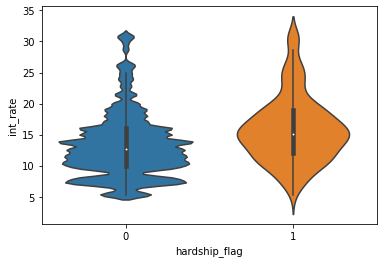

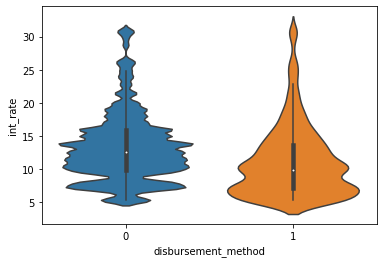

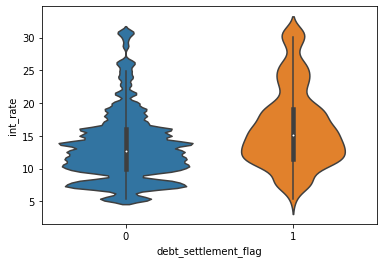

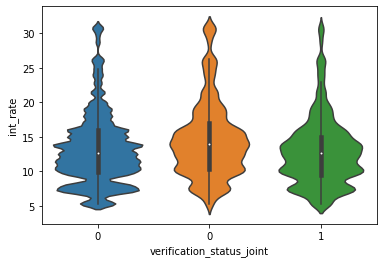

In [51]:
for i in cat.columns:
    sns.violinplot(cat[i],d['int_rate'])
    plt.show()

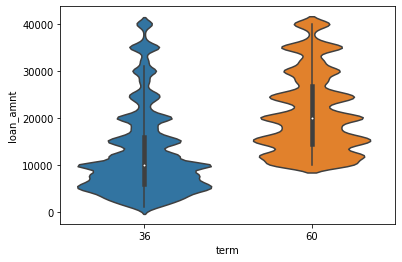

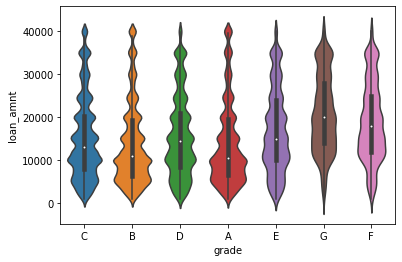

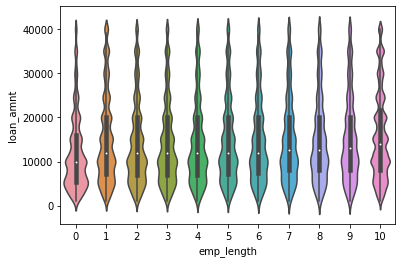

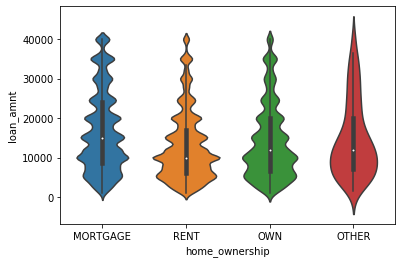

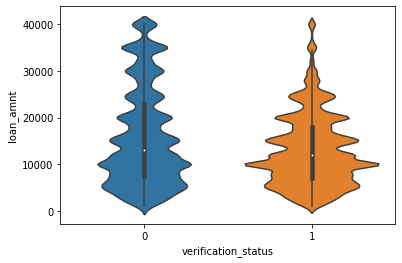

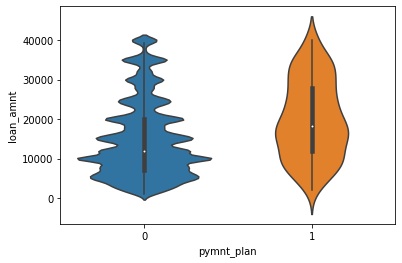

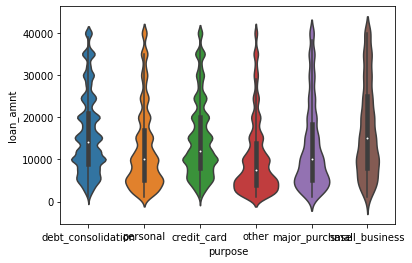

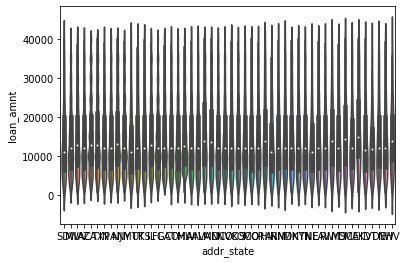

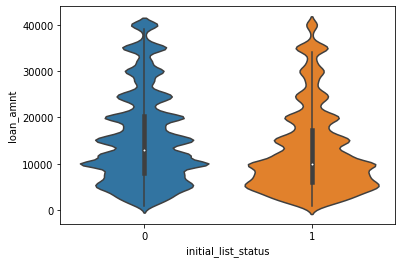

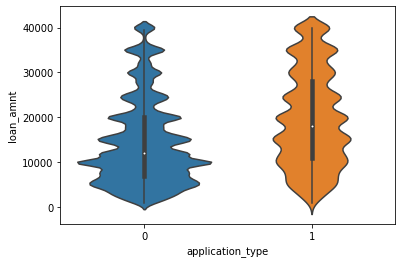

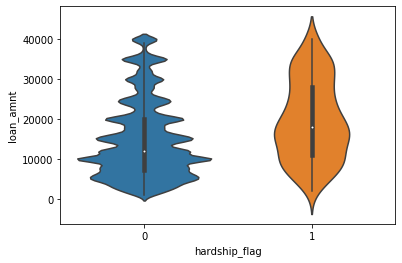

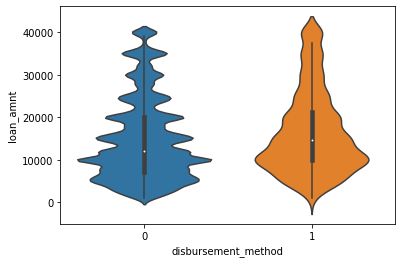

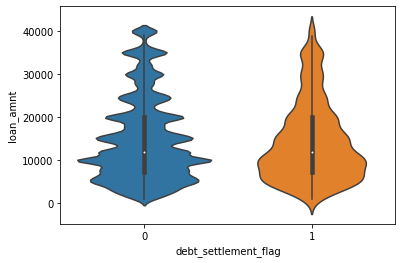

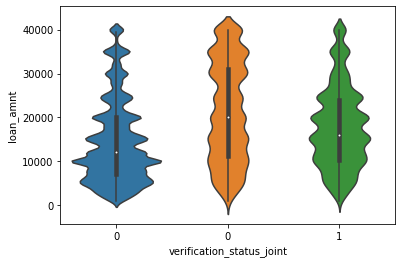

In [52]:
for i in cat.columns:
    sns.violinplot(cat[i],d['loan_amnt'])
    plt.show()

In [53]:
import scipy.stats as st
for i in num.columns:
    
    stat,p=st.ttest_ind(num[i],d['loan_status'])
    prob=0.05
    print(i,'stat: ',stat)
    print(i,'p value: ',p)
    if p<= prob:
        print(i,' is Dependent (reject H0)')
    else:
        print(i,' is Independent (Accept H0)')

loan_amnt stat:  1026.3231071685288
loan_amnt p value:  0.0
loan_amnt  is Dependent (reject H0)
funded_amnt_inv stat:  1026.2928317649582
funded_amnt_inv p value:  0.0
funded_amnt_inv  is Dependent (reject H0)
installment stat:  1037.7345987102801
installment p value:  0.0
installment  is Dependent (reject H0)
annual_inc stat:  261.38831944843184
annual_inc p value:  0.0
annual_inc  is Dependent (reject H0)
dti stat:  676.8271093122617
dti p value:  0.0
dti  is Dependent (reject H0)
revol_bal stat:  469.4046475976192
revol_bal p value:  0.0
revol_bal  is Dependent (reject H0)
revol_util stat:  1247.2796103087317
revol_util p value:  0.0
revol_util  is Dependent (reject H0)
out_prncp stat:  550.6944397360005
out_prncp p value:  0.0
out_prncp  is Dependent (reject H0)
out_prncp_inv stat:  550.6395338586728
out_prncp_inv p value:  0.0
out_prncp_inv  is Dependent (reject H0)
total_pymnt stat:  842.7176210751248
total_pymnt p value:  0.0
total_pymnt  is Dependent (reject H0)
total_pymnt_inv

In [54]:
for i in dis.columns:
    
    stat,p=st.ttest_ind(dis[i],d['loan_status'])
    prob=0.05
    print(i,'stat: ',stat)
    print(i,'p value: ',p)
    if p<= prob:
        print(i,' is Dependent (reject H0)')
    else:
        print(i,' is Independent (Accept H0)')

int_rate stat:  1509.1185750803413
int_rate p value:  0.0
int_rate  is Dependent (reject H0)
delinq_2yrs stat:  -507.50020494245405
delinq_2yrs p value:  0.0
delinq_2yrs  is Dependent (reject H0)
inq_last_6mths stat:  -440.94159910382973
inq_last_6mths p value:  0.0
inq_last_6mths  is Dependent (reject H0)
open_acc stat:  1171.9005616949796
open_acc p value:  0.0
open_acc  is Dependent (reject H0)
pub_rec stat:  -670.3576833705549
pub_rec p value:  0.0
pub_rec  is Dependent (reject H0)
total_acc stat:  1231.0307269836276
total_acc p value:  0.0
total_acc  is Dependent (reject H0)
collections_12_mths_ex_med stat:  -927.3374609872692
collections_12_mths_ex_med p value:  0.0
collections_12_mths_ex_med  is Dependent (reject H0)
acc_now_delinq stat:  -953.3728833869802
acc_now_delinq p value:  0.0
acc_now_delinq  is Dependent (reject H0)
open_acc_6m stat:  -189.8860081017443
open_acc_6m p value:  0.0
open_acc_6m  is Dependent (reject H0)
open_act_il stat:  317.7689581679673
open_act_il p va

C:\Users\Arun\Anaconda3\lib\site-packages\numpy\core\_methods.py:117: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
C:\Users\Arun\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Arun\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Arun\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


 stat:  -126.83381347127647
inq_fi p value:  0.0
inq_fi  is Dependent (reject H0)
total_cu_tl stat:  33.40970897278443
total_cu_tl p value:  1.4082365354607103e-244
total_cu_tl  is Dependent (reject H0)
inq_last_12m stat:  188.88544965055837
inq_last_12m p value:  0.0
inq_last_12m  is Dependent (reject H0)
acc_open_past_24mths stat:  646.3440948487192
acc_open_past_24mths p value:  0.0
acc_open_past_24mths  is Dependent (reject H0)
chargeoff_within_12_mths stat:  -946.5719025445633
chargeoff_within_12_mths p value:  0.0
chargeoff_within_12_mths  is Dependent (reject H0)
mo_sin_rcnt_tl stat:  517.2104082345478
mo_sin_rcnt_tl p value:  0.0
mo_sin_rcnt_tl  is Dependent (reject H0)
mort_acc stat:  36.322166302470585
mort_acc p value:  1.18103555593109e-288
mort_acc  is Dependent (reject H0)
mths_since_recent_inq stat:  537.991146705747
mths_since_recent_inq p value:  0.0
mths_since_recent_inq  is Dependent (reject H0)
num_accts_ever_120_pd stat:  -307.02517876566185
num_accts_ever_120_pd p

In [55]:
for i in cat.columns:
    table=pd.crosstab(cat[i],d['loan_status'])
    stat,p,dof,expected=st.chi2_contingency(table)
    prob=0.95
    critical = st.chi2.ppf(prob,dof)
    print(i,'stat: ',stat)
    print(i,'dof: ',dof)
    print(i,'p value: ',p)
    if abs(stat)>= critical:
        print(i,' is Inependent (reject H0)')
    else:
        print(i,' is Independent (Accept H0)')

term stat:  2915.1739068739826
term dof:  2
term p value:  0.0
term  is Dependent (reject H0)
grade stat:  18310.619632359092
grade dof:  12
grade p value:  0.0
grade  is Dependent (reject H0)
emp_length stat:  741.0005346216602
emp_length dof:  20
emp_length p value:  4.610650722889267e-144
emp_length  is Dependent (reject H0)
home_ownership stat:  1485.206548970126
home_ownership dof:  6
home_ownership p value:  0.0
home_ownership  is Dependent (reject H0)
verification_status stat:  2229.2851568367764
verification_status dof:  2
verification_status p value:  0.0
verification_status  is Dependent (reject H0)
pymnt_plan stat:  786.9799855552421
pymnt_plan dof:  2
pymnt_plan p value:  1.2866708220304518e-171
pymnt_plan  is Dependent (reject H0)
purpose stat:  880.305703646476
purpose dof:  10
purpose p value:  1.1020563755498899e-182
purpose  is Dependent (reject H0)
addr_state stat:  1918.6143577538353
addr_state dof:  98
addr_state p value:  0.0
addr_state  is Dependent (reject H0)
in

In [14]:
def cramers_stat(x,y):
    table=pd.crosstab(x,y)
    chi2=st.chi2_contingency(table)[0]
    n=table.sum().sum()
    phi2=chi2/n
    r,k=table.shape
    phi2corr=max(0,phi2 - ((k-1)*(r-1))/(n-1))
    rcorr=r-((r-1)**2)/(n-1)
    kcorr=k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

def catg_heatmap(dataset):
    columns = dataset.columns
    corr = pd.DataFrame(index=columns, columns=columns)
    for i in range(0, len(columns)):
        for j in range(i, len(columns)):
                if i == j:
                    corr[columns[i]][columns[j]] = 1.0
                else:    
                    cell = cramers_stat(dataset[columns[i]],
                                                 dataset[columns[j]])
                                                 
                    corr[columns[i]][columns[j]] = cell
                    corr[columns[j]][columns[i]] = cell
    corr.fillna(0,inplace=True)                
    return corr    

In [20]:
import scipy.stats as st
catg_corr=catg_heatmap(cat)

C:\Users\Arun\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


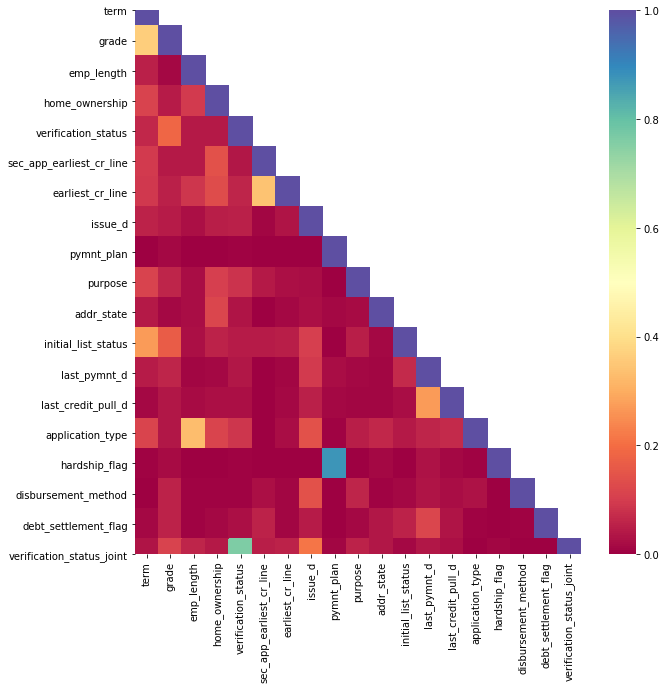

In [24]:
f,ax=plt.subplots(figsize=(10,10))
corr_lt=catg_corr.where(np.tril(np.ones(catg_corr.shape)).astype(np.bool))
hmap=sns.heatmap(data=corr_lt,cmap='Spectral')
plt.show()

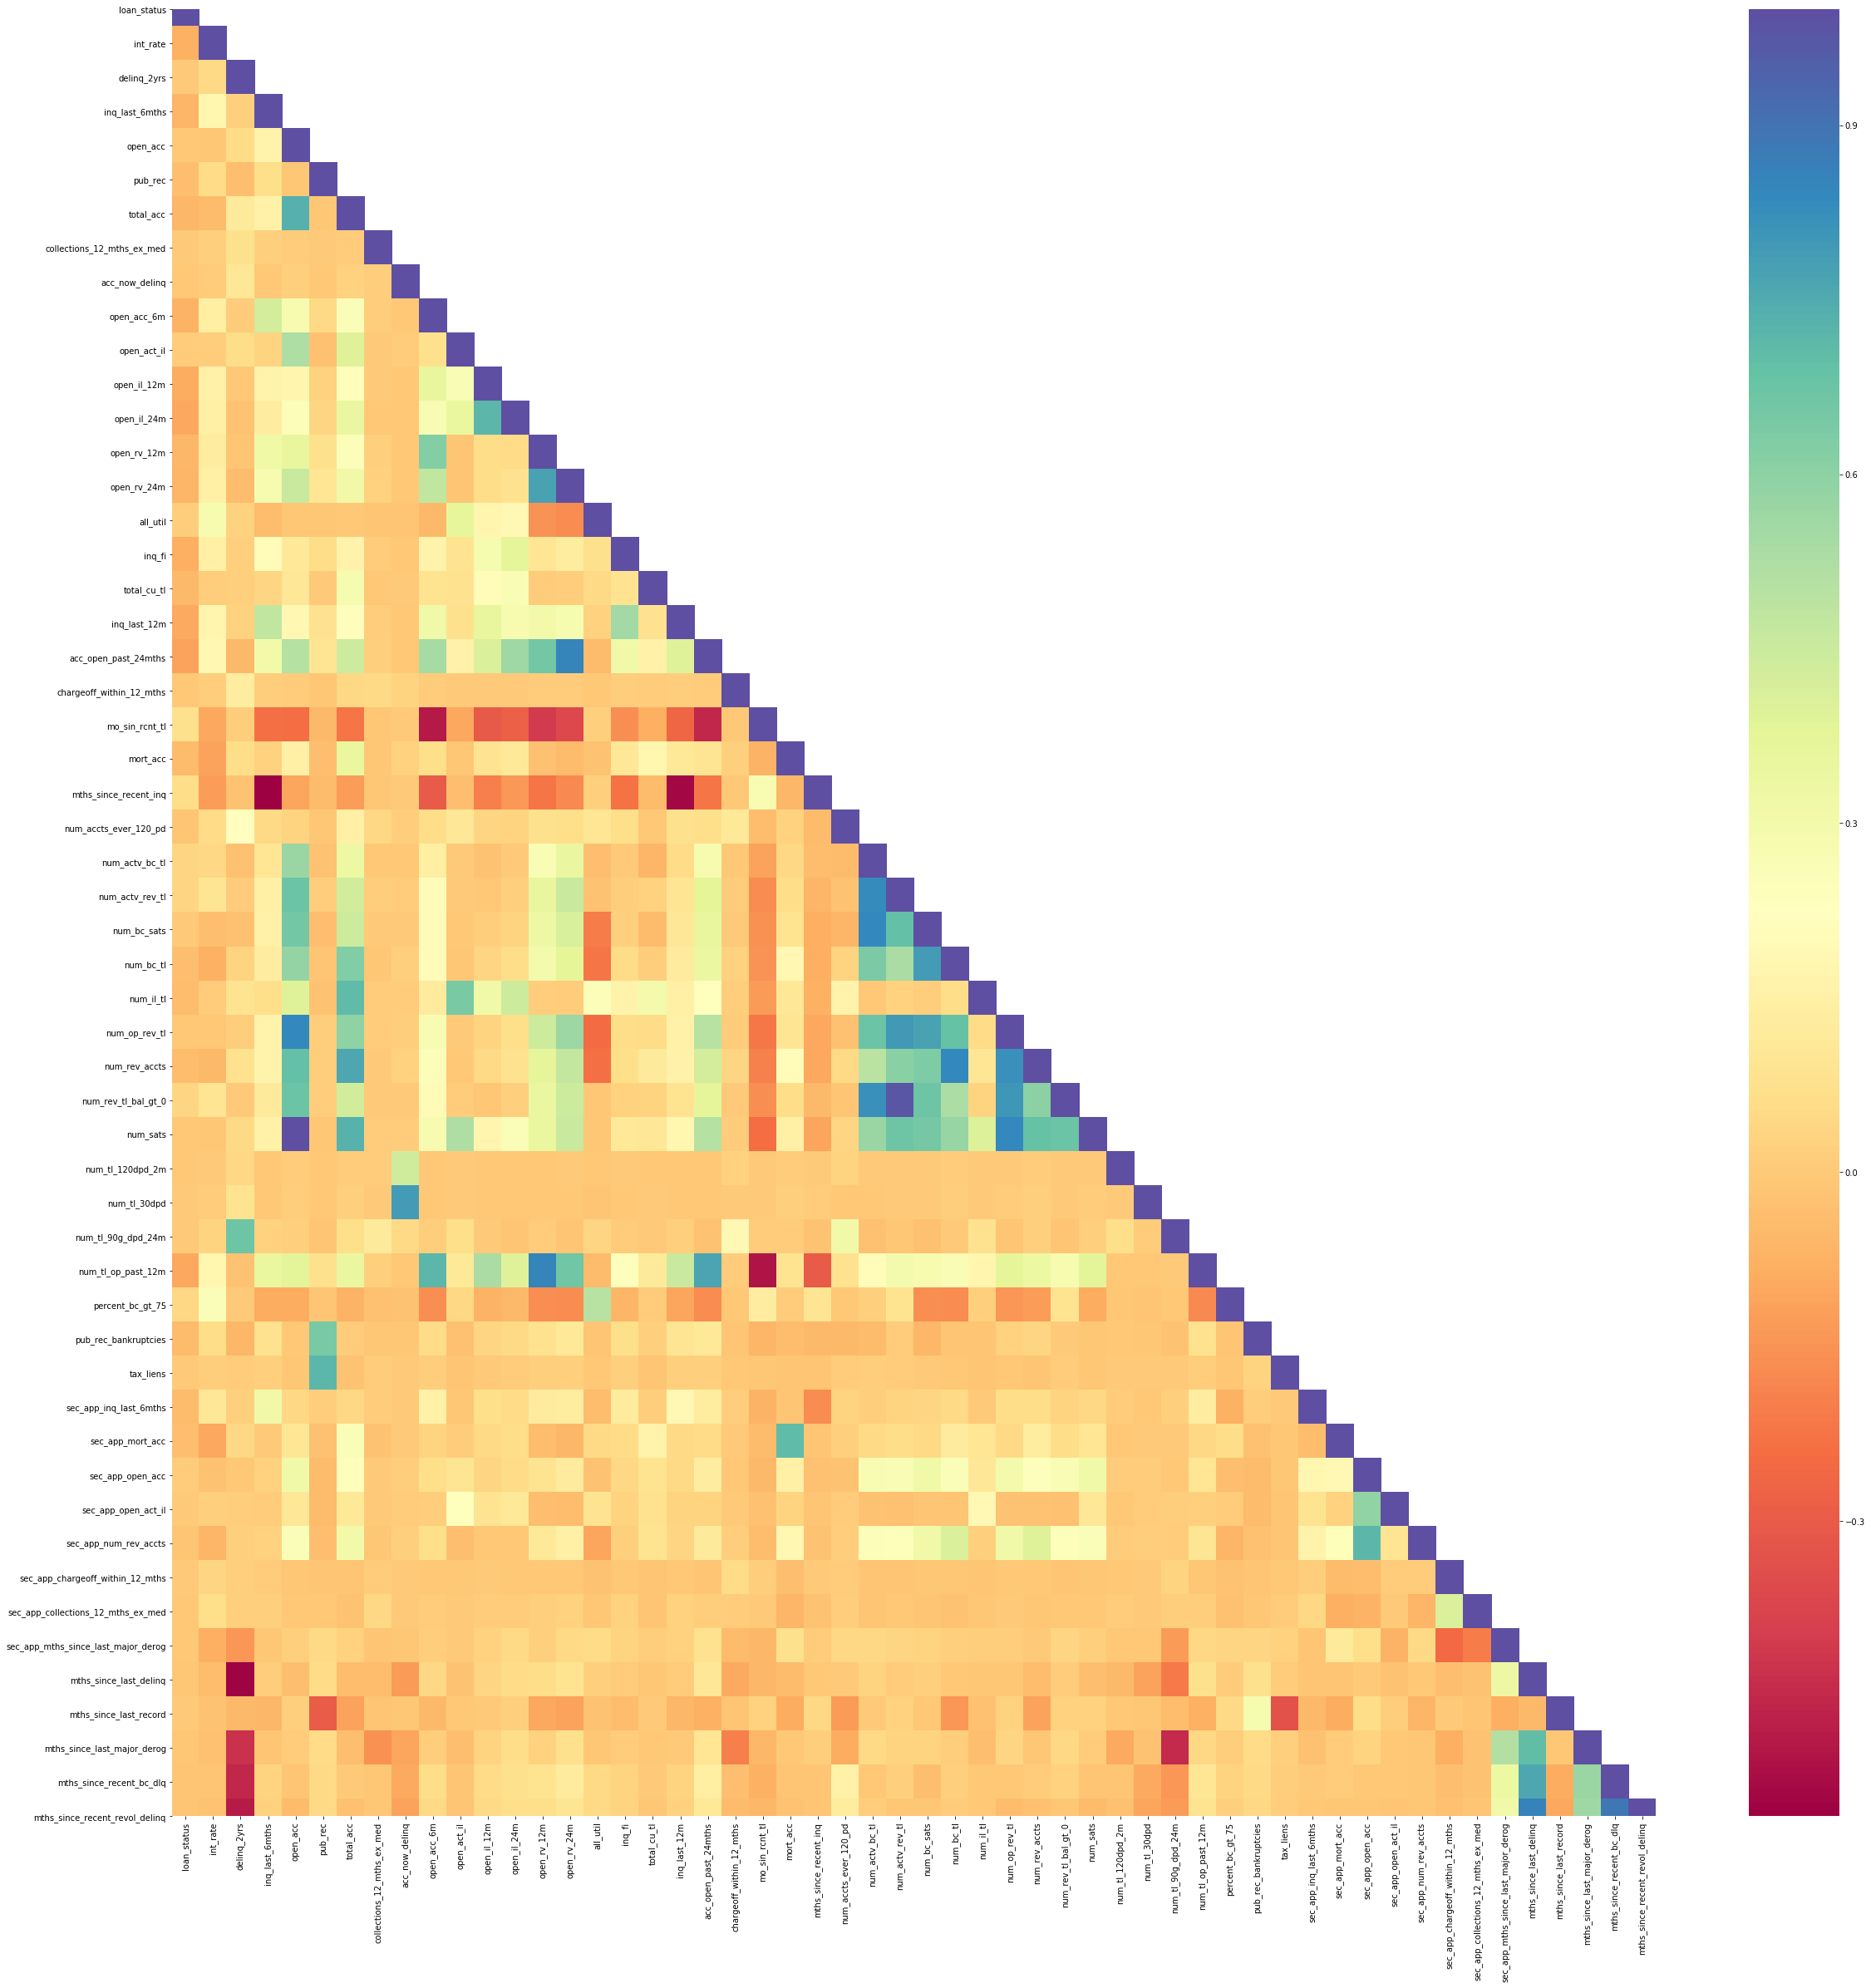

In [22]:
f,ax=plt.subplots(figsize=(40,40))
corr_lt=dis.corr().where(np.tril(np.ones(dis.corr().shape)).astype(np.bool))
hmap=sns.heatmap(data=corr_lt,cmap='Spectral')
plt.show()

In [21]:
d['all_util']=d['all_util'].replace({np.inf:0})

In [34]:
d.to_csv('preprocess.csv')

In [74]:
d1=pd.get_dummies(data=d,columns=cat.columns,drop_first=True)

In [75]:
d1train=d1[d1['loan_status']!=2]

In [8]:
d1train['all_util']=d1train['all_util'].replace({np.inf:0})

C:\Users\Arun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [104]:
import statsmodels.api as sm

In [105]:
y=d1train['loan_status']
x=d1train.drop('loan_status',axis=1)
xc=sm.add_constant(x)

C:\Users\Arun\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [65]:
x=x.fillna(0)

In [ ]:
vif1=pd.DataFrame({'vif': vif1[0:]},index=xc.columns)
pd.set_option('display.Max_rows',181)

In [74]:
vif1

vif
const                                1.732145e+05
loan_amnt                            9.000591e+05
funded_amnt_inv                      8.995461e+05
int_rate                             2.673164e+01
installment                          5.204302e+01
annual_inc                           1.378426e+00
issue_d                              2.093286e+00
dti                                  1.239519e+00
delinq_2yrs                          2.590041e+00
earliest_cr_line                     7.459597e+00
inq_last_6mths                       1.728030e+00
open_acc                             5.287982e+02
pub_rec                              1.004905e+01
revol_bal                            2.171017e+01
revol_util                           5.912833e+00
total_acc                            4.823749e+02
out_prncp                            5.833264e+05
out_prncp_inv                        5.833391e+05
total_pymnt                          1.038149e+06
total_pymnt_inv                      1.038836e+06
total_rec_prncp                      1.868008e+02
total_rec_int                        1.066482e+01
total_rec_late_fee                   1.111378e+00
last_pymnt_amnt                      5.462855e+00
last_credit_pull_d                   1.767697e+00
collections_12_mths_ex_med           1.030109e+00
acc_now_delinq                       4.730895e+00
tot_coll_amt                         1.009160e+00
tot_cur_bal                          4.303374e+01
open_acc_6m                          2.409822e+00
open_act_il                          3.592347e+01
open_il_12m                          1.244279e+01
open_il_24m                          1.990273e+01
mths_since_rcnt_il                   1.535141e+00
total_bal_il                         6.183262e+01
il_util                              2.139213e+00
open_rv_12m                          3.362940e+01
open_rv_24m                          5.385122e+01
max_bal_bc                           4.104995e+00
all_util                             3.519173e+00
total_rev_hi_lim                     2.396719e+01
inq_fi                               1.686239e+00
total_cu_tl                          1.326656e+00
inq_last_12m                         2.258965e+00
acc_open_past_24mths                 7.574991e+01
avg_cur_bal                          5.357775e+00
bc_open_to_buy                       1.779701e+01
bc_util                              7.107039e+00
chargeoff_within_12_mths             1.056358e+00
delinq_amnt                          1.111256e+00
mo_sin_old_il_acct                   1.739786e+00
mo_sin_old_rev_tl_op                 7.389415e+00
mo_sin_rcnt_rev_tl_op                2.305520e+00
mo_sin_rcnt_tl                       1.988571e+00
mort_acc                             1.145886e+01
mths_since_recent_bc                 1.704616e+00
mths_since_recent_inq                1.331486e+00
num_accts_ever_120_pd                2.028156e+00
num_actv_bc_tl                       9.162477e+00
num_actv_rev_tl                      3.145705e+01
num_bc_sats                          9.512136e+00
num_bc_tl                            9.150814e+00
num_il_tl                            1.870862e+02
num_op_rev_tl                        9.833368e+01
num_rev_accts                        2.213094e+02
num_rev_tl_bal_gt_0                  3.100935e+01
num_sats                             5.483937e+02
num_tl_120dpd_2m                     1.953139e+00
num_tl_30dpd                         3.848171e+00
num_tl_90g_dpd_24m                   2.167672e+00
num_tl_op_past_12m                   4.807494e+01
pct_tl_nvr_dlq                       2.491397e+00
percent_bc_gt_75                     3.700490e+00
pub_rec_bankruptcies                 5.917028e+00
tax_liens                            5.223846e+00
tot_hi_cred_lim                      4.061076e+01
total_bal_ex_mort                    6.115067e+01
total_bc_limit                       2.254168e+01
total_il_high_credit_limit           1.796739e+01
sec_app_earliest_cr_line             1.674169e

In [76]:
(d1['loan_amnt']-d1['funded_amnt_inv']).value_counts()

0.000000      429723
25.000000       5532
250.000000      4293
50.000000       2009
275.000000       960
300.000000       566
75.000000        204
325.000000        73
525.000000        57
500.000000        57
100.000000        21
550.000000        21
225.000000        15
200.000000         9
350.000000         9
175.000000         9
150.000000         7
125.000000         7
575.000000         4
600.000000         2
11.557838          1
dtype: int64

In [77]:
x=d1train.drop('funded_amnt_inv',axis=1)
xc=sm.add_constant(x)

C:\Users\Arun\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [78]:
vif1= [vif(xc.values,i) for i in range(xc.shape[1])]

In [80]:
vif2=pd.DataFrame({'vif': vif1[0:]},index=xc.columns)
vif2

vif
const                                173214.519754
loan_amnt                                64.473505
int_rate                                 26.737464
installment                              52.026613
annual_inc                                1.378435
issue_d                                   2.097155
loan_status                               3.512714
dti                                       1.239768
delinq_2yrs                               2.590059
earliest_cr_line                          7.461470
inq_last_6mths                            1.728145
open_acc                                528.793196
pub_rec                                  10.049138
revol_bal                                21.710778
revol_util                                5.913057
total_acc                               482.374549
out_prncp                            509112.674560
out_prncp_inv                        509110.584473
total_pymnt                          123252.776404
total_pymnt_inv                      123099.262445
total_rec_prncp                         187.730852
total_rec_int                            10.719202
total_rec_late_fee                        1.111862
last_pymnt_amnt                           5.476563
last_credit_pull_d                        1.767674
collections_12_mths_ex_med                1.030311
acc_now_delinq                            4.730902
tot_coll_amt                              1.009172
tot_cur_bal                              43.034862
open_acc_6m                               2.409853
open_act_il                              35.924694
open_il_12m                              12.442794
open_il_24m                              19.902732
mths_since_rcnt_il                        1.535159
total_bal_il                             61.833280
il_util                                   2.139180
open_rv_12m                              33.629383
open_rv_24m                              53.851244
max_bal_bc                                4.105183
all_util                                  3.519538
total_rev_hi_lim                         23.967488
inq_fi                                    1.686284
total_cu_tl                               1.326669
inq_last_12m                              2.258997
acc_open_past_24mths                     75.749793
avg_cur_bal                               5.358375
bc_open_to_buy                           17.799132
bc_util                                   7.107355
chargeoff_within_12_mths                  1.056349
delinq_amnt                               1.111267
mo_sin_old_il_acct                        1.739894
mo_sin_old_rev_tl_op                      7.390787
mo_sin_rcnt_rev_tl_op                     2.305530
mo_sin_rcnt_tl                            1.988573
mort_acc                                 11.459097
mths_since_recent_bc                      1.704629
mths_since_recent_inq                     1.331546
num_accts_ever_120_pd                     2.028242
num_actv_bc_tl                            9.162483
num_actv_rev_tl                          31.462158
num_bc_sats                               9.512176
num_bc_tl                                 9.150816
num_il_tl                               187.086129
num_op_rev_tl                            98.334525
num_rev_accts                           221.309546
num_rev_tl_bal_gt_0                      31.009396
num_sats                                548.382665
num_tl_120dpd_2m                          1.953143
num_tl_30dpd                              3.848173
num_tl_90g_dpd_24m                        2.167671
num_tl_op_past_12m                       48.074948
pct_tl_nvr_dlq                            2.491399
percent_bc_gt_75                          3.700464
pub_rec_bankruptcies                      5.917067
tax_liens                                 5.223903
tot_hi_cred_lim                          40.610567
total_bal_ex_mort                        61.150526
total_bc_limit                           22.543857
total_il_high_cred

In [84]:
x=d1train.drop(['funded_amnt_inv','out_prncp','out_prncp_inv'],axis=1)
xc=sm.add_constant(x)

In [85]:
vif2= [vif(xc.values,i) for i in range(xc.shape[1])]

In [86]:
vif3=pd.DataFrame({'vif': vif2[0:]},index=xc.columns)
vif3

vif
const                                173213.352471
loan_amnt                                60.012291
int_rate                                 26.737078
installment                              51.745895
annual_inc                                1.378392
issue_d                                   2.091221
loan_status                               2.357994
dti                                       1.239755
delinq_2yrs                               2.589989
earliest_cr_line                          7.460383
inq_last_6mths                            1.728042
open_acc                                528.786055
pub_rec                                  10.049106
revol_bal                                21.710163
revol_util                                5.912835
total_acc                               482.372576
total_pymnt                          121057.757084
total_pymnt_inv                      120903.799824
total_rec_prncp                         183.739269
total_rec_int                             9.529632
total_rec_late_fee                        1.097871
last_pymnt_amnt                           5.467860
last_credit_pull_d                        1.767279
collections_12_mths_ex_med                1.030263
acc_now_delinq                            4.730893
tot_coll_amt                              1.009171
tot_cur_bal                              43.033660
open_acc_6m                               2.409823
open_act_il                              35.922196
open_il_12m                              12.442781
open_il_24m                              19.902720
mths_since_rcnt_il                        1.535150
total_bal_il                             61.831230
il_util                                   2.139177
open_rv_12m                              33.629290
open_rv_24m                              53.851158
max_bal_bc                                4.104828
all_util                                  3.519442
total_rev_hi_lim                         23.966767
inq_fi                                    1.686232
total_cu_tl                               1.326649
inq_last_12m                              2.258934
acc_open_past_24mths                     75.749520
avg_cur_bal                               5.357850
bc_open_to_buy                           17.796007
bc_util                                   7.107242
chargeoff_within_12_mths                  1.056347
delinq_amnt                               1.111265
mo_sin_old_il_acct                        1.739862
mo_sin_old_rev_tl_op                      7.390072
mo_sin_rcnt_rev_tl_op                     2.305507
mo_sin_rcnt_tl                            1.988523
mort_acc                                 11.458938
mths_since_recent_bc                      1.704603
mths_since_recent_inq                     1.331484
num_accts_ever_120_pd                     2.028198
num_actv_bc_tl                            9.162377
num_actv_rev_tl                          31.459310
num_bc_sats                               9.512160
num_bc_tl                                 9.150815
num_il_tl                               187.085401
num_op_rev_tl                            98.329559
num_rev_accts                           221.308453
num_rev_tl_bal_gt_0                      31.009006
num_sats                                548.380513
num_tl_120dpd_2m                          1.953140
num_tl_30dpd                              3.848172
num_tl_90g_dpd_24m                        2.167629
num_tl_op_past_12m                       48.074922
pct_tl_nvr_dlq                            2.491339
percent_bc_gt_75                          3.700452
pub_rec_bankruptcies                      5.917035
tax_liens                                 5.223847
tot_hi_cred_lim                          40.610368
total_bal_ex_mort                        61.149216
total_bc_limit                           22.539900
total_il_high_credit_limit               17.967334
sec_app_earliest_cr_line                  1.674351
sec_app_inq_last_6

In [143]:
x=d1train.drop(['funded_amnt_inv','out_prncp','out_prncp_inv','total_pymnt_inv','total_pymnt','open_acc',],axis=1)
xc=sm.add_constant(x)

C:\Users\Arun\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [107]:
vif3= [vif(xc.values,i) for i in range(xc.shape[1])]

In [108]:
vif4=pd.DataFrame({'vif': vif3[0:]},index=xc.columns)
vif4

vif
const                                919.955524
loan_amnt                             59.439877
int_rate                              26.725633
installment                           51.513289
annual_inc                             1.378362
issue_d                                2.058553
loan_status                            2.335228
dti                                    1.239737
delinq_2yrs                            2.589627
earliest_cr_line                       7.460375
inq_last_6mths                         1.727791
open_acc                             528.745969
pub_rec                               10.049040
revol_bal                             21.708900
revol_util                             5.912617
total_acc                            482.366268
total_rec_prncp                        9.409112
total_rec_int                          4.381315
total_rec_late_fee                     1.097806
last_pymnt_amnt                        5.466785
last_credit_pull_d                     1.742973
collections_12_mths_ex_med             1.030260
acc_now_delinq                         4.730802
tot_coll_amt                           1.009151
tot_cur_bal                           43.033205
open_acc_6m                            2.409811
open_act_il                           35.922158
open_il_12m                           12.442495
open_il_24m                           19.902115
mths_since_rcnt_il                     1.535134
total_bal_il                          61.829062
il_util                                2.139131
open_rv_12m                           33.628457
open_rv_24m                           53.850266
max_bal_bc                             4.104747
all_util                               3.519414
total_rev_hi_lim                      23.966245
inq_fi                                 1.686195
total_cu_tl                            1.326627
inq_last_12m                           2.258824
acc_open_past_24mths                  75.748148
avg_cur_bal                            5.357687
bc_open_to_buy                        17.795625
bc_util                                7.107173
chargeoff_within_12_mths               1.056331
delinq_amnt                            1.111256
mo_sin_old_il_acct                     1.739830
mo_sin_old_rev_tl_op                   7.389953
mo_sin_rcnt_rev_tl_op                  2.305452
mo_sin_rcnt_tl                         1.988435
mort_acc                              11.458434
mths_since_recent_bc                   1.704447
mths_since_recent_inq                  1.331474
num_accts_ever_120_pd                  2.028198
num_actv_bc_tl                         9.162053
num_actv_rev_tl                       31.459050
num_bc_sats                            9.512125
num_bc_tl                              9.150637
num_il_tl                            187.083600
num_op_rev_tl                         98.329310
num_rev_accts                        221.304540
num_rev_tl_bal_gt_0                   31.008909
num_sats                             548.338079
num_tl_120dpd_2m                       1.953113
num_tl_30dpd                           3.848152
num_tl_90g_dpd_24m                     2.167585
num_tl_op_past_12m                    48.073564
pct_tl_nvr_dlq                         2.491268
percent_bc_gt_75                       3.700253
pub_rec_bankruptcies                   5.916822
tax_liens                              5.223824
tot_hi_cred_lim                       40.610114
total_bal_ex_mort                     61.146047
total_bc_limit                        22.539609
total_il_high_credit_limit            17.964831
sec_app_earliest_cr_line               1.674278
sec_app_inq_last_6mths                 1.566243
sec_app_mort_acc                       1.986443
sec_app_open_acc                      18.219616
sec_app_revol_util                     4.657014
sec_app_open_act_il                    4.196429
sec_app_num_rev_accts                 10.168646
sec_app_chargeoff_within_12_mths       1.303401
sec_app_coll

In [109]:
abs(d1train.corr()['loan_status'] )>0.3

loan_amnt                              False
funded_amnt_inv                        False
int_rate                               False
installment                            False
annual_inc                             False
issue_d                                False
loan_status                             True
dti                                    False
delinq_2yrs                            False
earliest_cr_line                       False
inq_last_6mths                         False
open_acc                               False
pub_rec                                False
revol_bal                              False
revol_util                             False
total_acc                              False
out_prncp                              False
out_prncp_inv                          False
total_pymnt                             True
total_pymnt_inv                         True
total_rec_prncp                         True
total_rec_int                          False
total_rec_

# SelectKbest

In [12]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif

In [133]:
x=d1train.drop(['funded_amnt_inv','out_prncp','out_prncp_inv','total_pymnt_inv','total_pymnt','open_acc','loan_status'],axis=1)
y=d1train['loan_status']
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=1)

In [134]:
model=SelectKBest(score_func=f_classif,k='all')
fit=model.fit(X_train,y_train)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X_train.columns)
featurescore_classif_d=pd.concat([dfcolumns,dfscores],axis=1)
featurescore_classif_d.columns=['Features','Score_d_classif']
#features=fit.transform(X_train)
featurescore_classif_d['rank']=featurescore_classif_d['Score_d_classif'].rank(axis=0,ascending=False)
featurescore_classif_d.sort_values(by='rank',ascending=True)[:50]

Features  Score_d_classif  rank
13          total_rec_prncp     31750.081507   1.0
16          last_pymnt_amnt     26122.775865   2.0
171  debt_settlement_flag_1      9016.863201   3.0
1                  int_rate      6901.502006   4.0
90              terms_compl      1906.959888   5.0
91                  term_60      1400.891474   6.0
92                  grade_B      1203.105044   7.0
95                  grade_E      1164.368286   8.0
94                  grade_D      1141.824198   9.0
47                 mort_acc      1071.556341  10.0
11               revol_util      1064.325436  11.0
40                  bc_util      1063.294747  12.0
65         percent_bc_gt_75       972.288925  13.0
111   verification_status_1       971.240131  14.0
39           bc_open_to_buy       906.416019  15.0
68          tot_hi_cred_lim       894.633036  16.0
110     home_ownership_RENT       856.405504  17.0
2               installment       820.288101  18.0
32                 all_util       792.865655  19.0
38              avg_cur_bal       770.562911  20.0
15       total_rec_late_fee       762.713572  21.0
21              tot_cur_bal       729.210444  22.0
52          num_actv_rev_tl       700.736146  23.0
96                  grade_F       666.101481  24.0
0                 loan_amnt       633.986252  25.0
58      num_rev_tl_bal_gt_0       598.607195  26.0
97                  grade_G       593.967018  27.0
8            inq_last_6mths       520.180445  28.0
70           total_bc_limit       430.469755  29.0
30              open_rv_24m       406.347638  30.0
5                       dti       381.347095  31.0
51           num_actv_bc_tl       373.037038  32.0
33         total_rev_hi_lim       352.470869  33.0
14            total_rec_int       322.794248  34.0
29              open_rv_12m       256.691251  35.0
73   sec_app_inq_last_6mths       236.580450  36.0
93                  grade_C       233.731863  37.0
37     acc_open_past_24mths       233.623769  38.0
107           emp_length_10       187.772313  39.0
44     mo_sin_old_rev_tl_op       182.958876  40.0
63       num_tl_op_past_12m       178.796132  41.0
36             inq_last_12m       177.887522  42.0
3                annual_inc       175.917150  43.0
43       mo_sin_old_il_acct       174.825460  44.0
12                total_acc       170.391611  45.0
86                dti_joint       156.629222  46.0
22              open_acc_6m       154.413590  47.0
49    mths_since_recent_inq       146.567730  48.0
117  purpose_small_business       135.898922  49.0
45    mo_sin_rcnt_rev_tl_op       125.732639  50.0

In [23]:
d=d[d['loan_status']!=2]

In [136]:

num = d1train[['loan_amnt' ,'funded_amnt_inv', 'installment', 'annual_inc', 'dti', 'revol_bal', 
     'revol_util', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 
     'total_rec_late_fee', 'last_pymnt_amnt', 'tot_coll_amt', 'tot_cur_bal', 'mths_since_rcnt_il', 'total_bal_il', 
     'il_util', 'max_bal_bc', 'total_rev_hi_lim', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'delinq_amnt', 
     'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mths_since_recent_bc', 'pct_tl_nvr_dlq', 
     'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 
     'sec_app_revol_util', 'annual_inc_joint', 'dti_joint', 'revol_bal_joint']]

dis = d1train[['int_rate', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc', 
     'collections_12_mths_ex_med', 'acc_now_delinq', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 
     'open_rv_12m', 'open_rv_24m', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 
     'chargeoff_within_12_mths', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 
     'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 
     'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 
     'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 
     'sec_app_open_acc', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 
     'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 'mths_since_last_delinq', 
     'mths_since_last_record', 'mths_since_last_major_derog', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq',
     'last_credit_pull_d','sec_app_earliest_cr_line','issue_d','terms_compl','earliest_cr_line']]

cat = d[['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 
     'addr_state', 'initial_list_status', 'application_type', 'hardship_flag', 
     'disbursement_method', 'debt_settlement_flag', 'verification_status_joint']]

tar = d['loan_status']

In [85]:
x=num.drop(['funded_amnt_inv','out_prncp','out_prncp_inv','total_pymnt_inv','total_pymnt'],axis=1)
y=d['loan_status']
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=1)
model=SelectKBest(score_func=f_classif,k='all')
fit=model.fit(X_train,y_train)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X_train.columns)
featurescore_num_classif=pd.concat([dfcolumns,dfscores],axis=1)
featurescore_num_classif.columns=['Features','Score_num_classif']


In [86]:
x=dis.drop(['open_acc'],axis=1)
y=d['loan_status']
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=1)
model=SelectKBest(score_func=chi2,k='all')
fit=model.fit(X_train,y_train)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X_train.columns)
featurescore_chi2_dis=pd.concat([dfcolumns,dfscores],axis=1)
featurescore_chi2_dis.columns=['Features','Score_dis_chi2']


In [87]:
x=pd.get_dummies(data=cat,columns=cat.columns,drop_first=True)
y=d['loan_status']
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=1)
model=SelectKBest(score_func=chi2,k='all')
fit=model.fit(X_train,y_train)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X_train.columns)
featurescore_chi2_cat=pd.concat([dfcolumns,dfscores],axis=1)
featurescore_chi2_cat.columns=['Features','Score_cat_chi2']


In [93]:
from sklearn.preprocessing import LabelEncoder
cat=cat.astype('category')
for i in cat.columns:
    cat[i]=LabelEncoder.fit_transform(cat[i],cat[i])

In [94]:

x=cat
y=d['loan_status']
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=1)
model=SelectKBest(score_func=chi2,k='all')
fit=model.fit(X_train,y_train)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X_train.columns)
featurescore_chi2_cat_le=pd.concat([dfcolumns,dfscores],axis=1)
featurescore_chi2_cat_le.columns=['Features','Score_cat_chi2_le']

In [111]:
fscf=featurescore_chi2_cat_le.merge(featurescore_num_classif,how='outer')
fsd=fscf.merge(featurescore_chi2_dis,how='outer')
fsd=fsd.fillna(0)
fsd['score']=fsd['Score_cat_chi2_le']+fsd['Score_num_classif']+fsd['Score_dis_chi2']
fsd=fsd[['Features','score']]
fsd['rank']=fsd['score'].rank(axis=0,ascending=False)

In [129]:
fsd.sort_values(by='rank',ascending=True)[:50]

Features         score  rank
84                      percent_bc_gt_75  33475.086376   1.0
20                       total_rec_prncp  31750.081507   2.0
23                       last_pymnt_amnt  26122.775865   3.0
48                              int_rate  14735.034009   4.0
12                  debt_settlement_flag   8195.216882   5.0
61                              all_util   6373.579658   6.0
103                          terms_compl   5943.536917   7.0
1                                  grade   5897.835364   8.0
104                     earliest_cr_line   3752.702117   9.0
101             sec_app_earliest_cr_line   3548.262140  10.0
96                mths_since_last_record   2643.998904  11.0
68                              mort_acc   2289.258427  12.0
72                       num_actv_rev_tl   1479.592066  13.0
3                         home_ownership   1317.518889  14.0
78                   num_rev_tl_bal_gt_0   1172.366788  15.0
19                            revol_util   1064.325436  16.0
33                               bc_util   1063.294747  17.0
52                             total_acc   1042.890969  18.0
0                                   term   1037.327734  19.0
60                           open_rv_24m   1014.740236  20.0
32                        bc_open_to_buy    906.416019  21.0
40                       tot_hi_cred_lim    894.633036  22.0
2                             emp_length    893.602181  23.0
15                           installment    820.288101  24.0
69                 mths_since_recent_inq    819.573456  25.0
31                           avg_cur_bal    770.562911  26.0
22                    total_rec_late_fee    762.713572  27.0
97           mths_since_last_major_derog    739.160331  28.0
25                           tot_cur_bal    729.210444  29.0
94   sec_app_mths_since_last_major_derog    722.007533  30.0
50                        inq_last_6mths    658.640141  31.0
4                    verification_status    645.641611  32.0
14                             loan_amnt    633.986252  33.0
89                      sec_app_open_acc    617.496690  34.0
71                        num_actv_bc_tl    564.535723  35.0
87                sec_app_inq_last_6mths    551.466964  36.0
67                        mo_sin_rcnt_tl    542.928752  37.0
65                  acc_open_past_24mths    532.967618  38.0
64                          inq_last_12m    483.175213  39.0
59                           open_rv_12m    454.596914  40.0
91                 sec_app_num_rev_accts    451.935068  41.0
42                        total_bc_limit    430.469755  42.0
17                                   dti    381.347095  43.0
30                      total_rev_hi_lim    352.470869  44.0
75                             num_il_tl    332.965259  45.0
21                         total_rec_int    322.794248  46.0
83                    num_tl_op_past_12m    296.509327  47.0
93    sec_app_collections_12_mths_ex_med    236.884106  48.0
63                           total_cu_tl    216.918141  49.0
55                           open_acc_6m    212.897859  50.0

In [159]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
params={'n_estimators':sp_randint(5,150), 'max_features':sp_randint(1,15),'max_depth':sp_randint(2,10),'min_samples_leaf':sp_randint(1,50),'min_samples_split':sp_randint(2,50),'criterion':['gini','entropy']}
rsearch=RandomizedSearchCV(rfc,param_distributions=params,n_jobs=-1,scoring='roc_auc',n_iter=100,cv=3)
rsearch.fit(x,y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)
rfc= RandomForestClassifier(**rsearch.best_params_)
rfc.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
y_train_pred=rfc.predict(X_train)
y_train_prob=rfc.predict_proba(X_train)[:,1]
print('Accuracy score of train: ', accuracy_score(y_train,y_train_pred))
print('Confusion Matrix of train: ', confusion_matrix(y_train,y_train_pred))
print('Auc of train: ', roc_auc_score(y_train,y_train_prob))
y_test_pred=rfc.predict(X_test)
y_test_prob=rfc.predict_proba(X_test)[:,1]
print('Accuracy score of test: ', accuracy_score(y_test,y_test_pred))
print('Confusion Matrix of test: ', confusion_matrix(y_test,y_test_pred))
print('Auc of test: ', roc_auc_score(y_test,y_test_prob))

Accuracy score of train:  0.9428785233225243
Confusion Matrix of train:  [[93916   805]
 [ 6065 19484]]
Auc of train:  0.9901416617724611
Accuracy score of test:  0.9398971772237851
Confusion Matrix of test:  [[40280   425]
 [ 2673  8167]]
Auc of test:  0.9881756300734607


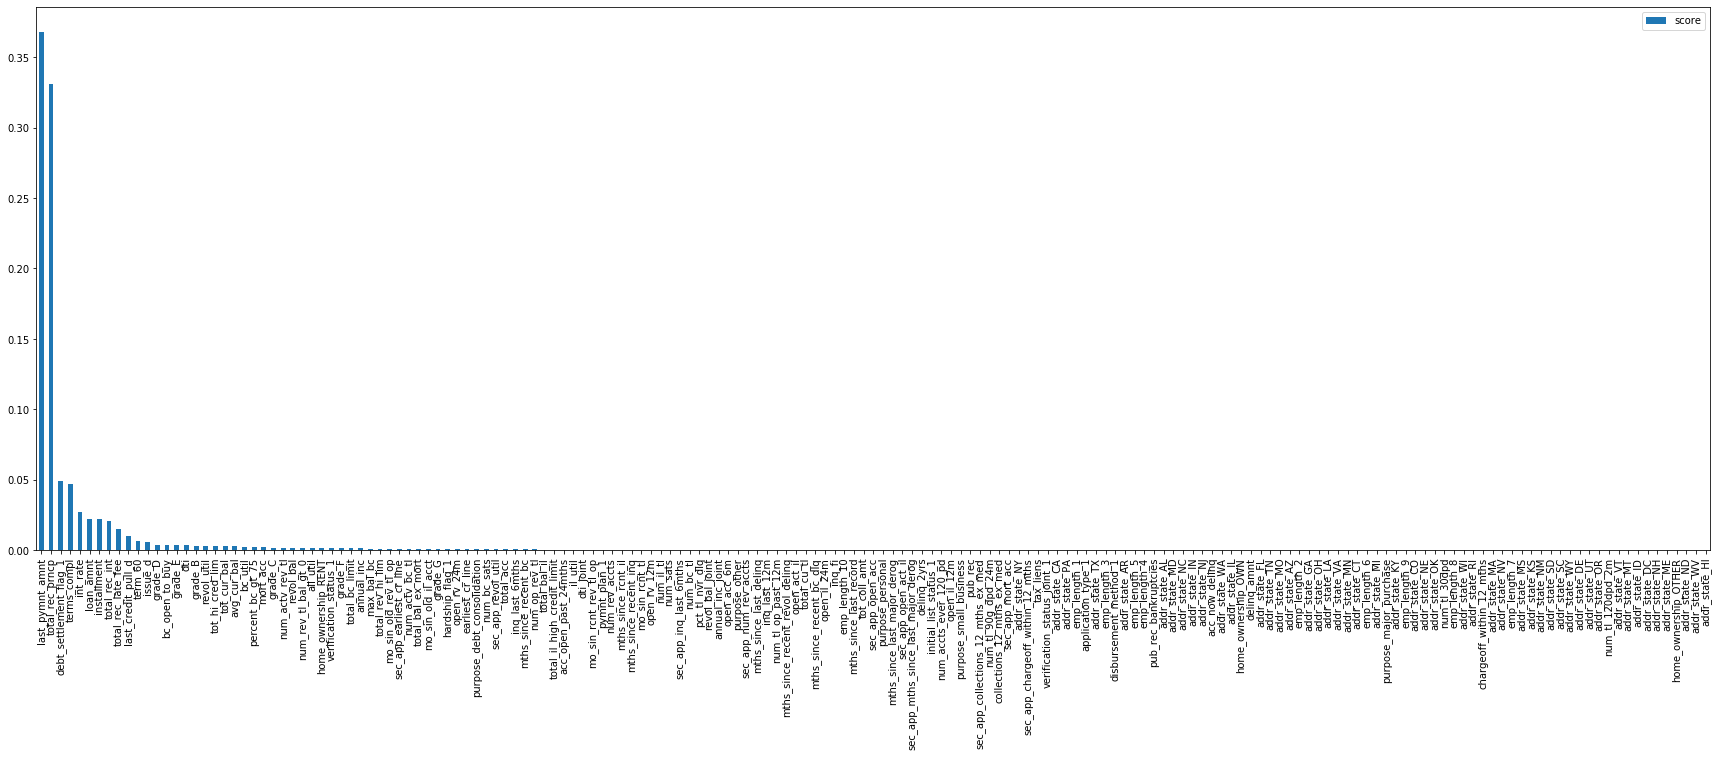

In [160]:
df_feature_imp = pd.DataFrame(rfc.feature_importances_, index=X_train.columns, columns=['score'])
df_feature_imp.sort_values('score', ascending=False).plot.bar(figsize=(30, 10))

# Outlier Treatments

In [22]:
import scipy.stats as st
zd1train=np.abs(st.zscore(d1train))

In [24]:
zd1traindf=pd.DataFrame(zd1train,columns=d1train.columns)

In [27]:
zd1traindfremoved=zd1traindf[zd1traindf<3]

In [29]:
zd1traindfremoved.fillna(0,inplace=True)

In [35]:
num = zd1traindfremoved[['loan_amnt' ,'funded_amnt_inv', 'installment', 'annual_inc', 'dti', 'revol_bal', 
     'revol_util', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 
     'total_rec_late_fee', 'last_pymnt_amnt', 'tot_coll_amt', 'tot_cur_bal', 'mths_since_rcnt_il', 'total_bal_il', 
     'il_util', 'max_bal_bc', 'total_rev_hi_lim', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'delinq_amnt', 
     'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mths_since_recent_bc', 'pct_tl_nvr_dlq', 
     'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 
     'sec_app_revol_util', 'annual_inc_joint', 'dti_joint', 'revol_bal_joint']]

dis = zd1traindfremoved[['int_rate','loan_status', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc', 
     'collections_12_mths_ex_med', 'acc_now_delinq', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 
     'open_rv_12m', 'open_rv_24m', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 
     'chargeoff_within_12_mths', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 
     'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 
     'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 
     'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 
     'sec_app_open_acc', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 
     'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 'mths_since_last_delinq', 
     'mths_since_last_record', 'mths_since_last_major_derog', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq',
     'last_credit_pull_d','sec_app_earliest_cr_line','issue_d','terms_compl','earliest_cr_line']]


tar = zd1traindfremoved['loan_status']

In [56]:
num=data_need[['loan_amnt' ,'funded_amnt_inv', 'installment', 'annual_inc', 'dti', 'revol_bal', 
     'revol_util', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 
     'last_pymnt_amnt', 'tot_cur_bal', 'mths_since_rcnt_il', 'total_bal_il', 
     'il_util', 'max_bal_bc', 'total_rev_hi_lim', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'delinq_amnt', 
     'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mths_since_recent_bc', 'pct_tl_nvr_dlq', 
     'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 
     'sec_app_revol_util', 'annual_inc_joint', 'dti_joint', 'revol_bal_joint','delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc', 
     'collections_12_mths_ex_med', 'acc_now_delinq', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 
     'open_rv_12m', 'open_rv_24m', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 
     'chargeoff_within_12_mths', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 
     'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 
     'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 
     'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 
     'sec_app_open_acc', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 
     'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 'mths_since_last_delinq', 
     'mths_since_last_record', 'mths_since_last_major_derog', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq',
     'last_credit_pull_d','sec_app_earliest_cr_line','earliest_cr_line','int_rate']]

In [64]:
num=num.select_dtypes(exclude=object)

In [65]:
num.shape

(443579, 90)

C:\Users\Arun\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\Users\Arun\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\Arun\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\Arun\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\Arun\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],
C:\Users\Arun\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\Users\Arun\Anaconda3\lib\site-packages\matplo

C:\Users\Arun\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\Arun\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\Arun\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\Arun\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],
C:\Users\Arun\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\Users\Arun\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\Arun\Anaconda3\lib\site-packages\matplotlib

C:\Users\Arun\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\Users\Arun\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\Arun\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\Arun\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\Arun\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],
C:\Users\Arun\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\Users\Arun\Anaconda3\lib\site-packages\matplo

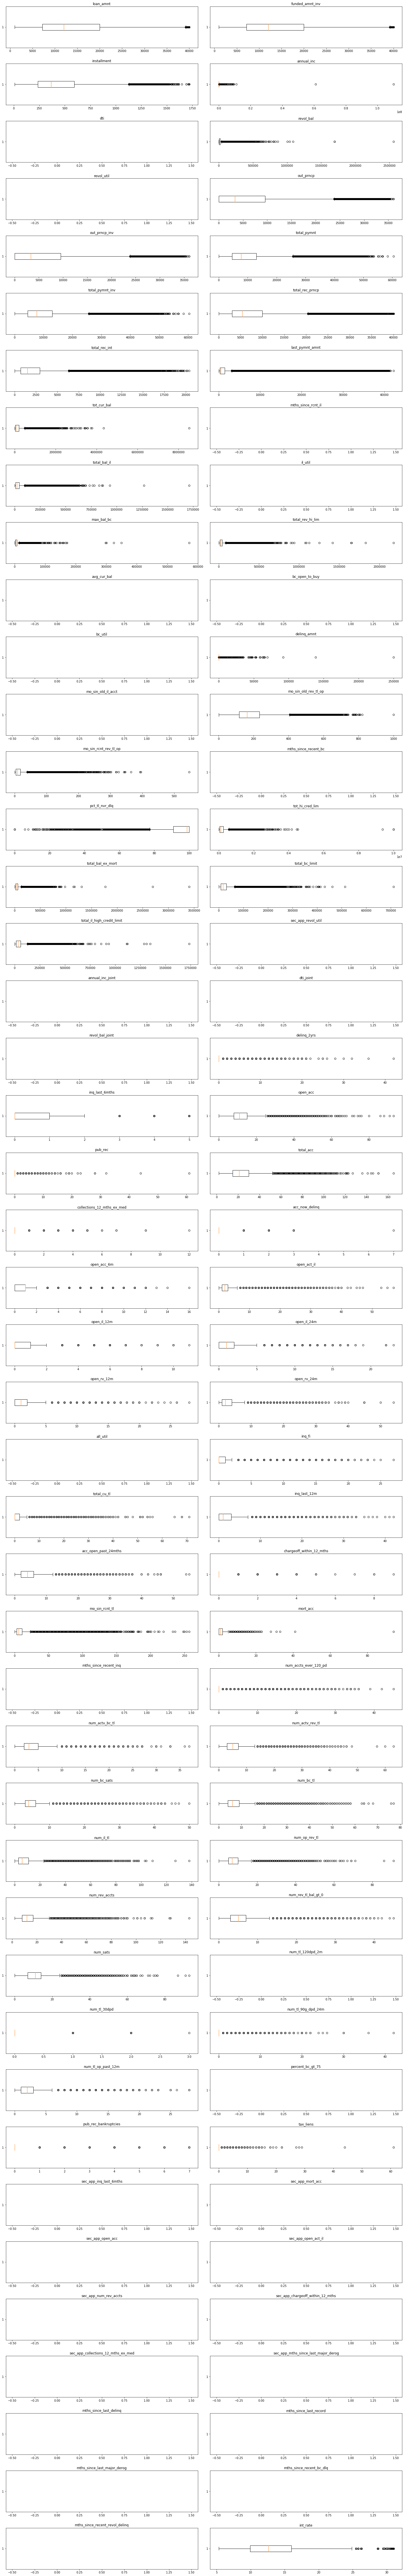

In [70]:
plt.figure(figsize=(20,180))
pno=1
for j in num.columns:    
    ax=plt.subplot(64,2,pno)
    ax.boxplot(num[j],vert=False)
    ax.set_title(j)
    pno=pno+1
plt.tight_layout()
plt.savefig('box univariate.png')

In [57]:
q1=num.quantile(0.25)
q3=num.quantile(0.75)
iqr=q3-q1
print(iqr)

loan_amnt                      12800.000000
funded_amnt_inv                12800.000000
installment                      356.900000
annual_inc                     48000.000000
dti                               12.800000
revol_bal                      14010.000000
revol_util                        37.800000
out_prncp                       9545.710000
out_prncp_inv                   9542.800000
total_pymnt                     8451.220111
total_pymnt_inv                 8450.580000
total_rec_prncp                 6963.190000
total_rec_int                   2254.465000
total_rec_late_fee                 0.000000
last_pymnt_amnt                 1135.225000
tot_coll_amt                       0.000000
tot_cur_bal                   189766.000000
mths_since_rcnt_il                17.000000
total_bal_il                   37256.000000
il_util                           38.000000
max_bal_bc                      5236.000000
total_rev_hi_lim               29600.000000
avg_cur_bal                    1

In [58]:
iqrd1num=num[(((num>(q1-(1.5*iqr)))&(num<(q3+(1.5*iqr)))))]

In [60]:
iqrd1num.isna().sum()

loan_amnt                       9805
funded_amnt_inv                 9801
installment                    14757
annual_inc                     22975
dti                             6754
revol_bal                      28243
revol_util                        22
out_prncp                      14852
out_prncp_inv                  14874
total_pymnt                    24250
total_pymnt_inv                24230
total_rec_prncp                27927
total_rec_int                  22664
total_rec_late_fee            443579
last_pymnt_amnt                97596
tot_coll_amt                  443579
tot_cur_bal                    15662
mths_since_rcnt_il             36491
total_bal_il                   28177
il_util                         1183
max_bal_bc                     25073
total_rev_hi_lim               25496
avg_cur_bal                    24009
bc_open_to_buy                 34832
bc_util                            9
delinq_amnt                   443579
mo_sin_old_il_acct              9050
m

In [54]:
iqrd1train=iqrd1train.dropna(how='any',axis=1)

In [55]:
iqrd1train

issue_d  percent_bc_gt_75  terms_compl  term_60  grade_B  grade_C  \
0             3              50.0         13.0        1        0        1   
7             3              16.7         12.0        0        0        1   
8             3              75.0          3.0        0        0        1   
9             3               0.0          9.0        0        0        0   
11            3              33.3         17.0        0        0        0   
...         ...               ...          ...      ...      ...      ...   
443566       10              50.0         10.0        1        0        0   
443567       10               0.0          6.0        1        0        0   
443569       10               0.0          5.0        1        0        1   
443572       10              50.0         16.0        1        0        0   
443575       10              50.0         10.0        1        0        0   

        emp_length_10  home_ownership_RENT  verification_status_1  \
0                   1                    0                      1   
7                   0                    1                      1   
8                   1                    1                      1   
9                   1                    0                      1   
11                  0                    0                      1   
...               ...                  ...                    ...   
443566              1                    0                      0   
443567              1                    0                      0   
443569              0                    1                      0   
443572              0                    0                      0   
443575              0                    0                      1   

        purpose_debt_consolidation  initial_list_status_1  
0                                1                      0  
7                                1                      0  
8                                1                      1  
9                                0                      0  
11                               1                      0  
...                            ...                    ...  
443566                           1                      0  
443567                           1                      1  
443569                           1                      0  
443572                           0                      1  
443575                           1                      0  

[171815 rows x 11 columns]

In [63]:
mean=d1train.mean()
sd=d1train.std()

In [65]:
d1train[d1train<(mean+(3*sd))].dropna(how='any',axis=0)

loan_amnt  funded_amnt_inv  int_rate  installment  annual_inc  \
8            5000           5000.0     14.99       173.31     68000.0   
63          14000          14000.0      5.32       421.61     89000.0   
132          6000           6000.0     12.74       201.42     63000.0   
192         12000          12000.0     11.49       395.66     58356.0   
404         10000           9750.0      5.32       301.15     58000.0   
...           ...              ...       ...          ...         ...   
443067       5000           5000.0     13.59       169.90     70000.0   
443129      20000          20000.0     10.42       649.30    120000.0   
443274      10000          10000.0     10.91       326.97     51000.0   
443407       7200           7200.0     15.05       249.77     40000.0   
443411      15000          14950.0     19.03       550.07     82100.0   

        issue_d  loan_status    dti  delinq_2yrs  earliest_cr_line  ...  \
8             3            0  22.50          0.0             167.0  ...   
63            3            0  12.07          0.0             171.0  ...   
132           3            0  21.71          0.0             187.0  ...   
192           3            1  29.02          0.0             250.0  ...   
404           3            0  27.66          0.0             130.0  ...   
...         ...          ...    ...          ...               ...  ...   
443067       10            0   9.04          1.0             274.0  ...   
443129       10            0   4.06          0.0             162.0  ...   
443274       10            0   7.11          0.0             215.0  ...   
443407       10            0  22.26          0.0             401.0  ...   
443411       10            0  13.01          0.0             172.0  ...   

        addr_state_WA  addr_state_WI  addr_state_WV  addr_state_WY  \
8                 0.0            0.0            0.0            0.0   
63                0.0            0.0            0.0            0.0   
132               0.0            0.0            0.0            0.0   
192               0.0            0.0            0.0            0.0   
404               0.0            0.0            0.0            0.0   
...               ...            ...            ...            ...   
443067            0.0            0.0            0.0            0.0   
443129            0.0            0.0            0.0            0.0   
443274            0.0            0.0            0.0            0.0   
443407            0.0            0.0            0.0            0.0   
443411            0.0            0.0            0.0            0.0   

        initial_list_status_1  application_type_1  hardship_flag_1  \
8                           1                 0.0              0.0   
63                          0                 0.0              0.0   
132                         1                 0.0              0.0   
192                         0                 0.0              0.0   
404                         1                 0.0              0.0   
...                       ...                 ...              ...   
443067                      0                 0.0              0.0   
443129                      0                 0.0              0.0   
443274                      1                 0.0              0.0   
443407                      1                 0.0              0.0   
443411                      1                 0.0              0.0   

        disbursement_method_1  debt_settlement_flag_1  \
8                         0.0                     0.0   
63                        0.0                     0.0   
132                       0.0                     0.0   
192                       0.0                     0.0   
404                       0.0                     0.0   
...                       ...                     ...   
443067                    0.0                     0.0   
443129                    0.0                     0.0   
443274                    0.0      

# Transformation

In [71]:
lognum=np.log(num)

C:\Users\Arun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
C:\Users\Arun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


In [70]:
lognumvalue=lognum.replace({-np.inf:0,np.inf:0})

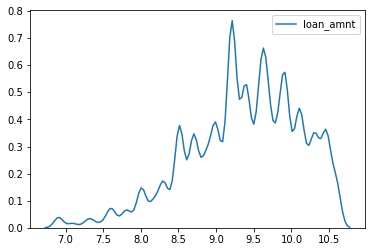

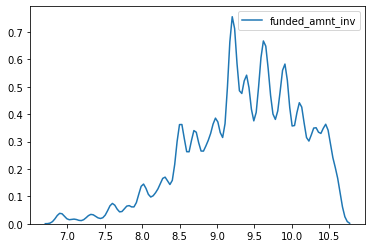

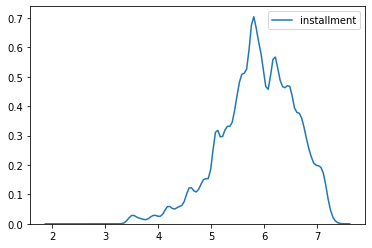

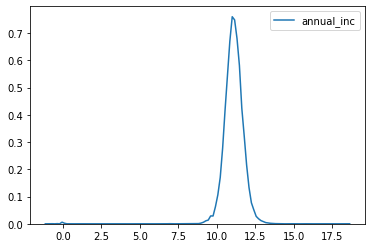

C:\Users\Arun\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Arun\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


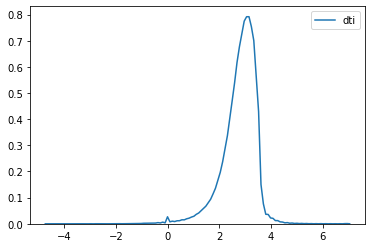

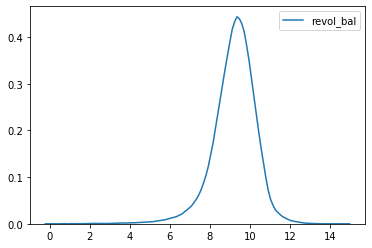

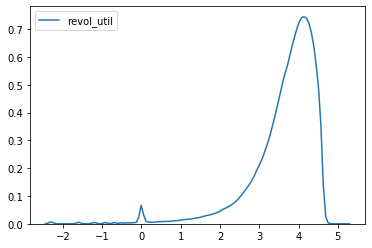

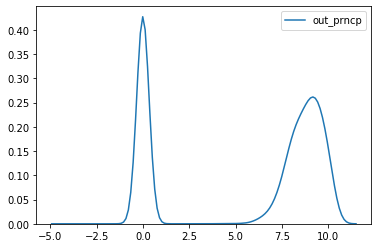

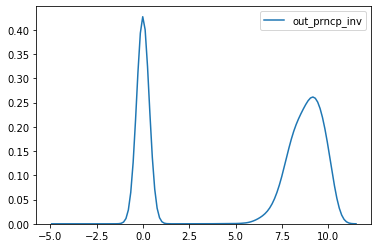

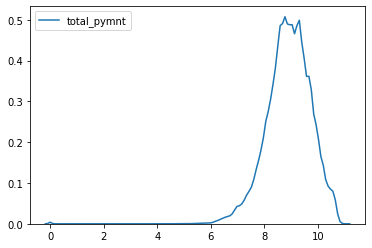

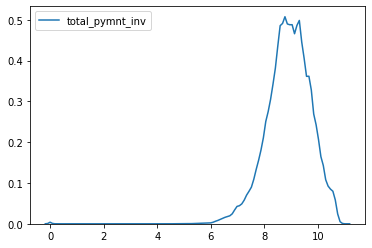

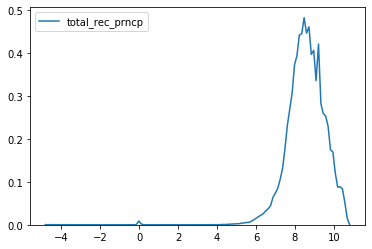

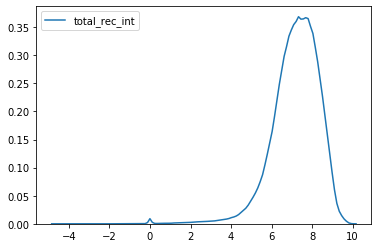

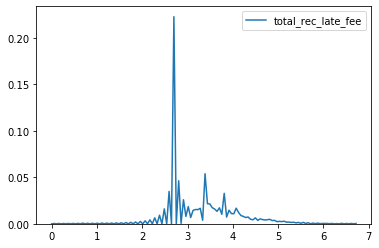

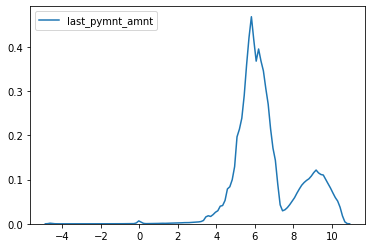

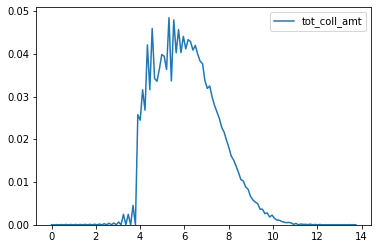

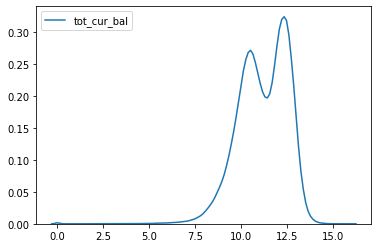

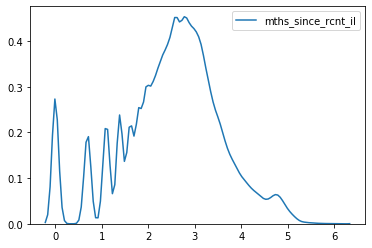

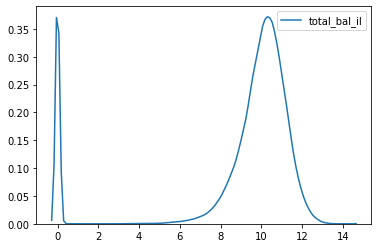

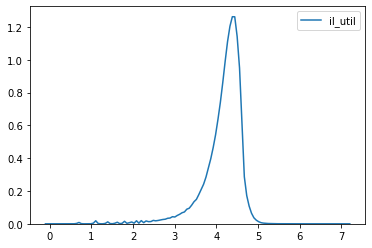

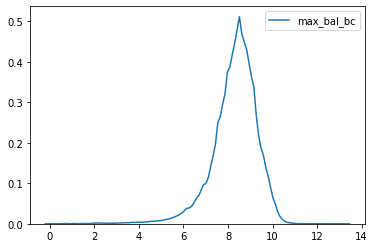

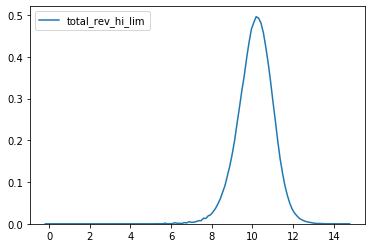

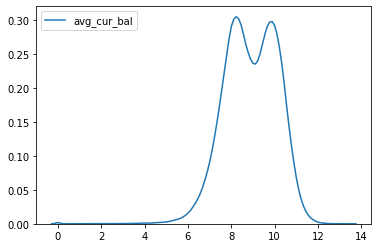

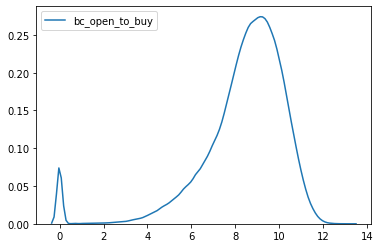

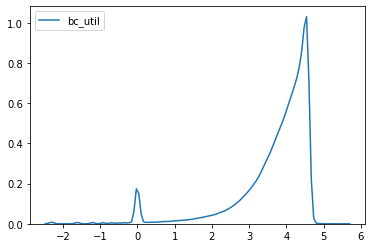

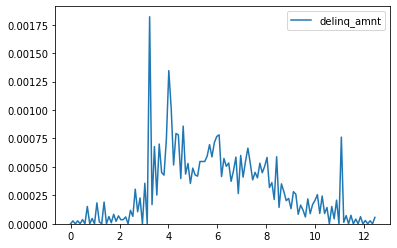

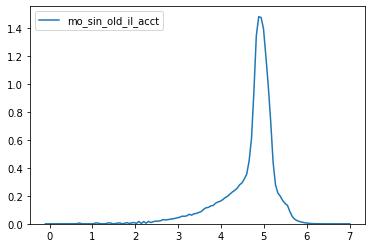

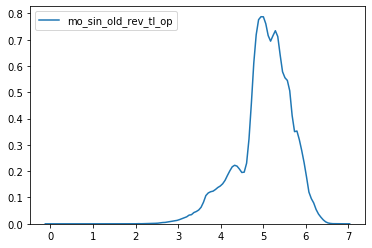

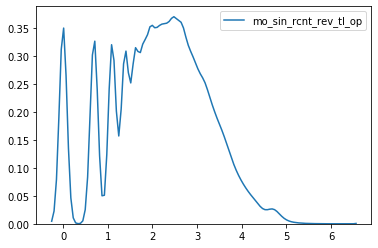

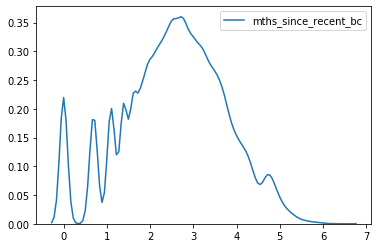

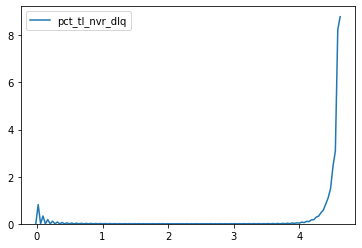

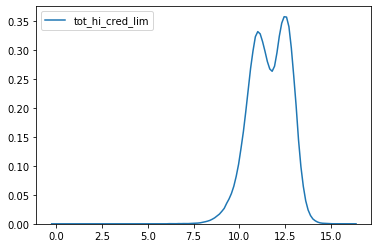

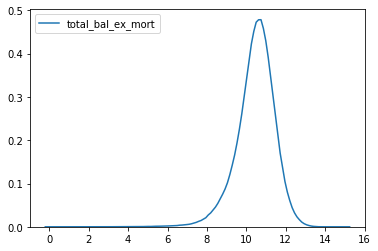

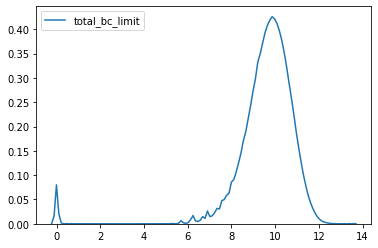

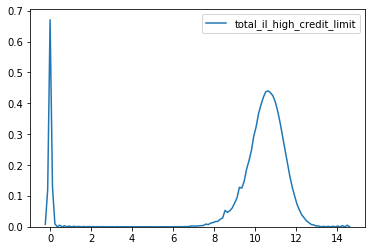

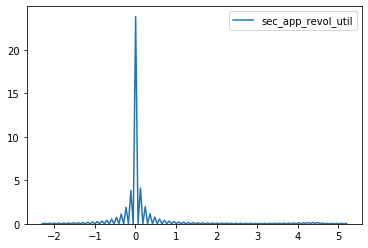

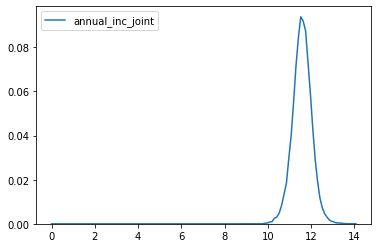

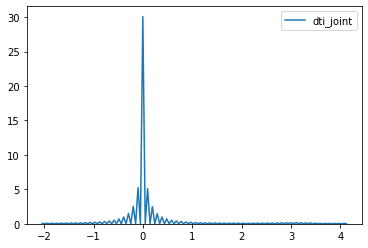

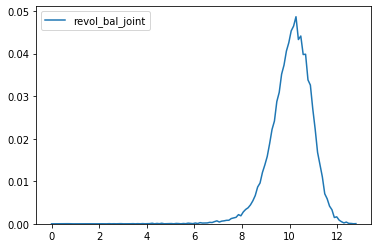

In [72]:
for i in lognumvalue.columns:
    sns.kdeplot(lognumvalue[i])
    plt.show()

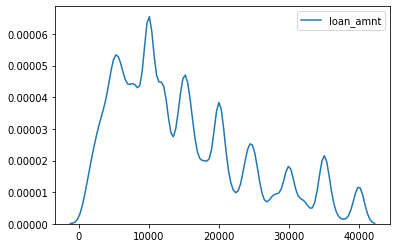

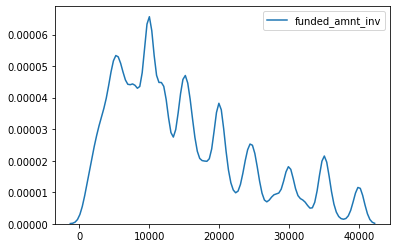

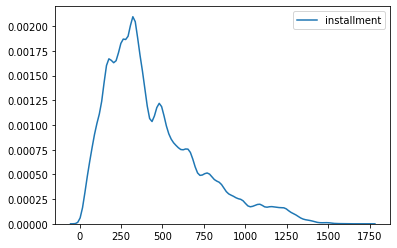

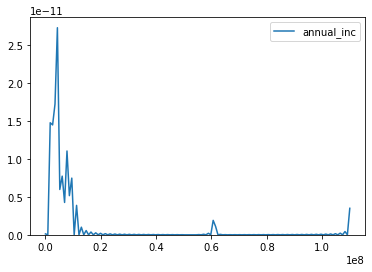

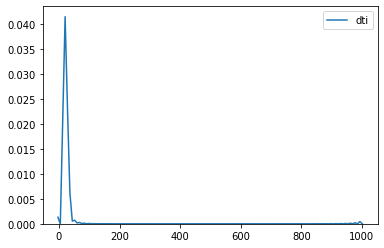

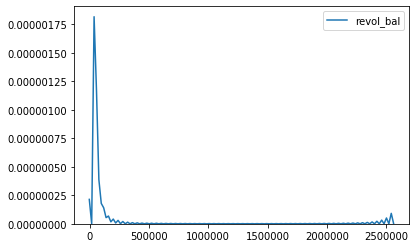

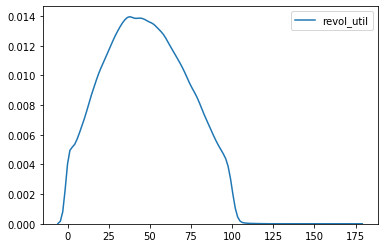

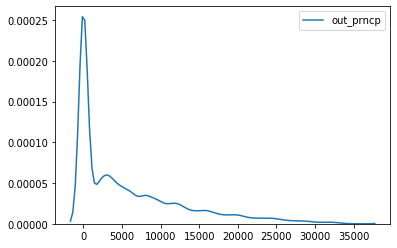

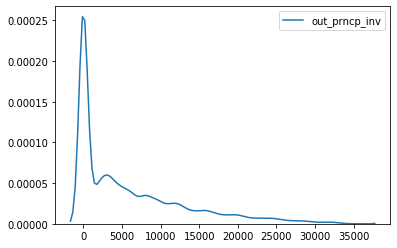

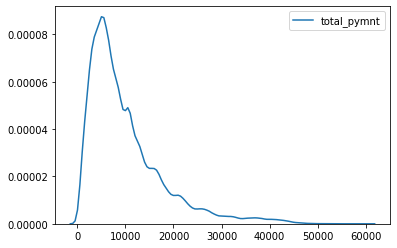

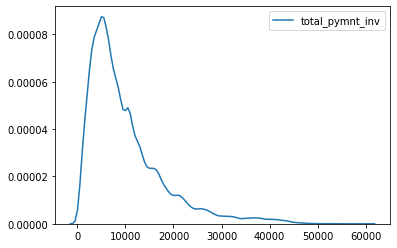

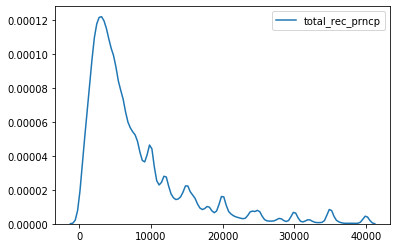

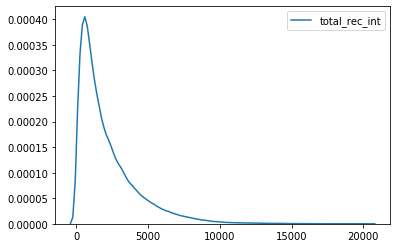

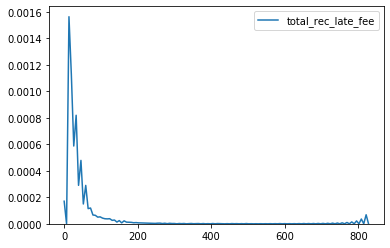

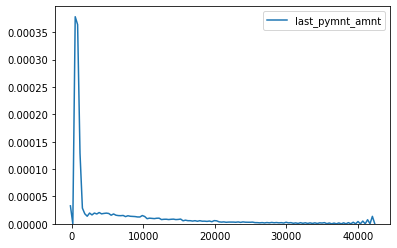

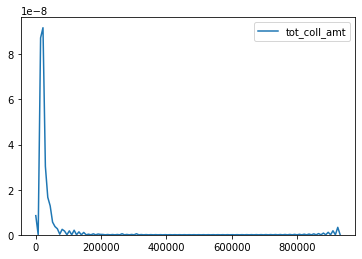

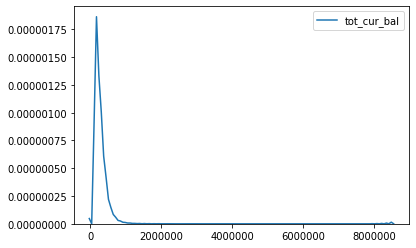

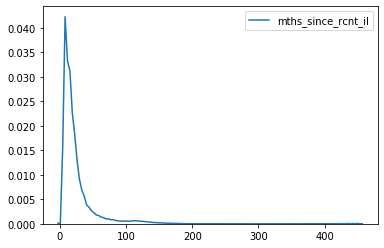

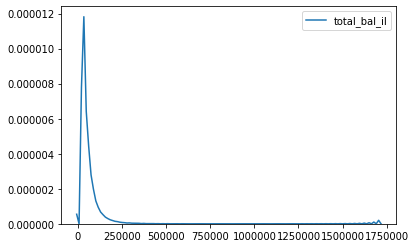

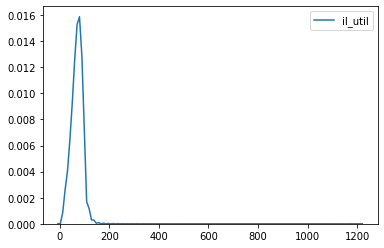

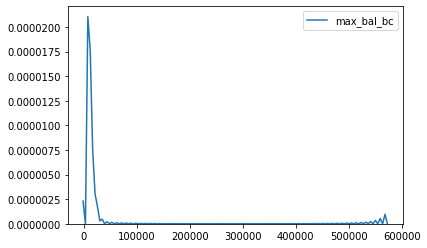

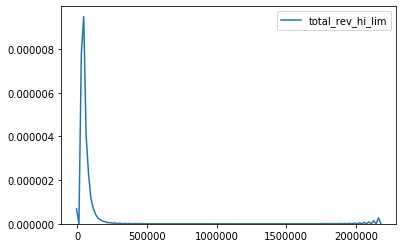

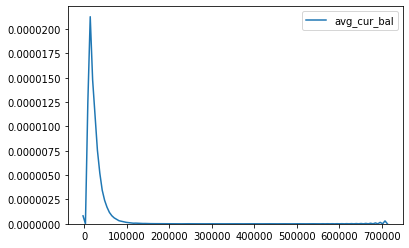

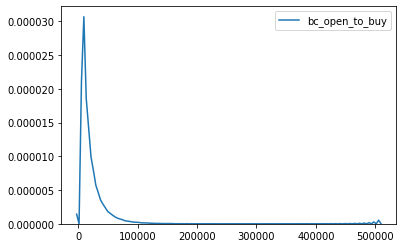

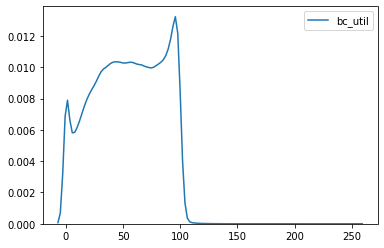

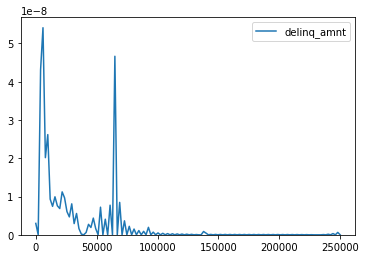

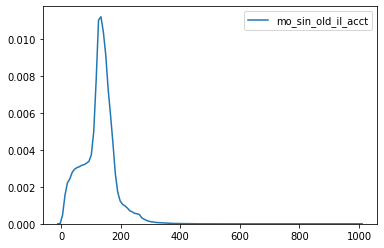

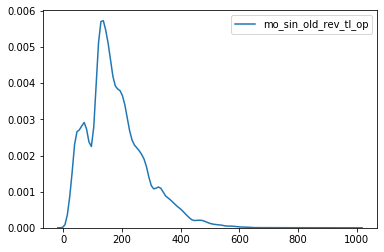

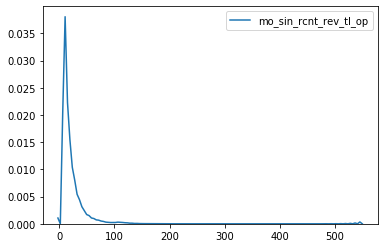

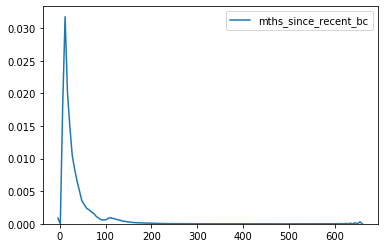

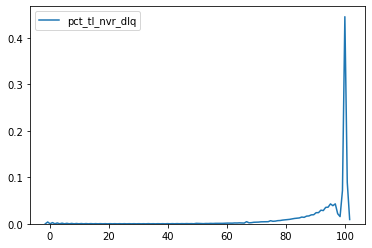

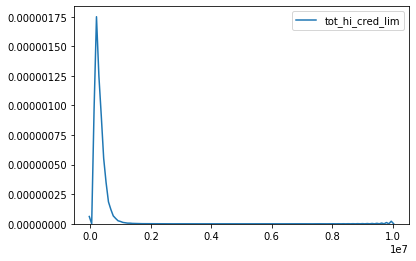

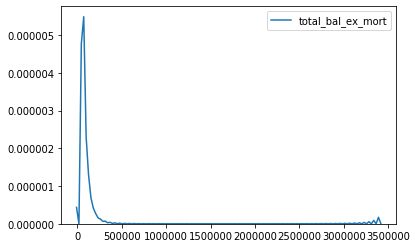

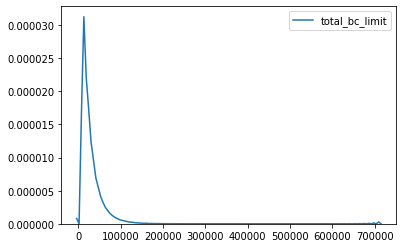

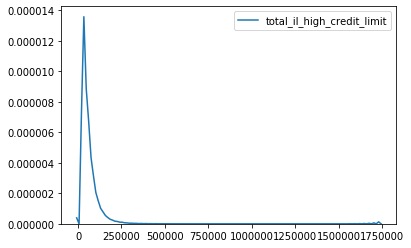

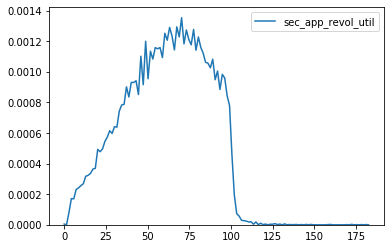

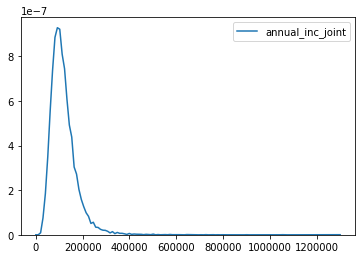

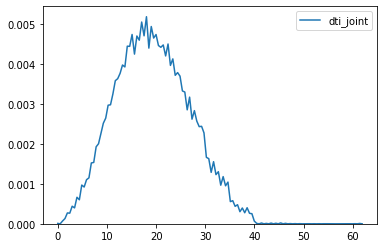

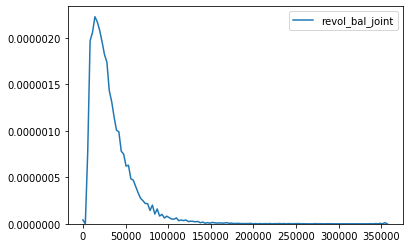

In [73]:
for i in num.columns:
    sns.kdeplot(num[i])
    plt.show()

In [74]:
from sklearn.preprocessing import power_transform

In [76]:
d1trainbox=power_transform(d1train,method='yeo-johnson')

In [78]:
d1trainbox=pd.DataFrame(d1trainbox,columns=d1train.columns)

In [79]:
d1trainbox

loan_amnt  funded_amnt_inv  int_rate  installment  annual_inc  \
0        0.385327         0.385782 -0.068145    -0.061588    1.168989   
1        0.736189         0.736679 -0.068145     0.901814    1.243754   
2       -1.103701        -1.103458  0.348979    -1.020998   -0.022420   
3       -1.437361        -1.437181 -1.409442    -1.506960    1.012463   
4       -0.260611        -0.260235 -1.493582    -0.259330   -0.530946   
...           ...              ...       ...          ...         ...   
171810   0.567559         0.568033  2.195511     0.685901    0.193122   
171811   0.563179         0.563653  2.154738     0.666565   -0.414177   
171812   0.288205         0.288649  0.519938    -0.049691    0.368790   
171813   0.816125         0.816623  2.219834     0.952169    0.472130   
171814  -0.033294        -0.032888  1.752366    -0.077190   -1.303228   

         issue_d  loan_status       dti  delinq_2yrs  earliest_cr_line  ...  \
0      -0.923468    -0.518363 -1.057660    -0.492300          0.821785  ...   
1      -0.923468     1.929150 -0.465297     2.010608         -0.523849  ...   
2      -0.923468    -0.518363  0.514756    -0.492300         -0.153296  ...   
3      -0.923468    -0.518363  0.202939    -0.492300          1.122454  ...   
4      -0.923468    -0.518363  1.040179    -0.492300         -0.031890  ...   
...          ...          ...       ...          ...               ...  ...   
171810  1.106939     1.929150 -1.089909    -0.492300         -0.280081  ...   
171811  1.106939    -0.518363  1.275756    -0.492300          0.251273  ...   
171812  1.106939    -0.518363 -0.221951    -0.492300          0.218683  ...   
171813  1.106939    -0.518363  0.818597     2.010608         -0.306135  ...   
171814  1.106939    -0.518363  0.237693     2.074327         -0.055766  ...   

        addr_state_WA  addr_state_WI  addr_state_WV  addr_state_WY  \
0           -0.148517      -0.117556      -0.023644      -0.042031   
1           -0.148517      -0.117556      -0.023644      -0.042031   
2           -0.148517      -0.117556      -0.023644      -0.042031   
3           -0.148517      -0.117556      -0.023644      -0.042031   
4           -0.148517      -0.117556      -0.023644      -0.042031   
...               ...            ...            ...            ...   
171810      -0.148517      -0.117556      -0.023644      -0.042031   
171811      -0.148517      -0.117556      -0.023644      -0.042031   
171812      -0.148517      -0.117556      -0.023644      -0.042031   
171813      -0.148517      -0.117556      -0.023644      -0.042031   
171814      -0.148517      -0.117556      -0.023644      -0.042031   

        initial_list_status_1  application_type_1  hardship_flag_1  \
0                   -0.583912           -0.294123        -0.051529   
1                   -0.583912           -0.294123        -0.051529   
2                    1.712587           -0.294123        -0.051529   
3                   -0.583912           -0.294123        -0.051529   
4                   -0.583912           -0.294123        -0.051529   
...                       ...                 ...              ...   
171810              -0.583912           -0.294123        -0.051529   
171811               1.712587           -0.294123        -0.051529   
171812              -0.583912           -0.294123        -0.051529   
171813               1.712587           -0.294123        -0.051529   
171814              -0.583912            3.399938        -0.051529   

        disbursement_method_1  debt_settlement_flag_1  \
0                   -0.073292               -0.153238   
1                   -0.073292               -0.153238   
2                   -0.073292               -0.153238   
3                   -0.073292               -0.153238   
4                   -0.073292               -0.153238   
...                       ...                     ...   
171810              -0.073292               -0.153238   
171811              -0.073292               

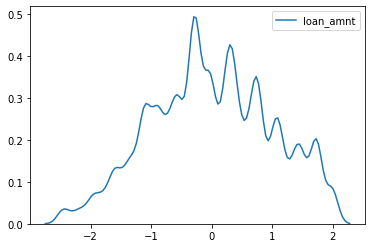

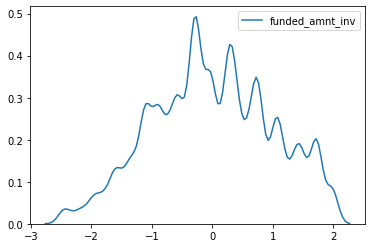

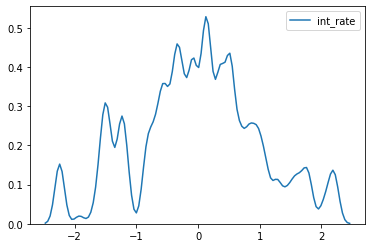

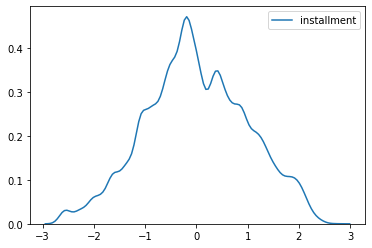

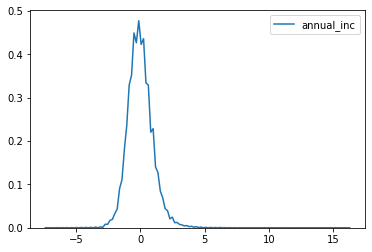

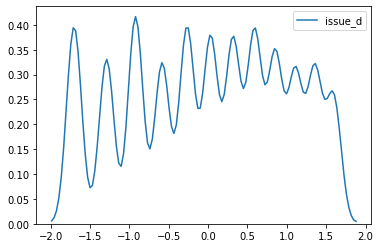

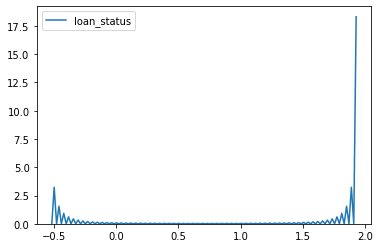

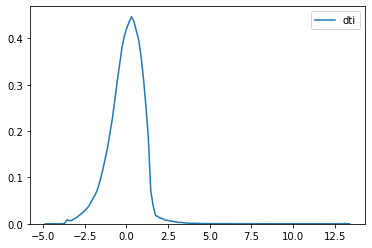

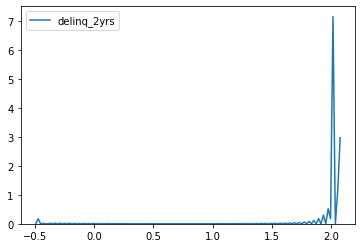

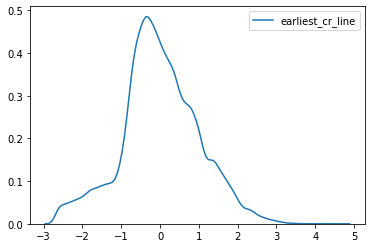

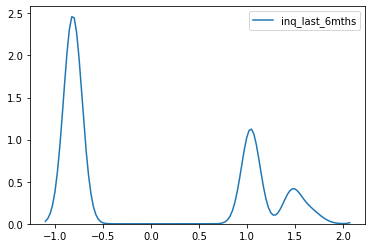

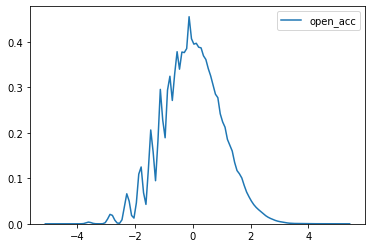

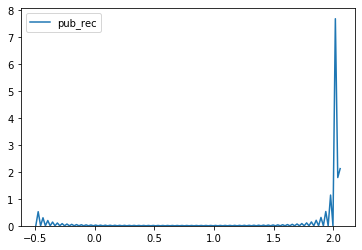

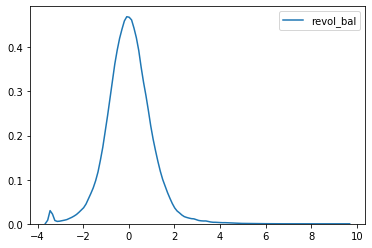

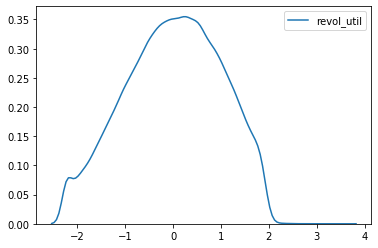

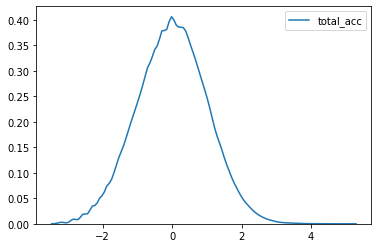

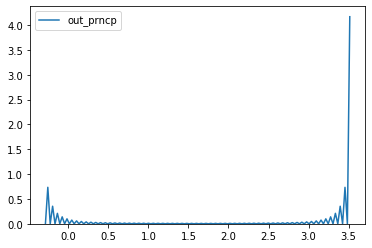

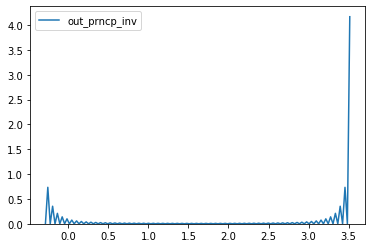

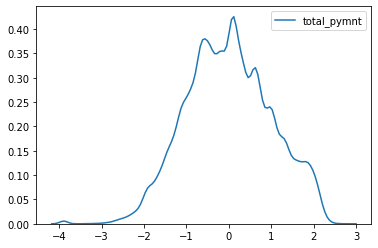

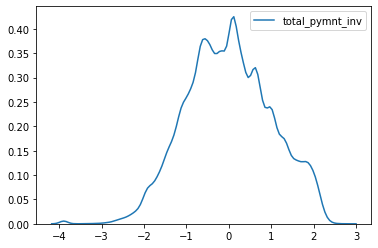

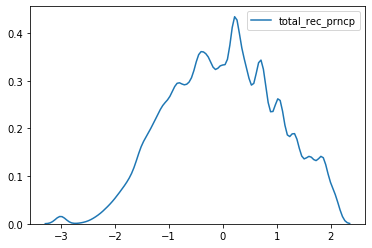

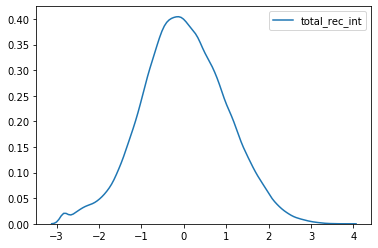

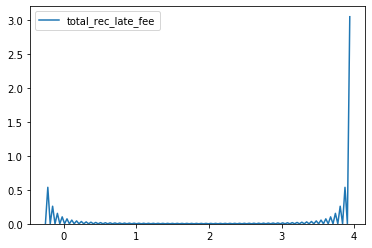

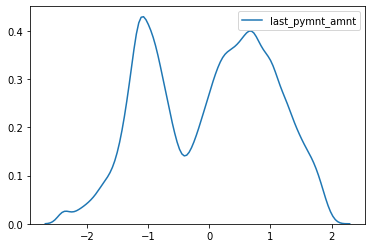

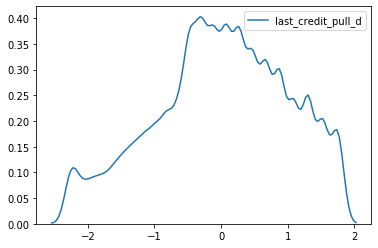

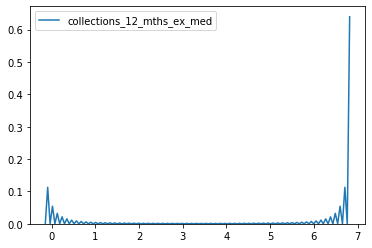

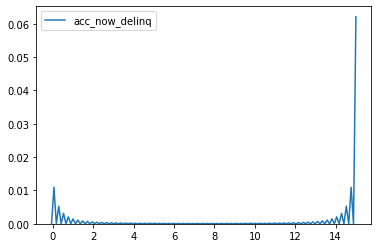

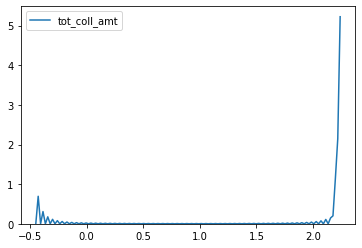

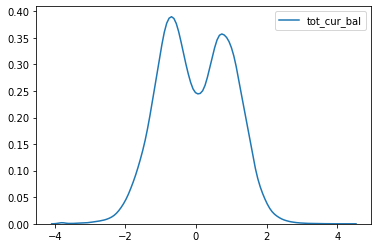

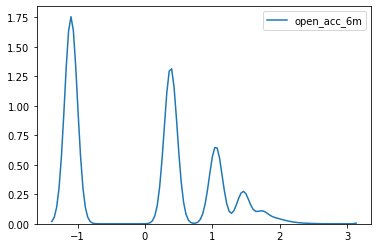

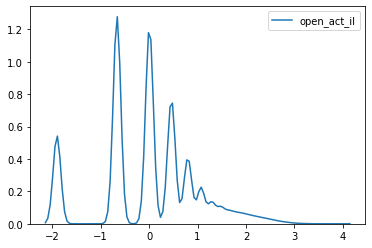

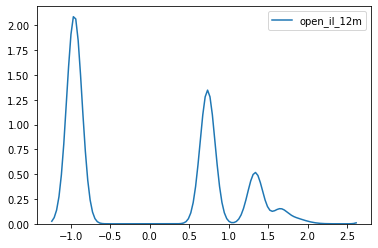

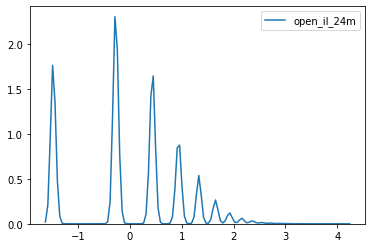

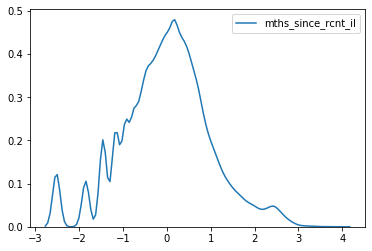

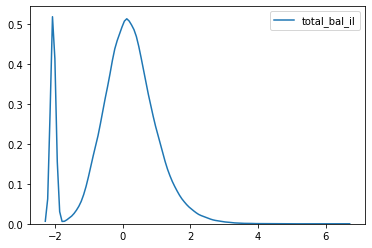

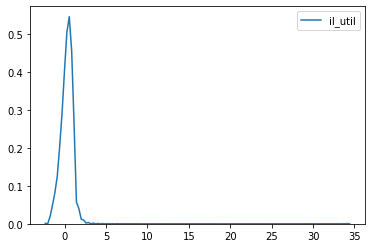

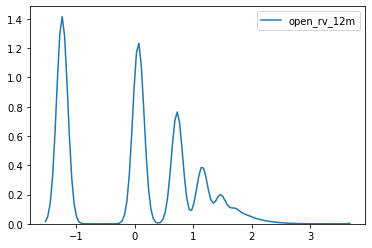

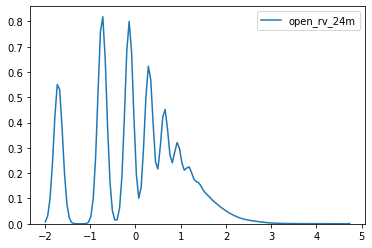

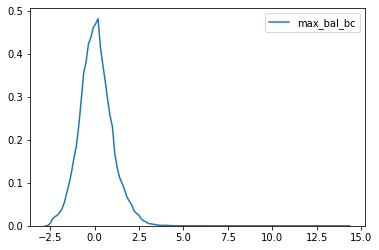

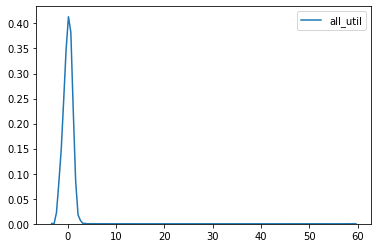

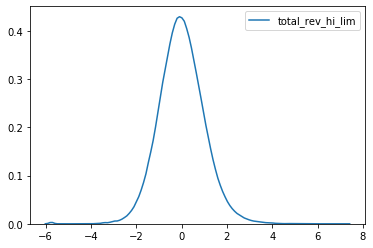

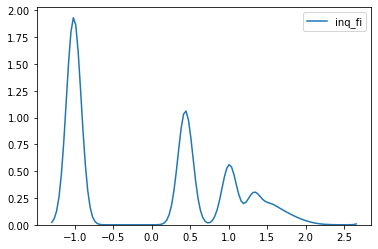

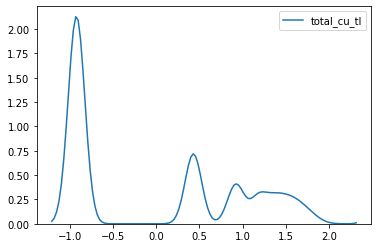

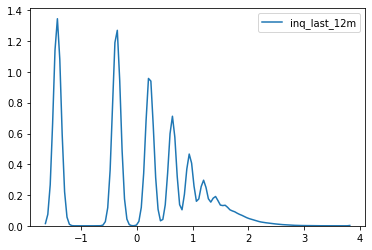

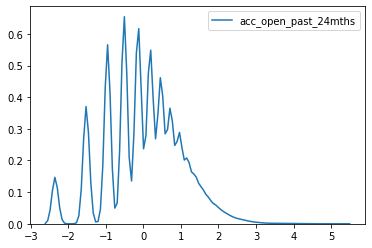

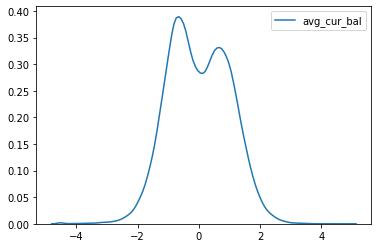

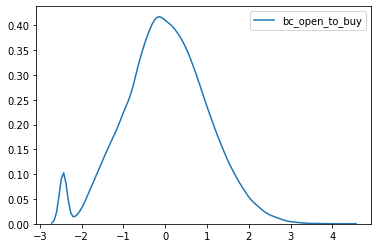

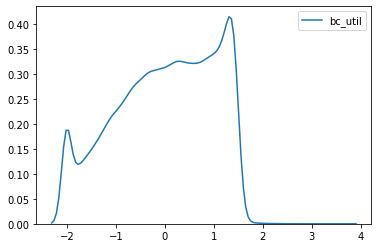

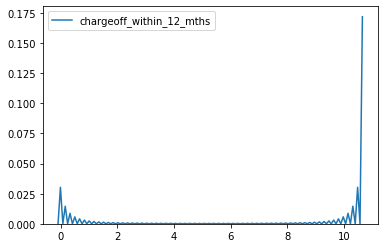

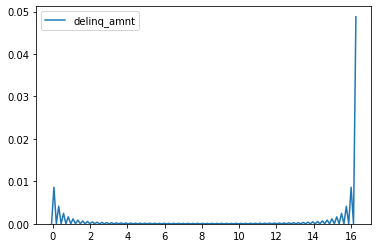

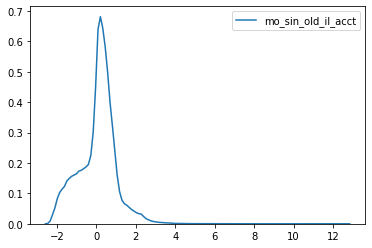

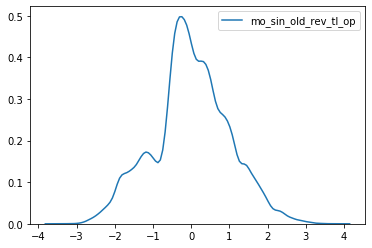

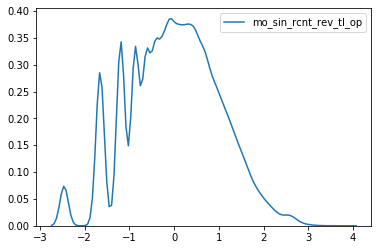

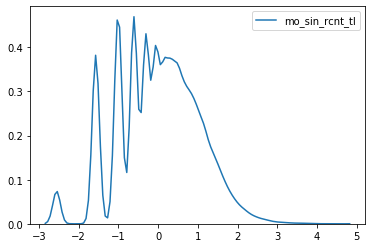

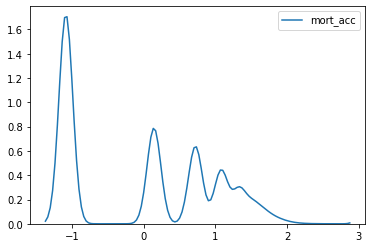

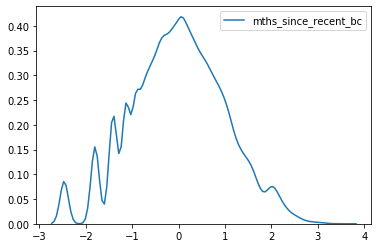

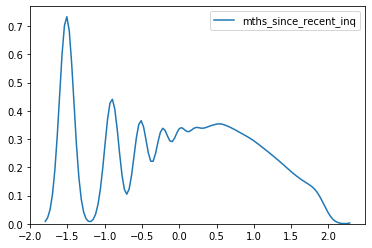

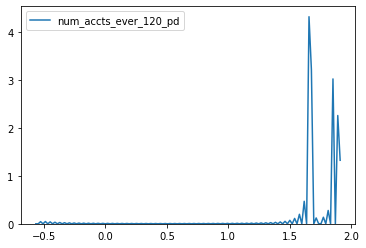

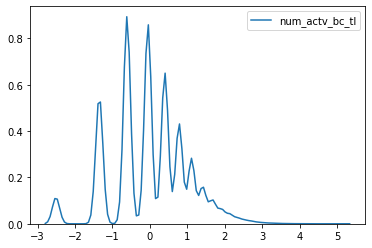

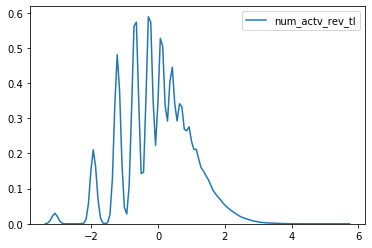

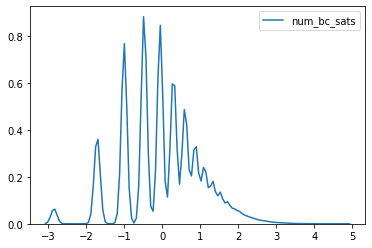

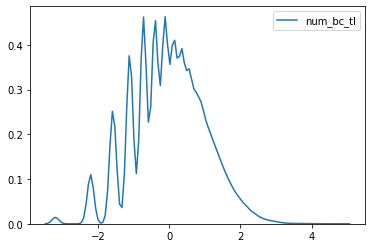

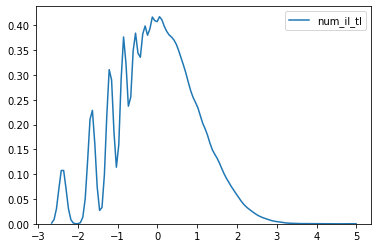

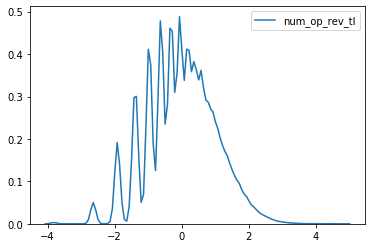

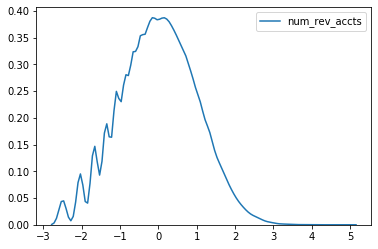

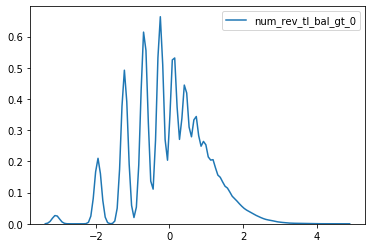

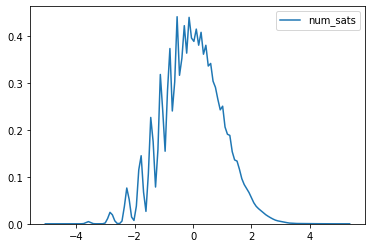

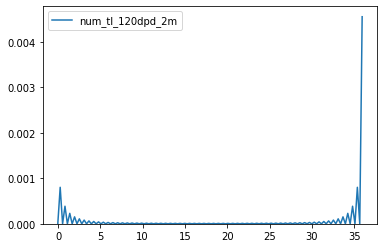

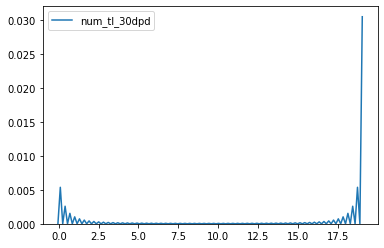

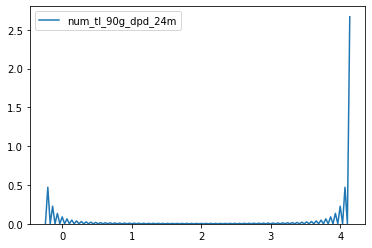

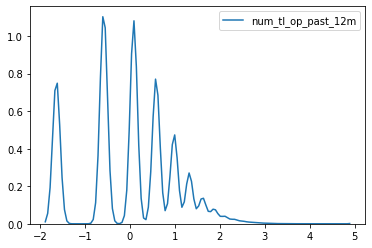

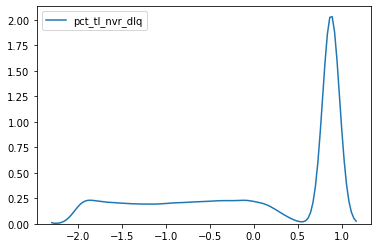

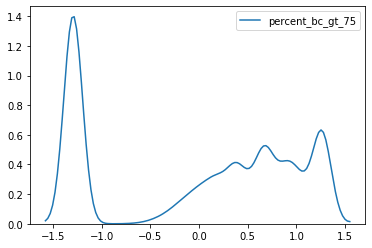

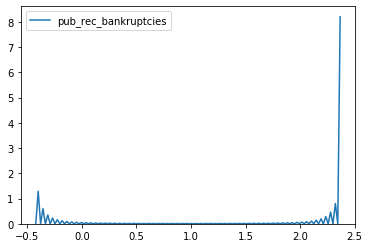

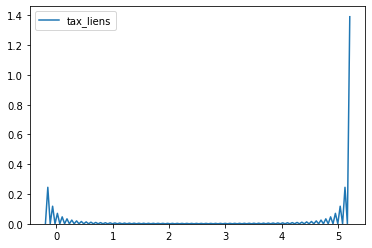

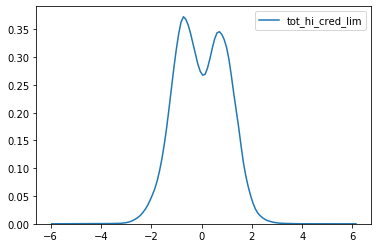

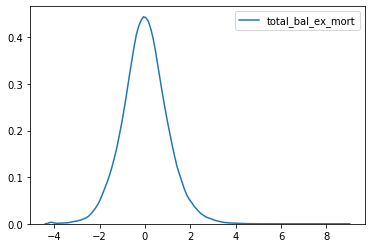

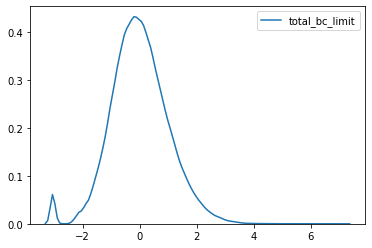

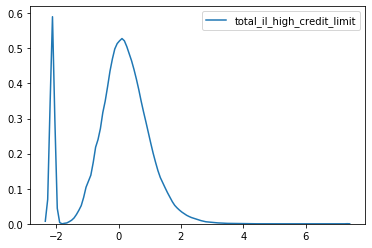

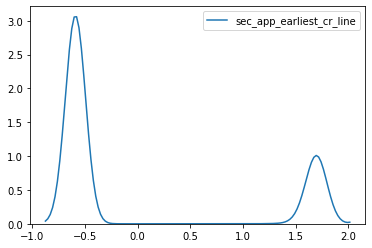

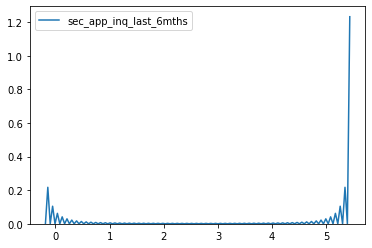

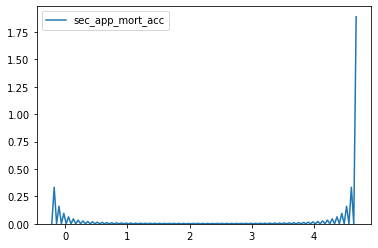

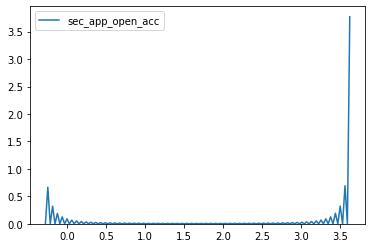

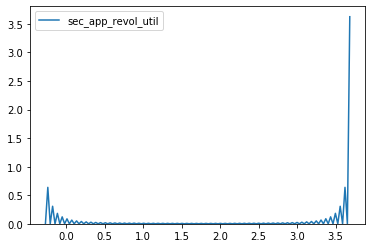

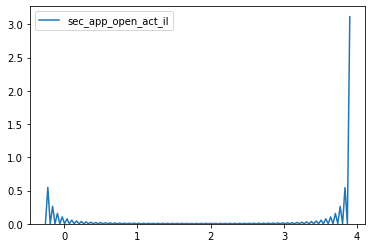

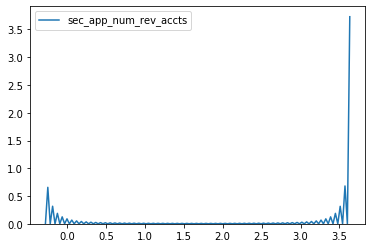

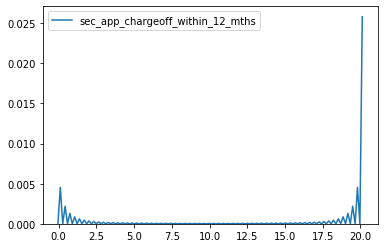

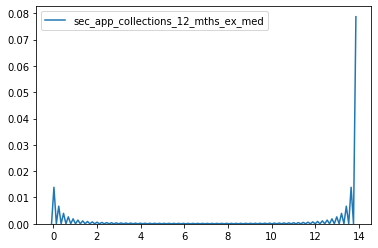

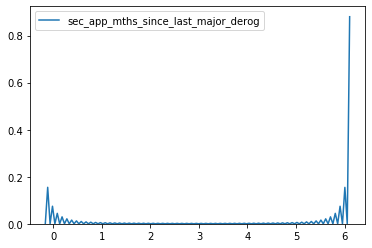

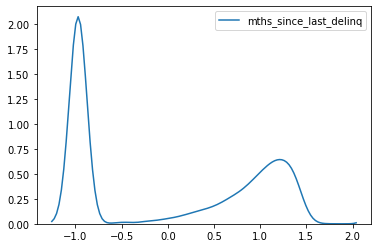

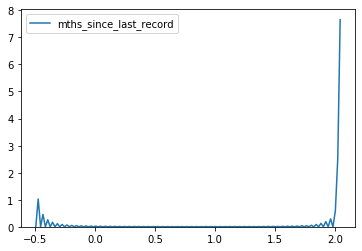

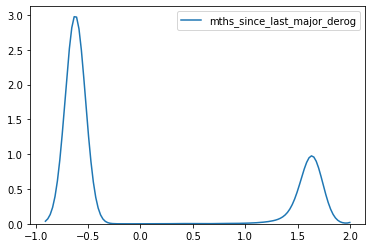

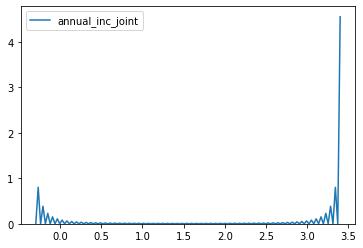

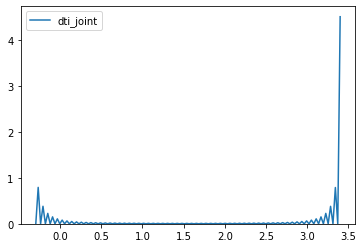

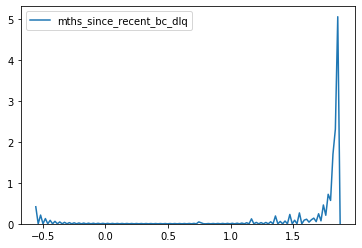

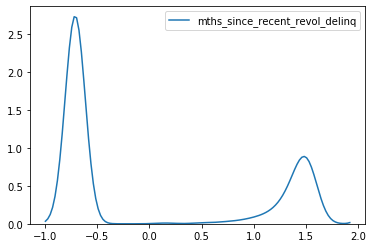

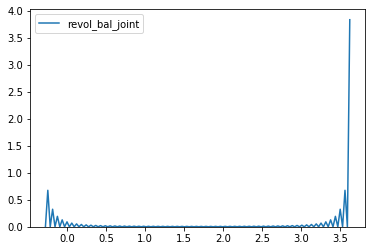

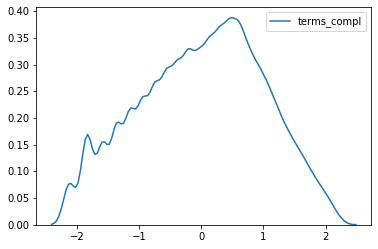

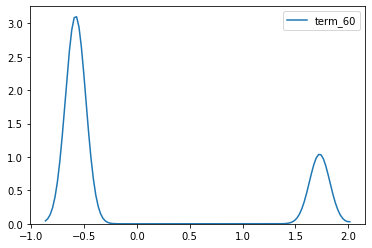

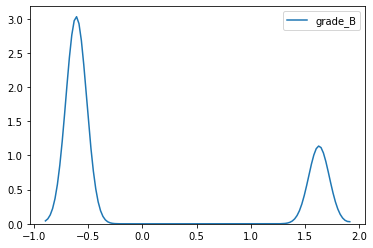

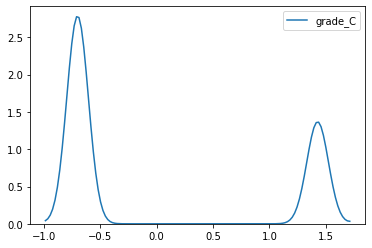

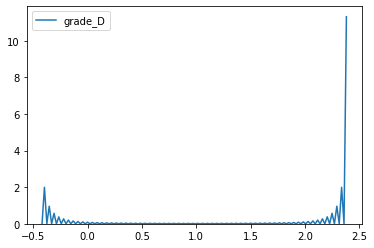

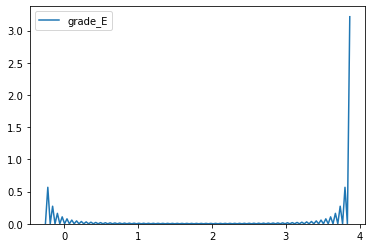

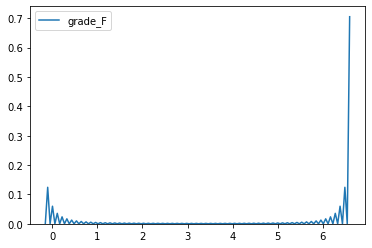

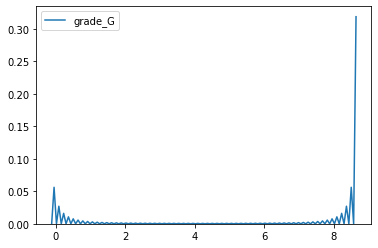

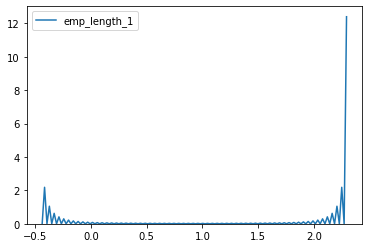

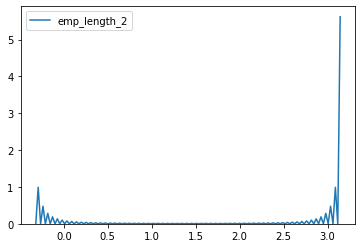

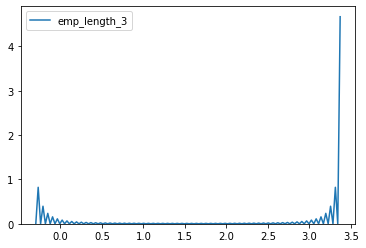

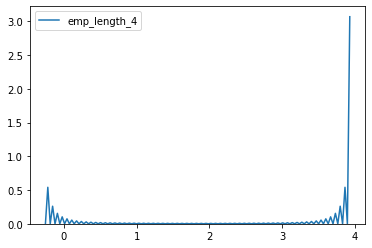

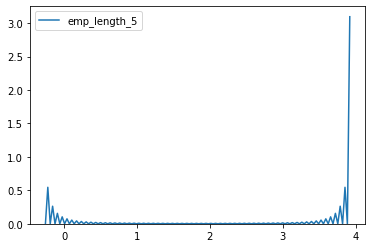

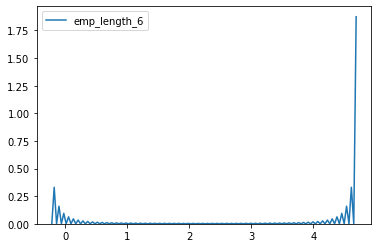

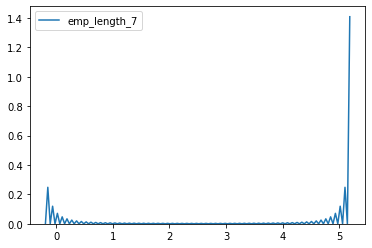

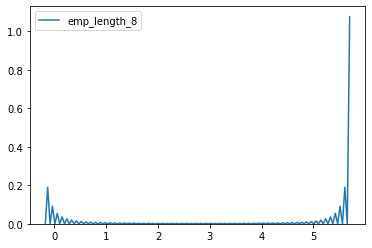

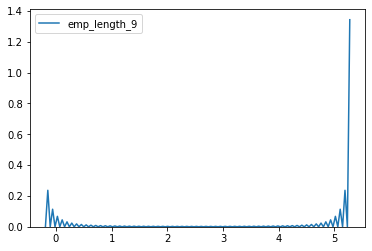

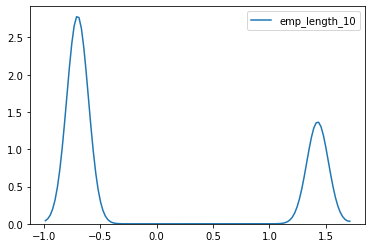

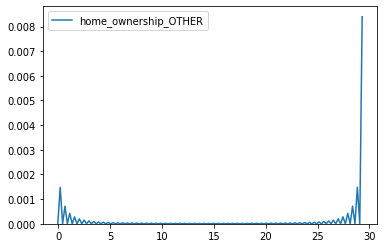

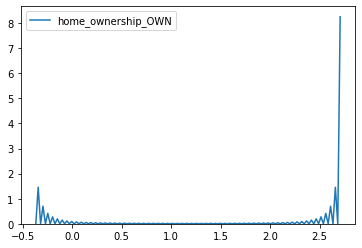

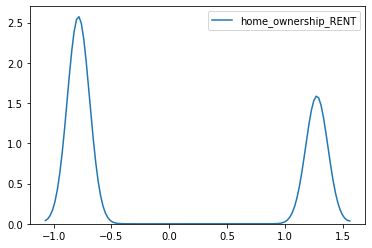

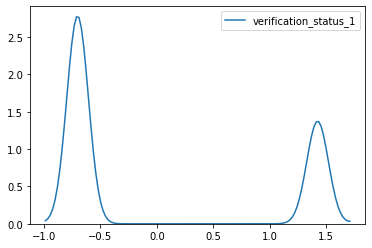

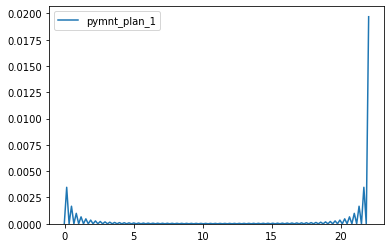

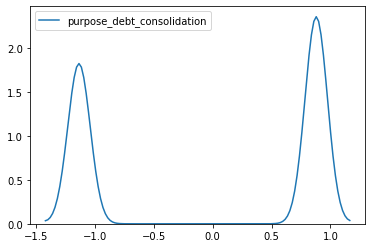

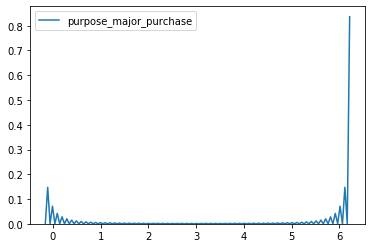

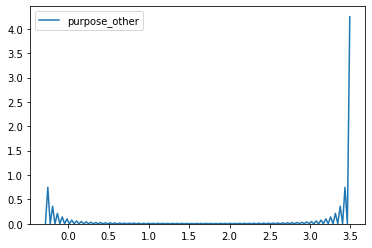

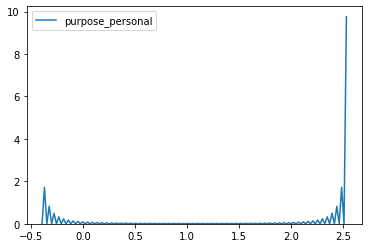

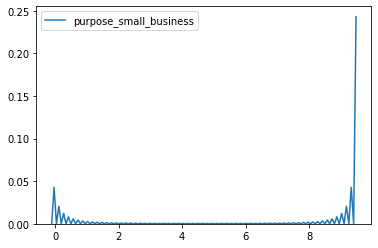

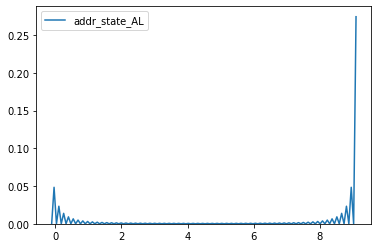

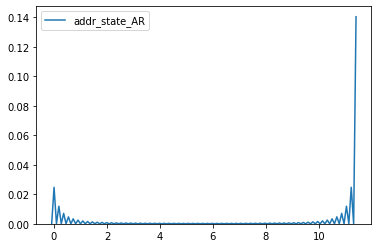

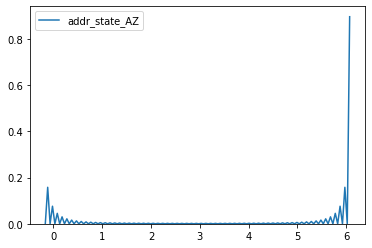

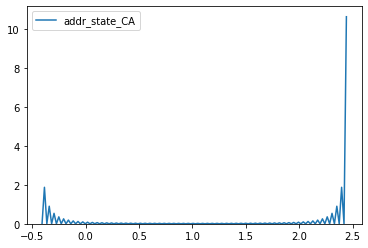

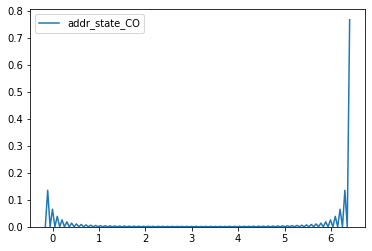

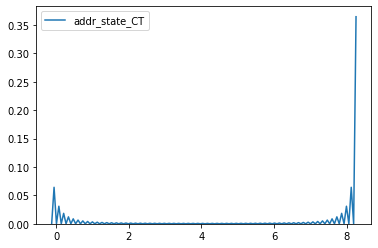

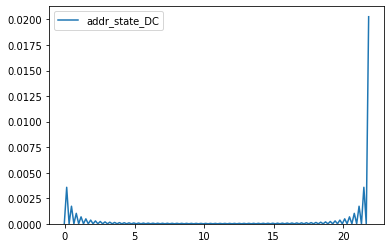

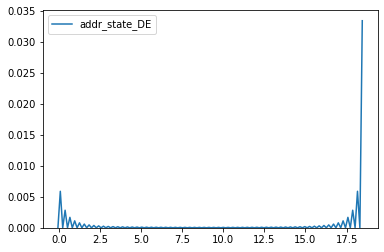

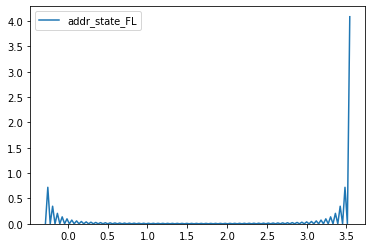

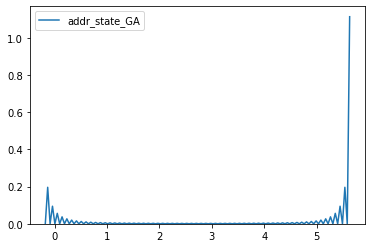

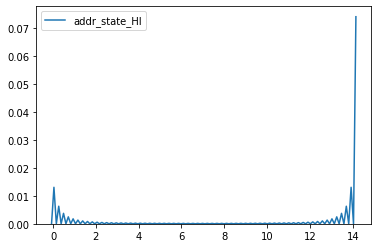

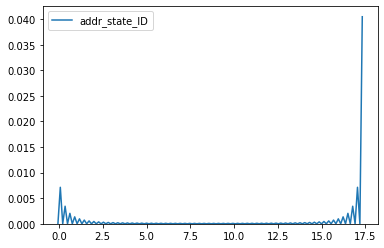

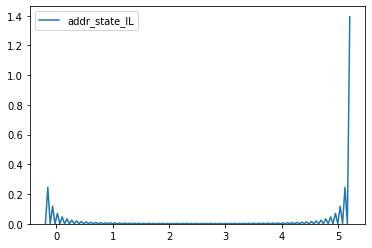

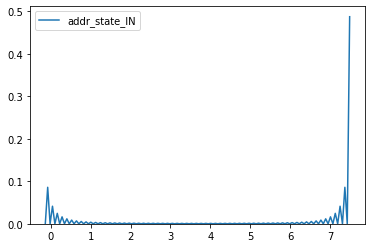

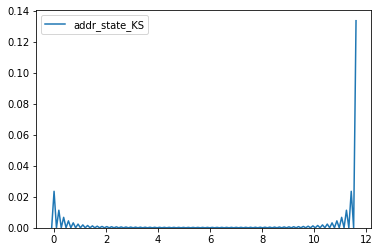

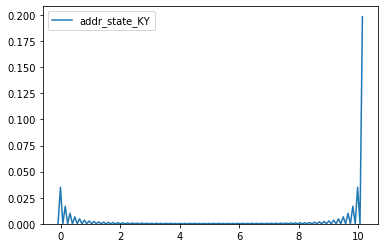

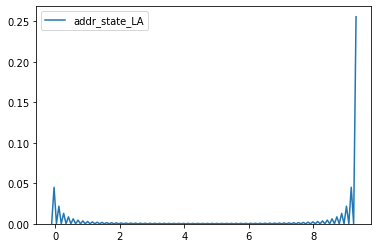

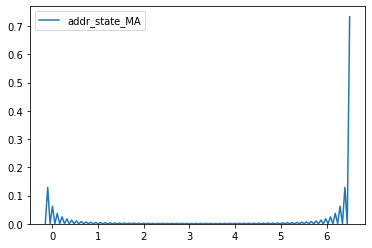

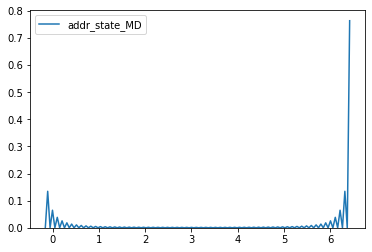

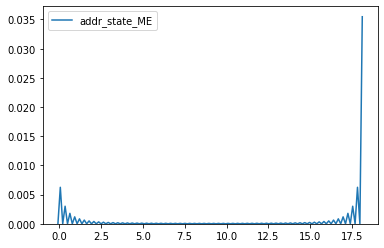

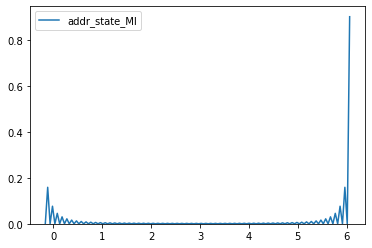

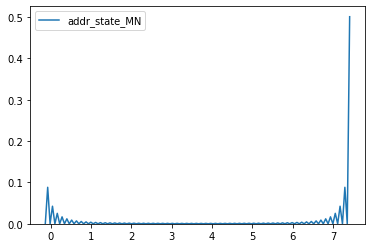

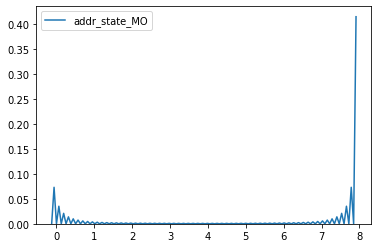

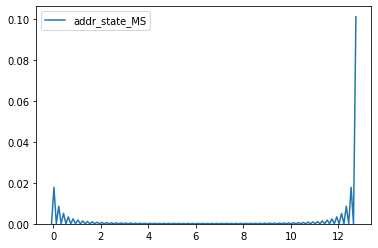

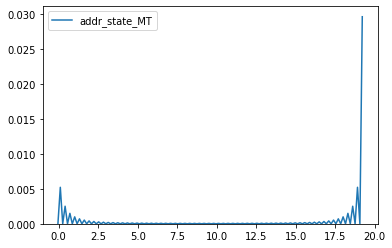

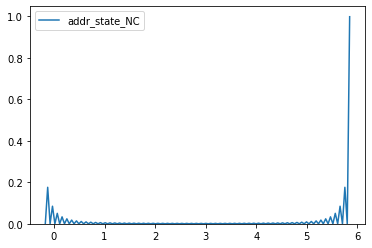

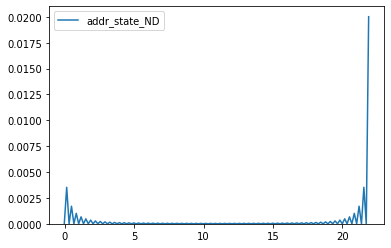

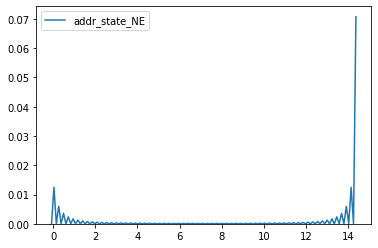

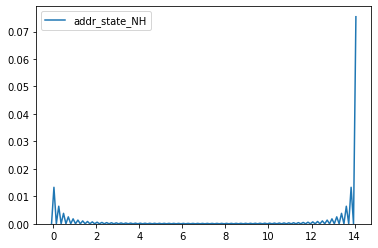

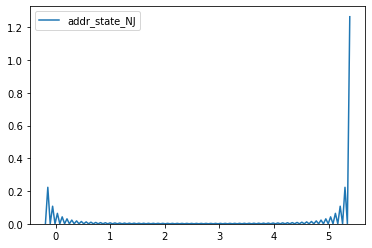

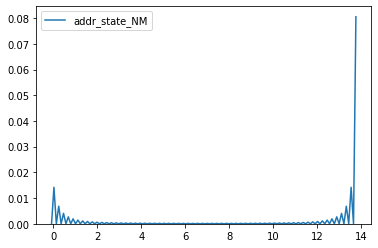

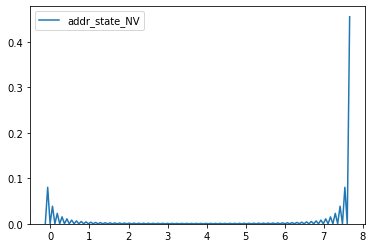

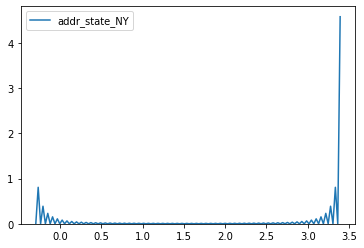

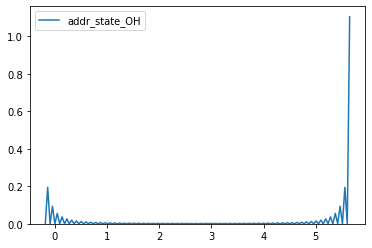

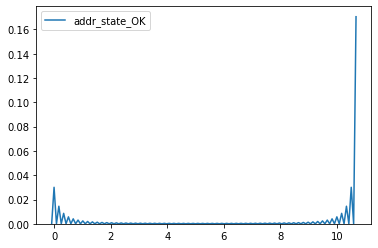

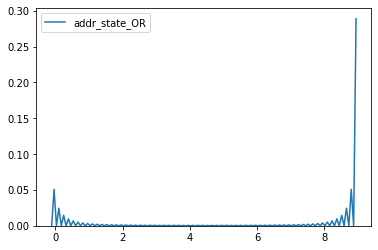

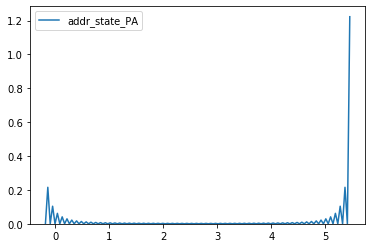

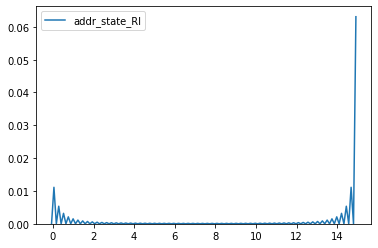

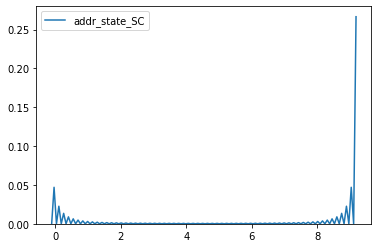

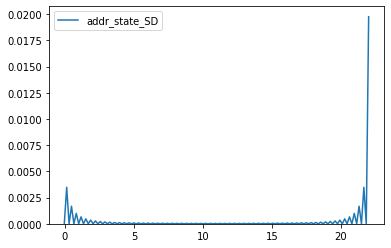

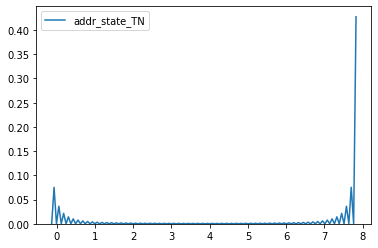

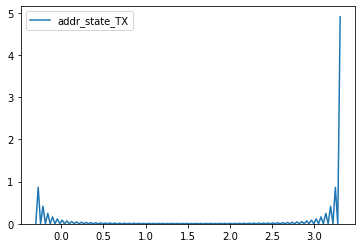

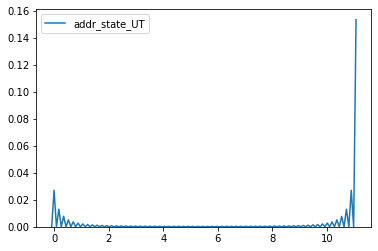

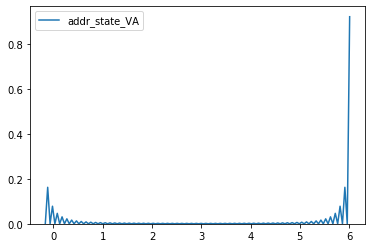

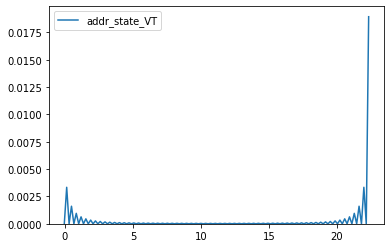

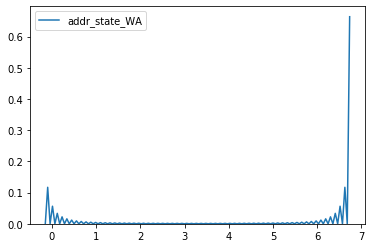

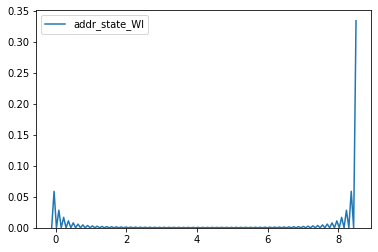

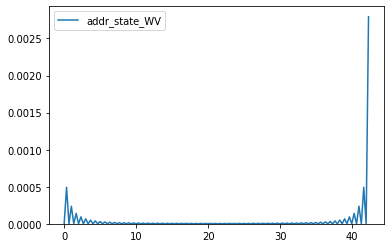

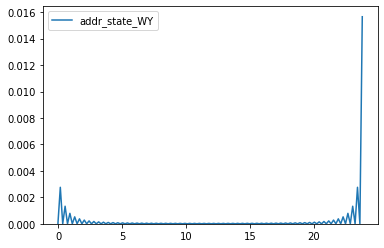

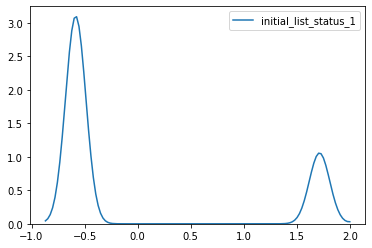

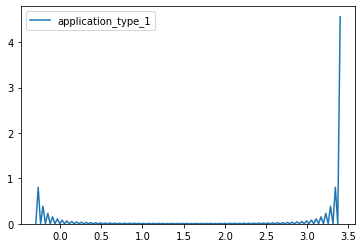

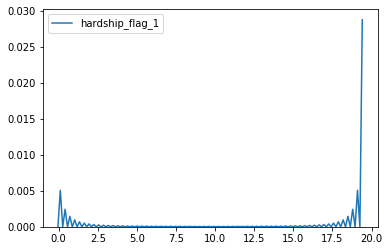

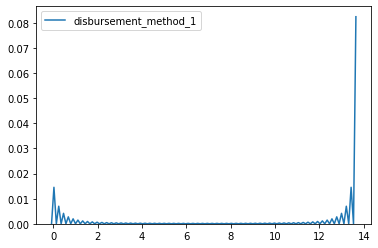

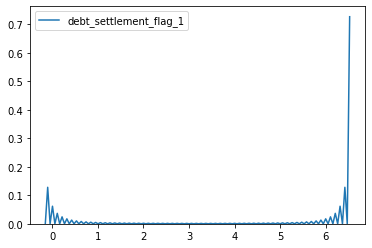

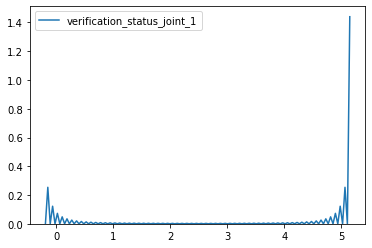

In [80]:
for i in d1trainbox.columns:
    sns.kdeplot(d1trainbox[i])
    plt.show()

In [85]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=1)

from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(fit_intercept=True, solver = 'liblinear')
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)
y_prob=lr.predict_proba(X_test)[:,1]


from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report

y_tpred=lr.predict(X_train)
y_tprob=lr.predict_proba(X_train)[:,1]


print('train',confusion_matrix(y_train, y_tpred))
print('train',accuracy_score(y_train, y_tpred))

print('train',roc_auc_score(y_train,y_tprob))
print('train',classification_report(y_train,y_tpred))

print('test',classification_report(y_test,y_pred))
print('test',confusion_matrix(y_test, y_pred))
print('test',accuracy_score(y_test, y_pred))
print('test',roc_auc_score(y_test,y_prob))

train [[93728   993]
 [ 1134 24415]]
train 0.9823147917186331
train 0.9962759173195929
train               precision    recall  f1-score   support

           0       0.99      0.99      0.99     94721
           1       0.96      0.96      0.96     25549

    accuracy                           0.98    120270
   macro avg       0.97      0.97      0.97    120270
weighted avg       0.98      0.98      0.98    120270

test               precision    recall  f1-score   support

           0       0.99      0.99      0.99     40705
           1       0.96      0.96      0.96     10840

    accuracy                           0.98     51545
   macro avg       0.97      0.97      0.97     51545
weighted avg       0.98      0.98      0.98     51545

test [[40247   458]
 [  466 10374]]
test 0.9820739159957319
test 0.9964969805698547


In [11]:
# SFS - Step Forward Selection
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
# Build RF classifier to use in feature selection
clf = RandomForestClassifier(n_estimators=5,n_jobs=-1)
x=d1train.drop(['funded_amnt_inv','out_prncp','out_prncp_inv','total_pymnt_inv','total_pymnt','open_acc','loan_status'],axis=1)
y=d1train['loan_status']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)


# Build step forward feature selection
sfs1 = sfs(clf,k_features = 173,forward=True,
           floating=False, scoring='r2',
           verbose=2,
           cv=5, n_jobs=-1)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 173 out of 173 | elapsed:  2.7min finished

[2020-04-13 17:29:03] Features: 1/173 -- score: 0.4934161220043573[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 172 out of 172 | elapsed:  5.1min finished

[2020-04-13 17:34:08] Features: 2/173 -- score: 0.631073161648325[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   55.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 171 out of 171 | elapsed:  4.5min finished

[2020-04-13 17:38:36] Features: 3/173 -- score: 0.738

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 146 out of 146 | elapsed:  6.6min finished

[2020-04-13 20:05:04] Features: 28/173 -- score: 0.9052425873166614[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:  6.6min finished

[2020-04-13 20:11:41] Features: 29/173 -- score: 0.9046951442812009[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  6.3min finished

[2020-04-13 20:18:01] Features: 30/173 -- score: 0.9037495608563146[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 143 out of 143 | elapsed:  6.4min finished

[2020-04-13 20:24:25] Features: 31/

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 116 out of 116 | elapsed:  7.2min finished

[2020-04-13 23:42:03] Features: 58/173 -- score: 0.8930993054391747[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 115 out of 115 | elapsed:  7.1min finished

[2020-04-13 23:49:11] Features: 59/173 -- score: 0.8915067438814714[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 114 out of 114 | elapsed:  7.2min finished

[2020-04-13 23:56:24] Features: 60/173 -- score: 0.891805349173541[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 113 out of 113 | elapsed:  7.1min finished

[2020-04-14 00:03:31] Features: 61/1

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  86 out of  86 | elapsed:  6.5min finished

[2020-04-14 03:10:47] Features: 88/173 -- score: 0.8712513515694343[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:  6.5min finished

[2020-04-14 03:17:18] Features: 89/173 -- score: 0.8722964700916769[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:  6.5min finished

[2020-04-14 03:23:46] Features: 90/173 -- score: 0.8686136714894885[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  83 out of  83 | elapsed:  6.3min finished

[2020-04-14 03:30:06] Features: 91/

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:  5.1min finished

[2020-04-14 06:07:07] Features: 118/173 -- score: 0.814317275881546[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:  5.1min finished

[2020-04-14 06:12:11] Features: 119/173 -- score: 0.8053093495707875[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:  5.0min finished

[2020-04-14 06:17:14] Features: 120/173 -- score: 0.8007805026410691[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:  5.4min finished

[2020-04-14 06:22:37] Features: 1

[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:  2.7min finished

[2020-04-14 08:27:53] Features: 152/173 -- score: 0.760568323309064[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:  2.7min finished

[2020-04-14 08:30:34] Features: 153/173 -- score: 0.7381729264038632[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.5min finished

[2020-04-14 08:33:02] Features: 154/173 -- score: 0.7323003556598329[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:  2.4min finished

[2020-04-14 08:35:27] Features: 155/173 -- score: 0.7367296674921947[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  2.3min finished

[2020-04-14 08:37:43] Features: 156/173 -- score: 0.7342412900582

In [12]:
print(list(sfs1.k_feature_idx_))
print(list(sfs1.k_feature_names_))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172]
['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'issue_d', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'last_pym

In [13]:
# SFS - Step Forward Selection
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
# Build RF classifier to use in feature selection
clf = RandomForestClassifier(n_estimators=10,n_jobs=-1)
x=d1train.drop(['funded_amnt_inv','out_prncp','out_prncp_inv','total_pymnt_inv','total_pymnt','open_acc','loan_status'],axis=1)
y=d1train['loan_status']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)


# Build step forward feature selection
sfs1 = sfs(clf,k_features = 13,forward=True,
           floating=False, scoring='r2',
           verbose=2,
           cv=5, n_jobs=-1)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 173 out of 173 | elapsed:  4.9min finished

[2020-04-14 09:16:38] Features: 1/13 -- score: 0.486448665189406[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 172 out of 172 | elapsed: 10.1min finished

[2020-04-14 09:26:45] Features: 2/13 -- score: 0.6379410833659199[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 171 out of 171 | elapsed:  9.2min finished

[2020-04-14 09:35:55] Features: 3/13 -- score: 0.748474

In [14]:
print(list(sfs1.k_feature_idx_))
print(list(sfs1.k_feature_names_))

[0, 2, 4, 13, 16, 17, 90, 91, 118, 121, 144, 153, 154]
['loan_amnt', 'installment', 'issue_d', 'total_rec_prncp', 'last_pymnt_amnt', 'last_credit_pull_d', 'terms_compl', 'term_60', 'addr_state_AL', 'addr_state_CA', 'addr_state_ND', 'addr_state_OR', 'addr_state_PA']


In [15]:
from sklearn.model_selection import train_test_split
x=d1train[['loan_amnt', 'installment', 'issue_d', 'total_rec_prncp', 'last_pymnt_amnt', 'last_credit_pull_d', 'terms_compl', 'term_60', 'addr_state_AL', 'addr_state_CA', 'addr_state_ND', 'addr_state_OR', 'addr_state_PA']]
y=d1train['loan_status']
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=1)

from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(fit_intercept=True, solver = 'liblinear')
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)
y_prob=lr.predict_proba(X_test)[:,1]
print('pred: ',y_pred)
print('prob: ',y_prob)

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report

y_tpred=lr.predict(X_train)
y_tprob=lr.predict_proba(X_train)[:,1]
print('pred: ',y_tpred)
print('prob: ',y_tprob)

print(confusion_matrix(y_train, y_tpred))
print(accuracy_score(y_train, y_tpred))

print(roc_auc_score(y_train,y_tprob))
print(classification_report(y_train,y_tpred))

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(roc_auc_score(y_test,y_prob))

pred:  [0 0 0 ... 0 0 0]
prob:  [2.19151284e-17 1.26411213e-02 2.16521989e-20 ... 2.91950258e-01
 1.43518760e-07 1.65567609e-30]
pred:  [1 0 0 ... 0 0 1]
prob:  [9.93889865e-01 4.95297060e-34 9.01258391e-21 ... 4.81248074e-01
 6.75136889e-26 5.91103483e-01]
[[92248  2473]
 [ 2190 23359]]
0.9612289016379812
0.9887895780018229
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     94721
           1       0.90      0.91      0.91     25549

    accuracy                           0.96    120270
   macro avg       0.94      0.94      0.94    120270
weighted avg       0.96      0.96      0.96    120270

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     40705
           1       0.91      0.92      0.91     10840

    accuracy                           0.96     51545
   macro avg       0.94      0.95      0.94     51545
weighted avg       0.96      0.96      0.96     51545

[[39658  1047]
 [  

In [16]:
from sklearn.model_selection import train_test_split
x=d1train.drop('loan_status',axis=1)
y=d1train['loan_status']
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=1)

from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(fit_intercept=True, solver = 'liblinear')
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)
y_prob=lr.predict_proba(X_test)[:,1]
print('pred: ',y_pred)
print('prob: ',y_prob)

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report

y_tpred=lr.predict(X_train)
y_tprob=lr.predict_proba(X_train)[:,1]
print('pred: ',y_tpred)
print('prob: ',y_tprob)

print(confusion_matrix(y_train, y_tpred))
print(accuracy_score(y_train, y_tpred))

print(roc_auc_score(y_train,y_tprob))
print(classification_report(y_train,y_tpred))

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(roc_auc_score(y_test,y_prob))

pred:  [0 0 0 ... 0 0 0]
prob:  [1.00875984e-05 6.06899065e-03 9.45830565e-08 ... 3.05726421e-02
 7.85909714e-04 1.85615419e-07]
pred:  [1 0 0 ... 0 0 1]
prob:  [1.00000000e+00 2.37082871e-09 3.78150778e-06 ... 6.12609164e-03
 4.32099698e-07 9.99998349e-01]
[[94720     1]
 [   66 25483]]
0.9994429200964496
0.9994520238436579
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     94721
           1       1.00      1.00      1.00     25549

    accuracy                           1.00    120270
   macro avg       1.00      1.00      1.00    120270
weighted avg       1.00      1.00      1.00    120270

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40705
           1       1.00      1.00      1.00     10840

    accuracy                           1.00     51545
   macro avg       1.00      1.00      1.00     51545
weighted avg       1.00      1.00      1.00     51545

[[40705     0]
 [  

In [17]:
x=d1train.drop(['funded_amnt_inv','out_prncp','out_prncp_inv','total_pymnt_inv','total_pymnt','open_acc','loan_status'],axis=1)
y=d1train['loan_status']
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=1)

from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(fit_intercept=True, solver = 'liblinear')
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)
y_prob=lr.predict_proba(X_test)[:,1]
print('pred: ',y_pred)
print('prob: ',y_prob)

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report

y_tpred=lr.predict(X_train)
y_tprob=lr.predict_proba(X_train)[:,1]
print('pred: ',y_tpred)
print('prob: ',y_tprob)

print(confusion_matrix(y_train, y_tpred))
print(accuracy_score(y_train, y_tpred))

print(roc_auc_score(y_train,y_tprob))
print(classification_report(y_train,y_tpred))

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(roc_auc_score(y_test,y_prob))

C:\Users\Arun\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


pred:  [0 0 0 ... 0 0 0]
prob:  [1.48941857e-10 8.00215310e-02 3.35938526e-13 ... 4.58677822e-01
 3.41774646e-05 8.49935128e-20]
pred:  [1 0 0 ... 1 0 0]
prob:  [9.72772110e-01 1.01957349e-25 1.26723427e-13 ... 6.69327367e-01
 2.51005819e-16 4.94772066e-01]
[[91121  3600]
 [ 2366 23183]]
0.9503949447077409
0.9859473797594
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     94721
           1       0.87      0.91      0.89     25549

    accuracy                           0.95    120270
   macro avg       0.92      0.93      0.93    120270
weighted avg       0.95      0.95      0.95    120270

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     40705
           1       0.87      0.91      0.89     10840

    accuracy                           0.95     51545
   macro avg       0.92      0.94      0.93     51545
weighted avg       0.95      0.95      0.95     51545

[[39200  1505]
 [  944

In [18]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
params={'n_estimators':sp_randint(5,150), 'max_features':sp_randint(1,15),'max_depth':sp_randint(2,10),'min_samples_leaf':sp_randint(1,50),'min_samples_split':sp_randint(2,50),'criterion':['gini','entropy']}
rsearch=RandomizedSearchCV(rfc,param_distributions=params,n_jobs=-1,scoring='roc_auc',n_iter=100,cv=3)
rsearch.fit(x,y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)
rfc= RandomForestClassifier(**rsearch.best_params_)
rfc.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
y_train_pred=rfc.predict(X_train)
y_train_prob=rfc.predict_proba(X_train)[:,1]
print('Accuracy score of train: ', accuracy_score(y_train,y_train_pred))
print('Confusion Matrix of train: ', confusion_matrix(y_train,y_train_pred))
print('Auc of train: ', roc_auc_score(y_train,y_train_prob))
y_test_pred=rfc.predict(X_test)
y_test_prob=rfc.predict_proba(X_test)[:,1]
print('Accuracy score of test: ', accuracy_score(y_test,y_test_pred))
print('Confusion Matrix of test: ', confusion_matrix(y_test,y_test_pred))
print('Auc of test: ', roc_auc_score(y_test,y_test_prob))

Accuracy score of train:  0.9363681716138688
Confusion Matrix of train:  [[93795   926]
 [ 6727 18822]]
Auc of train:  0.9876358461644146
Accuracy score of test:  0.932699582888738
Confusion Matrix of test:  [[40219   486]
 [ 2983  7857]]
Auc of test:  0.9855482703150333
